In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import plotly.express as px

# Introduction
With rapid advancements in the digital age, there has been a rapid advancement in healthcare technology. Yet, diabetes has recently emerged as the new unseen pandamic. This is because of many people having a sendatary lifestylye due to multiple factors such as the lack of time, motivation or simply the lack of sports and leisure facilities. According to the IDF, 537 million adults (20-79 years) are living with diabetes - 1 in 10. This number is predicted to rise to 643 million by 2030 and 783 million by 2045. 

With the alarming increase in the rate of patients with diabetes, it is very important for the early detection of diabetes. This is because with early diagnosis proper treatment can be assesed in order to avoid further complications of the disease. Numerous studies have been conducted on disease prediction, including diagnosis, prediction, categorization, and treatment.

This project delves into the realm of predictive modeling for diabetes, employing techniques from both machine learning and data analysis. Our aim is to develop a robust model capable of identifying individuals at high risk of developing diabetes, using certain attributes, for effective prevention and management strategies.

# Data Acquisition

In [3]:
diabetes_data = pd.read_csv('diabetes2.csv')

In [4]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Info about each column

#### Pregnancies
Number of pregnancies the individual has had.

#### Glucose
Plasma glucose concentration (mg/dL) measured during an oral glucose tolerance test.

#### BloodPressure
Diastolic blood pressure (mm Hg).

#### SkinThickness
Thickness of skinfold (mm) at the triceps.

#### Insulin
2-Hour serum insulin (mu U/ml).

#### BMI
2-Hour serum insulin (mu U/ml).

#### DiabetesPedigreeFunction
Diabetes pedigree function, which represents the likelihood of diabetes based on family history.

#### Age
Age of the individual (years).

#### Outcome
Binary label indicating whether the individual has diabetes (1) or not (0).

In [5]:
#info about the data
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- The above data has no null values
- It has all numerical data that can be transformed if needed

In [7]:
diabetes_data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

- It can be seen from this dataset that there are more 'Negative' Outcomes than 'Positive' ones

### Data visualisation

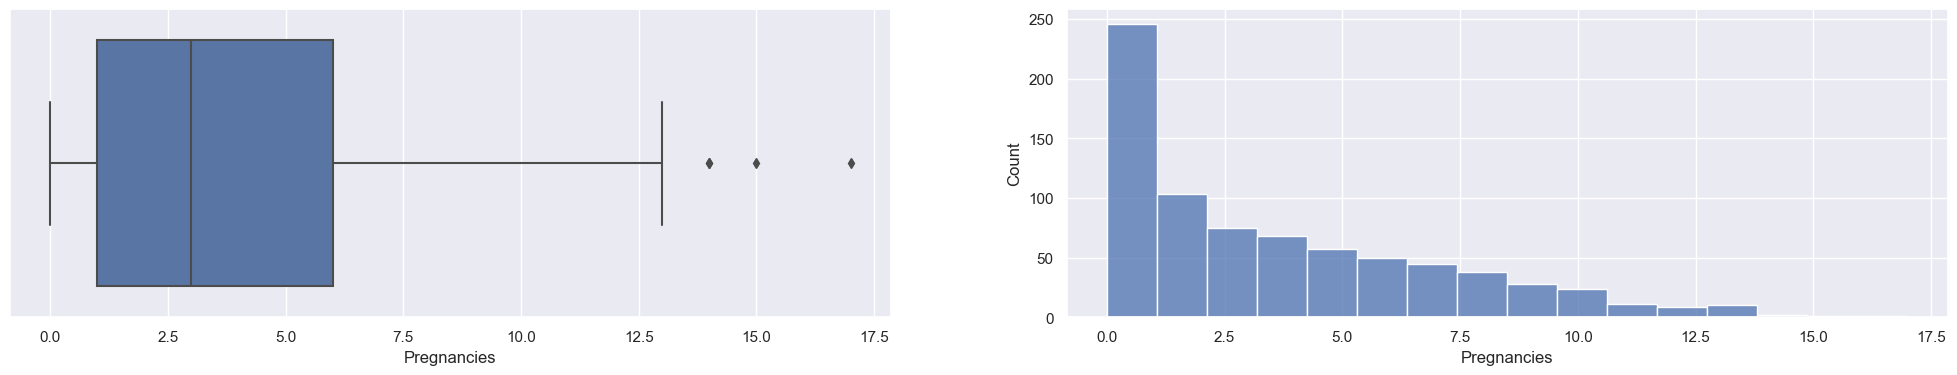

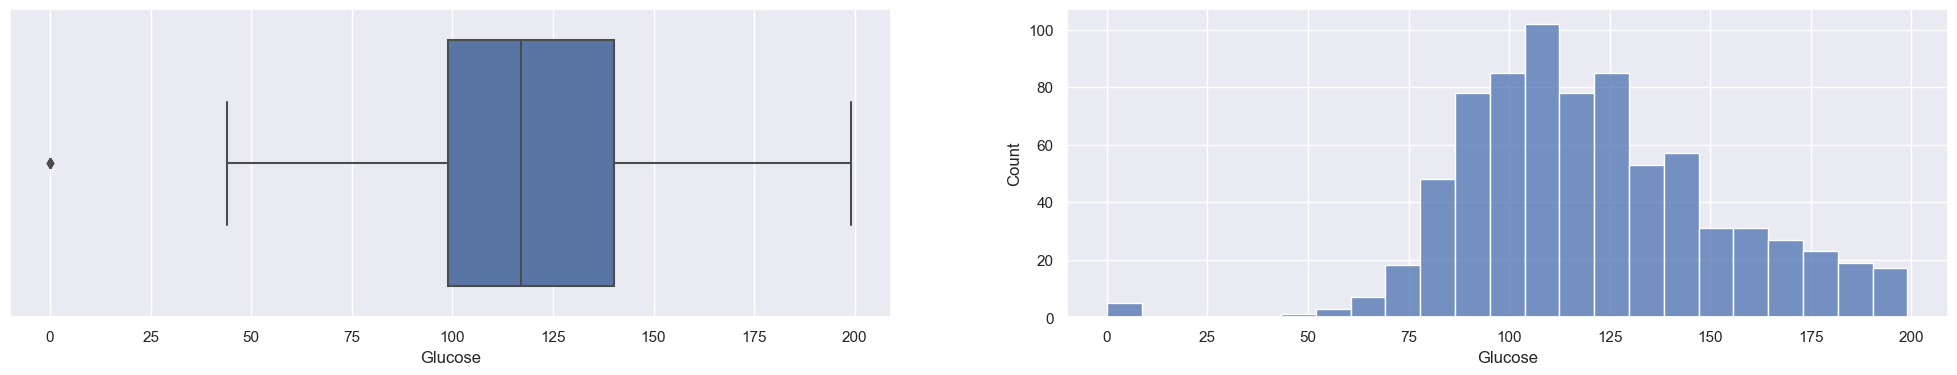

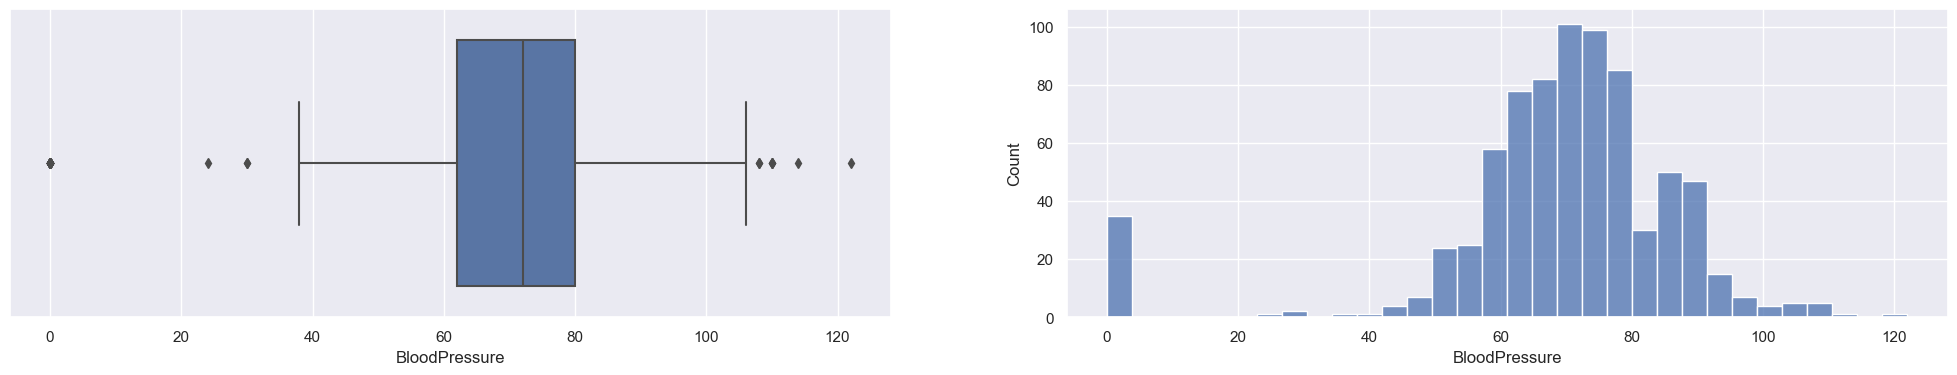

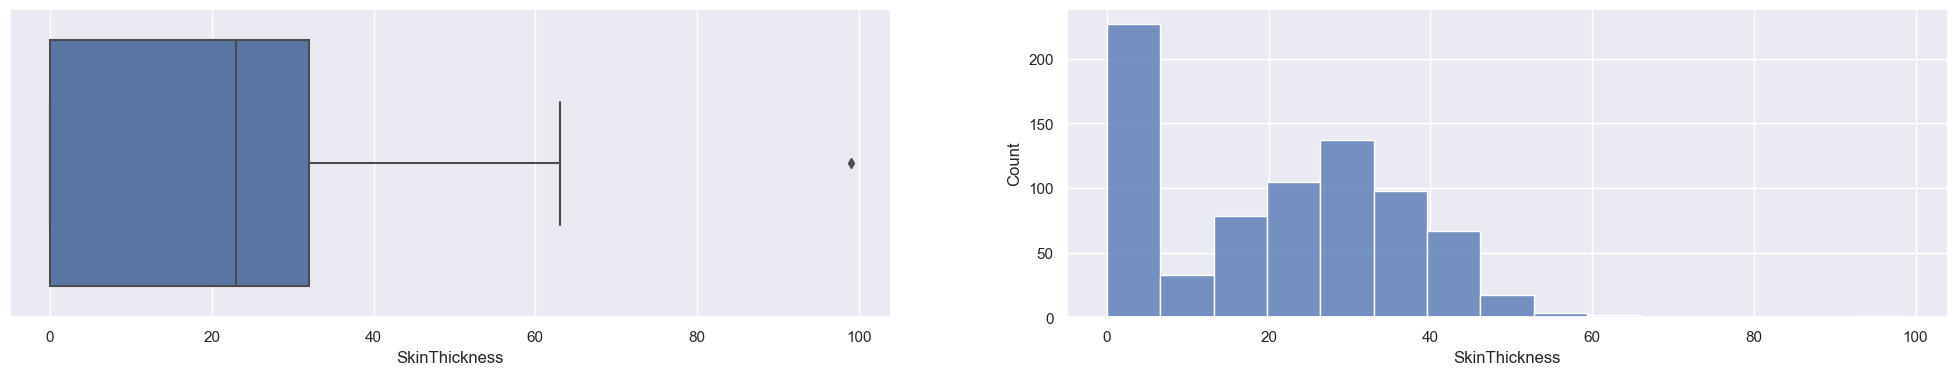

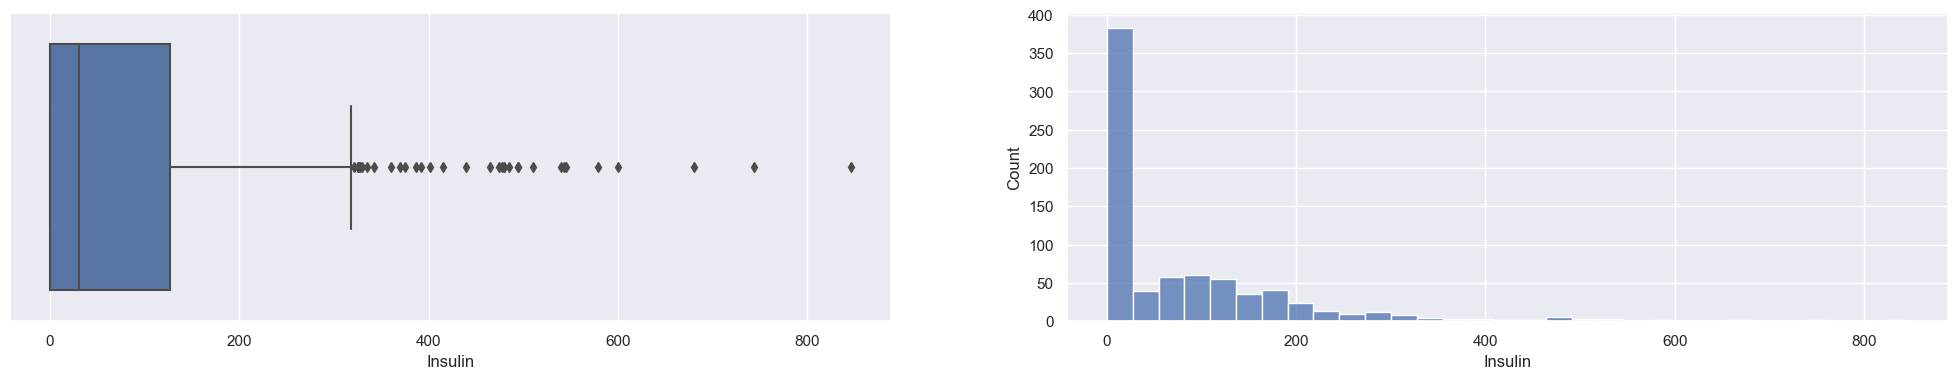

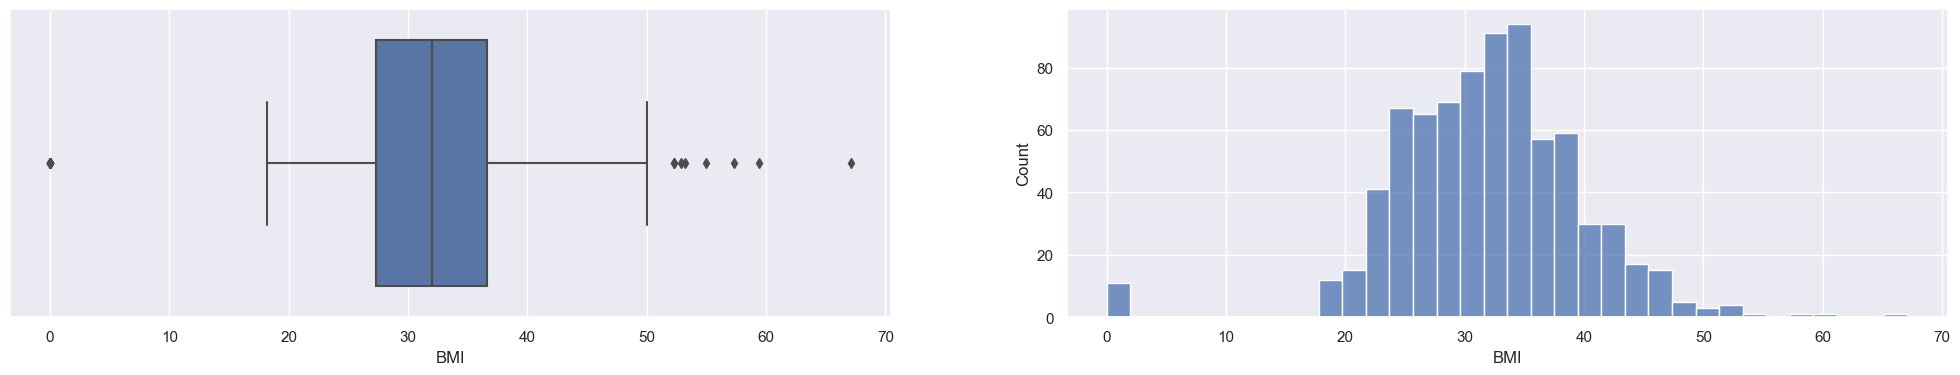

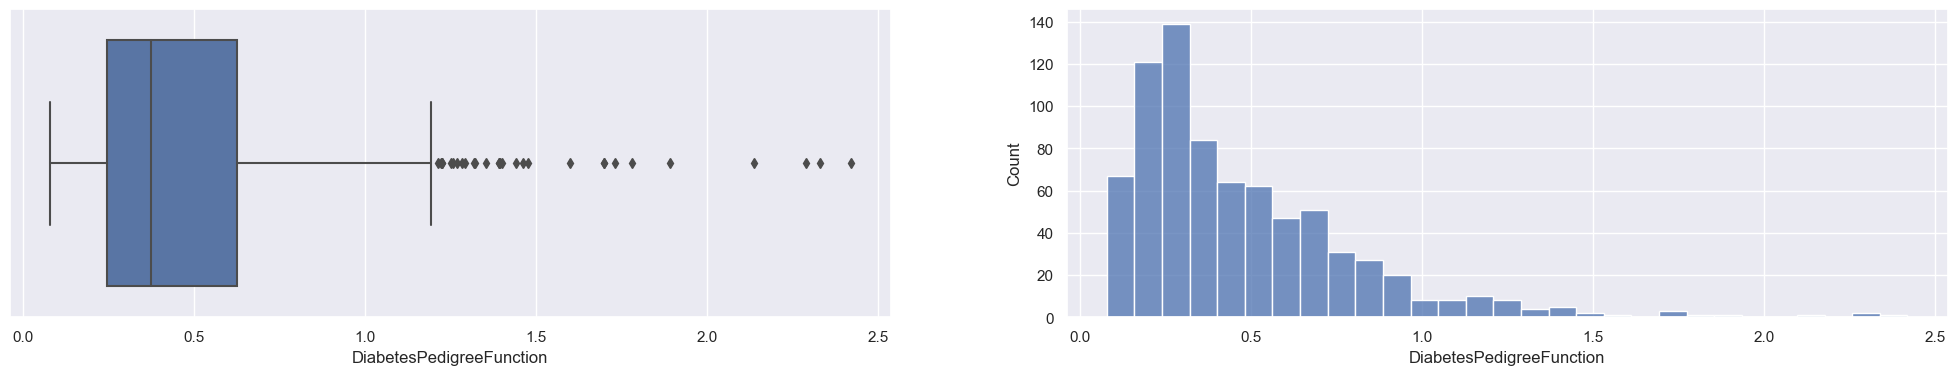

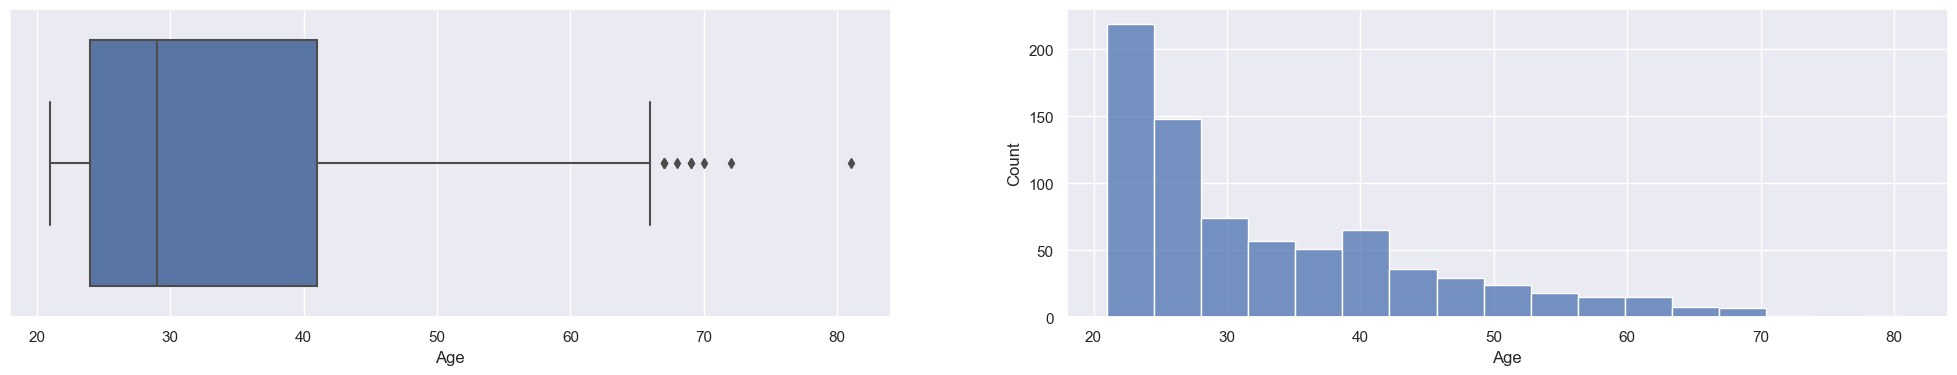

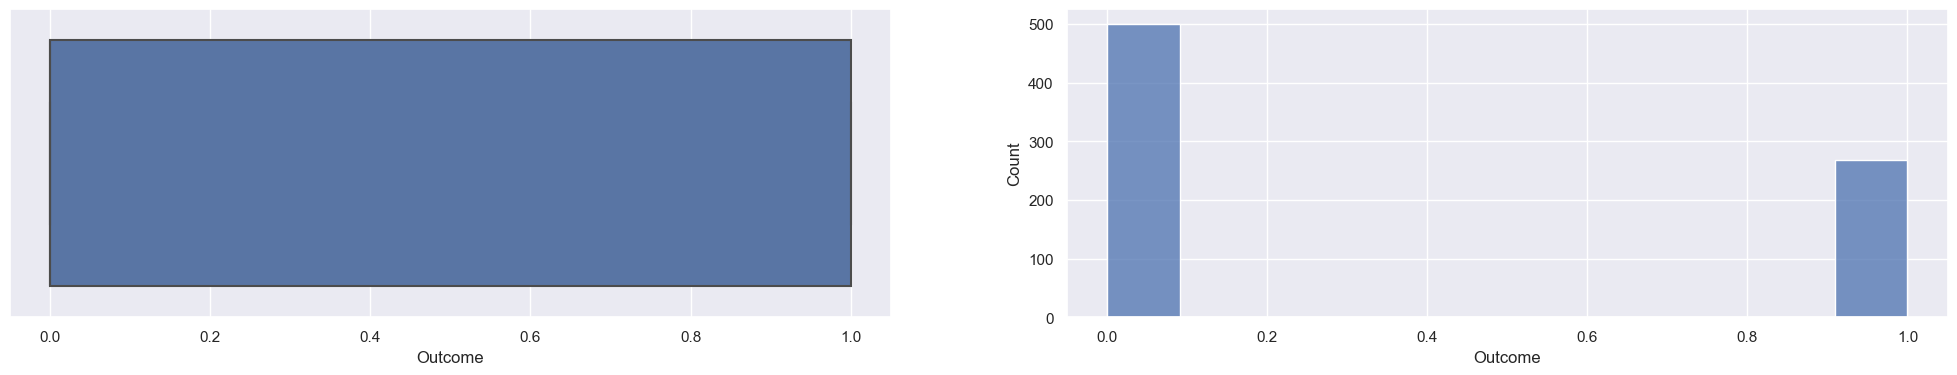

In [9]:
#Uni-variate description
def Univariate_boxplot (data,column):
    f, axes = plt.subplots(1, 2, figsize=(25, 4))
    sb.boxplot(x = column,data = data, orient = "h", ax = axes[0])
    sb.histplot(data = data,x = column, ax = axes[1])
for columns in diabetes_data :
    Univariate_boxplot (diabetes_data,columns)

- Glucose, BloodPressure and BMI has a more normal distribution.
- Pregnancies, SkinThickness, DiabetesPedigreeFunction and Age are skewed positively.
- Outcome had no distribution of any sort.
- BMI, Insulin and DiabetesPedigreeFunction have numerous outliers in their boxplot compared to the other variables.

# Exploratory Analysis 

<Axes: >

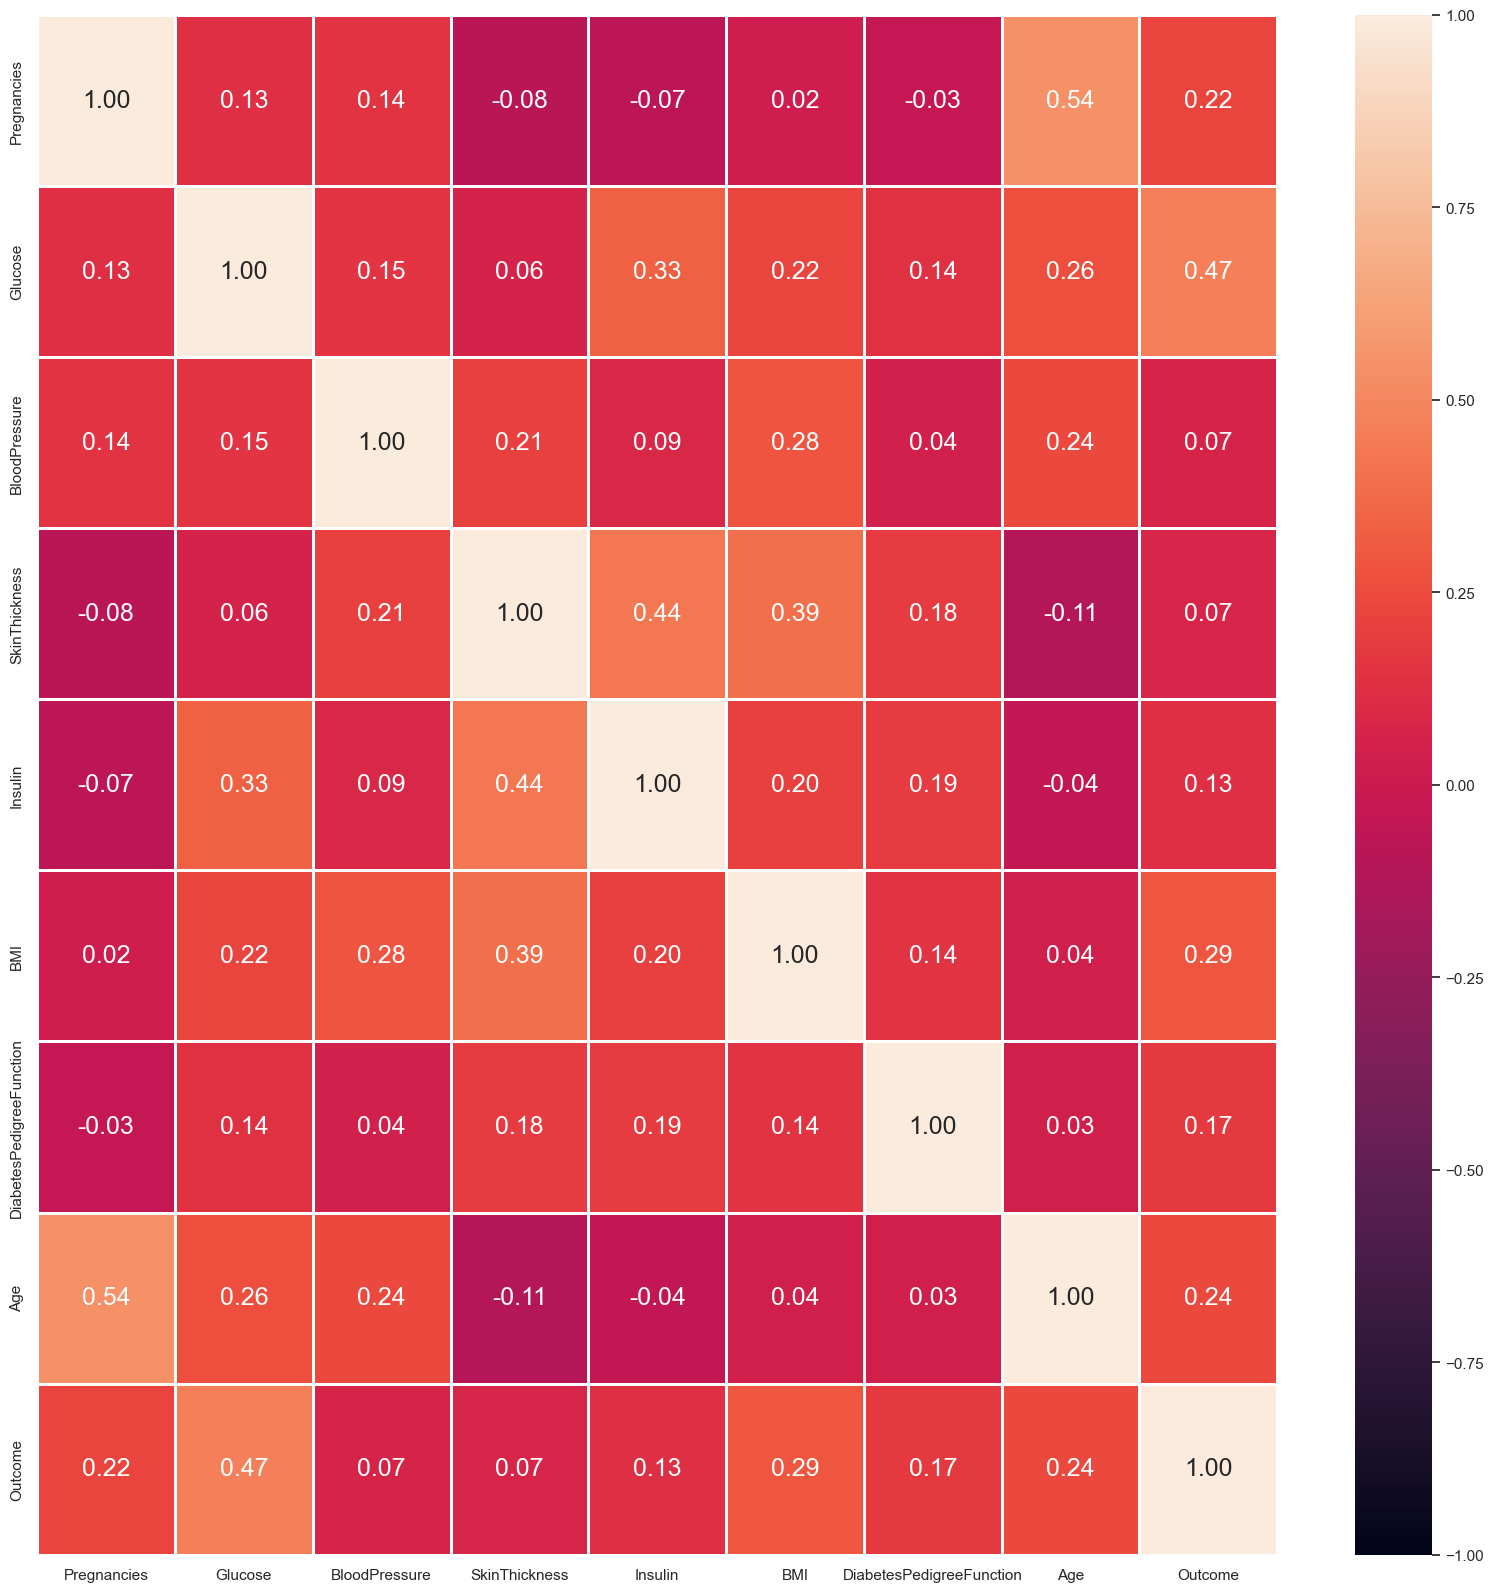

In [10]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(diabetes_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18})

In [11]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


- From the correlation matrix, the Outcome have a slightly higher positive correlations to the variables, Glucose, BMI and Age.
- Their correlation coefficient is 0.47, 0.29 and 0.24 respectively.

### Relationship of other variables within each other
***
- We decided to explore the relationship of other variables through SkinThickness, as this variable has a higher correlation to all variables compared to others.


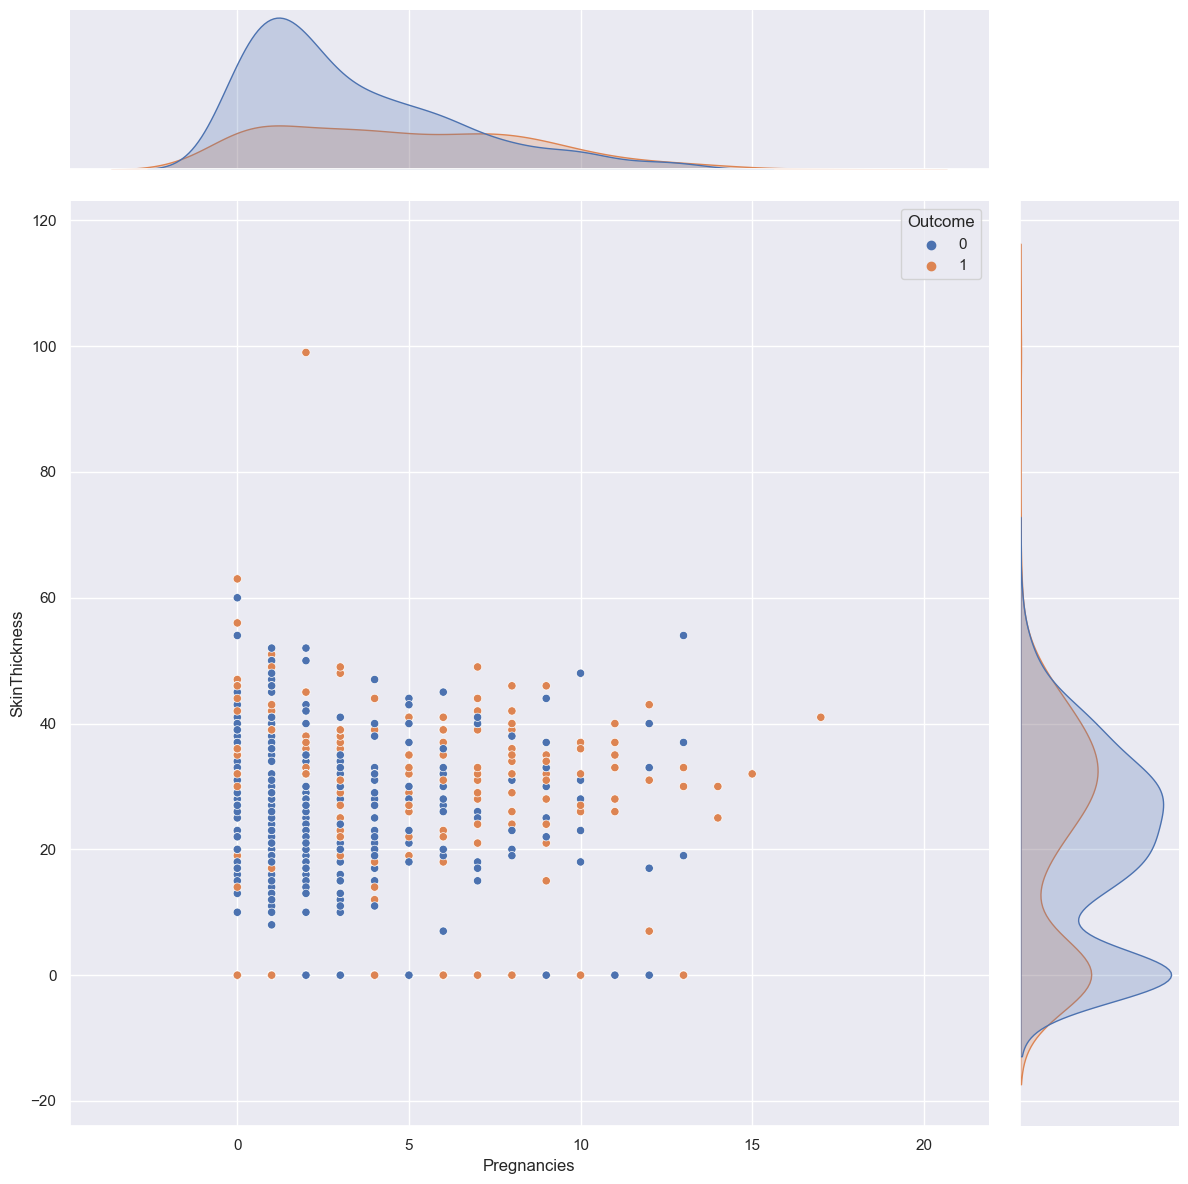

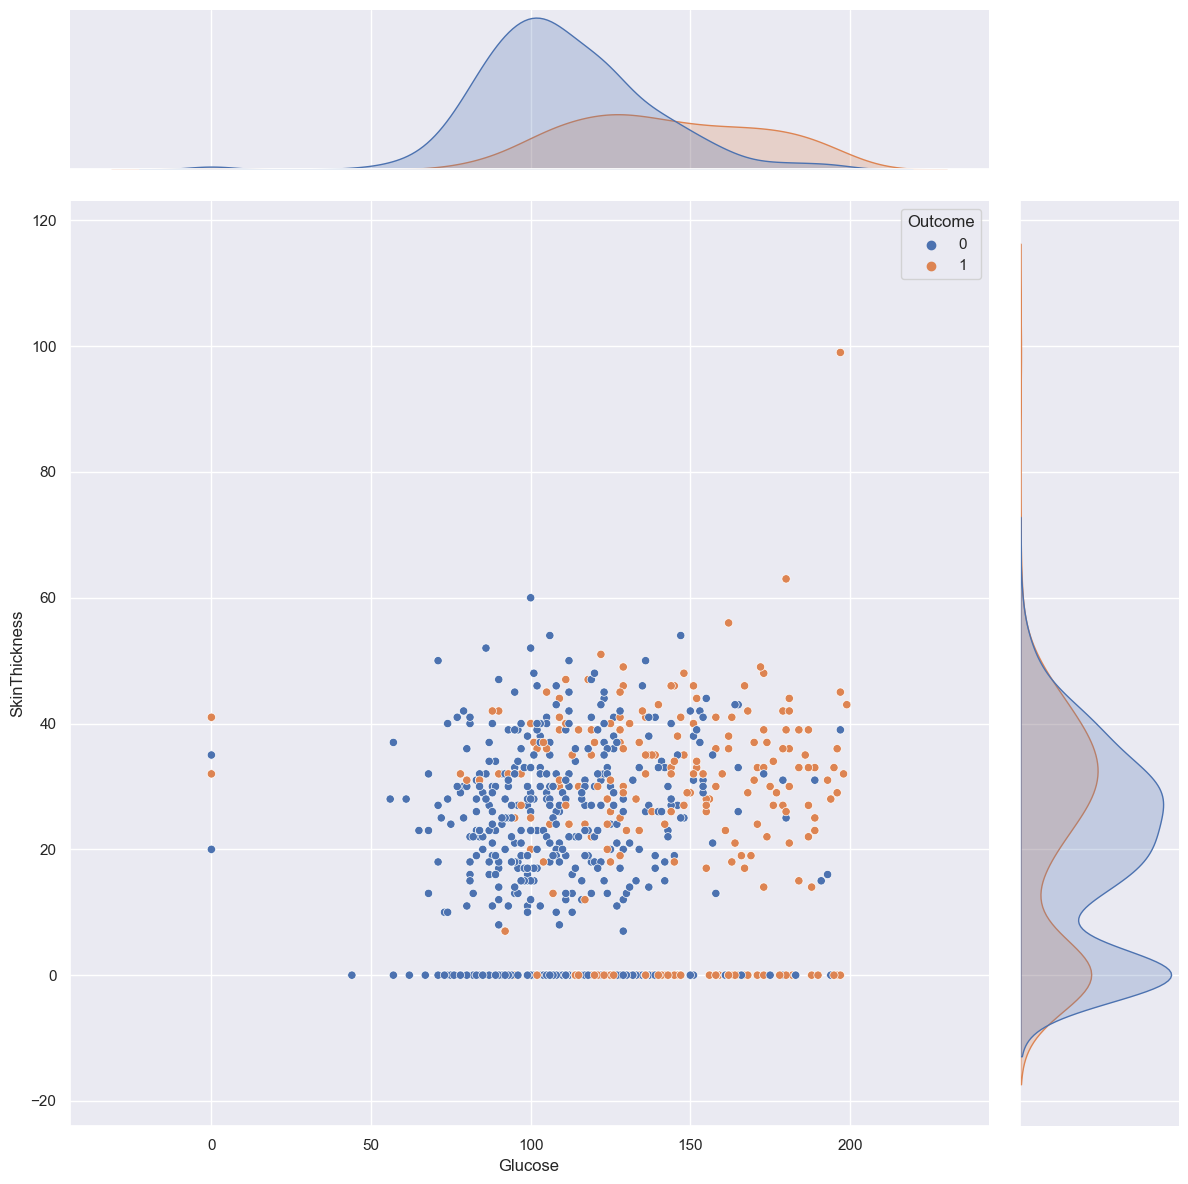

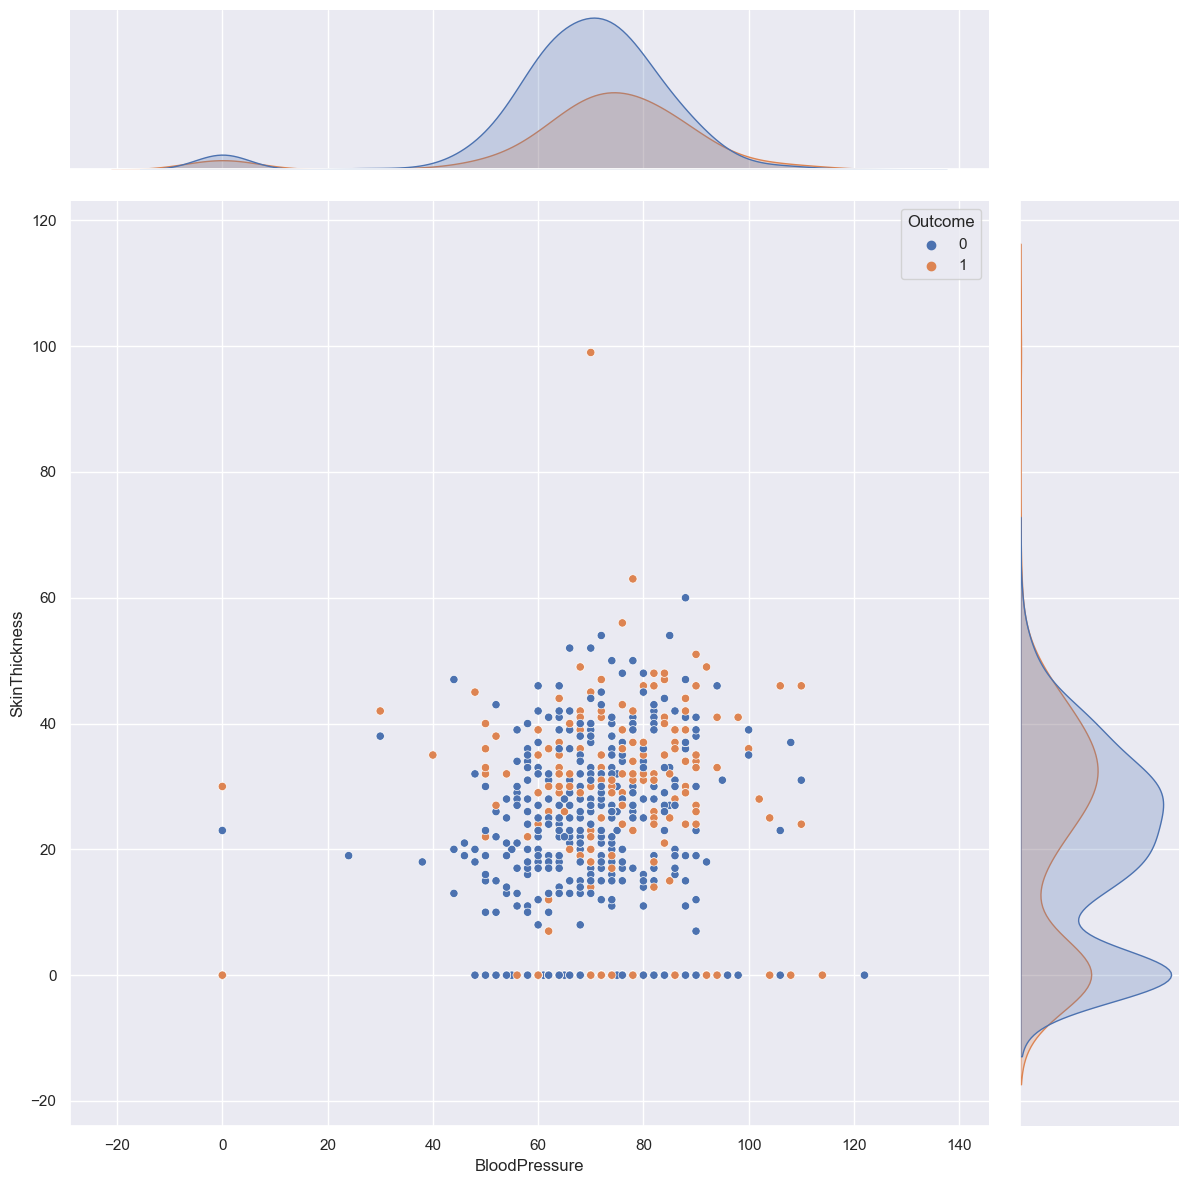

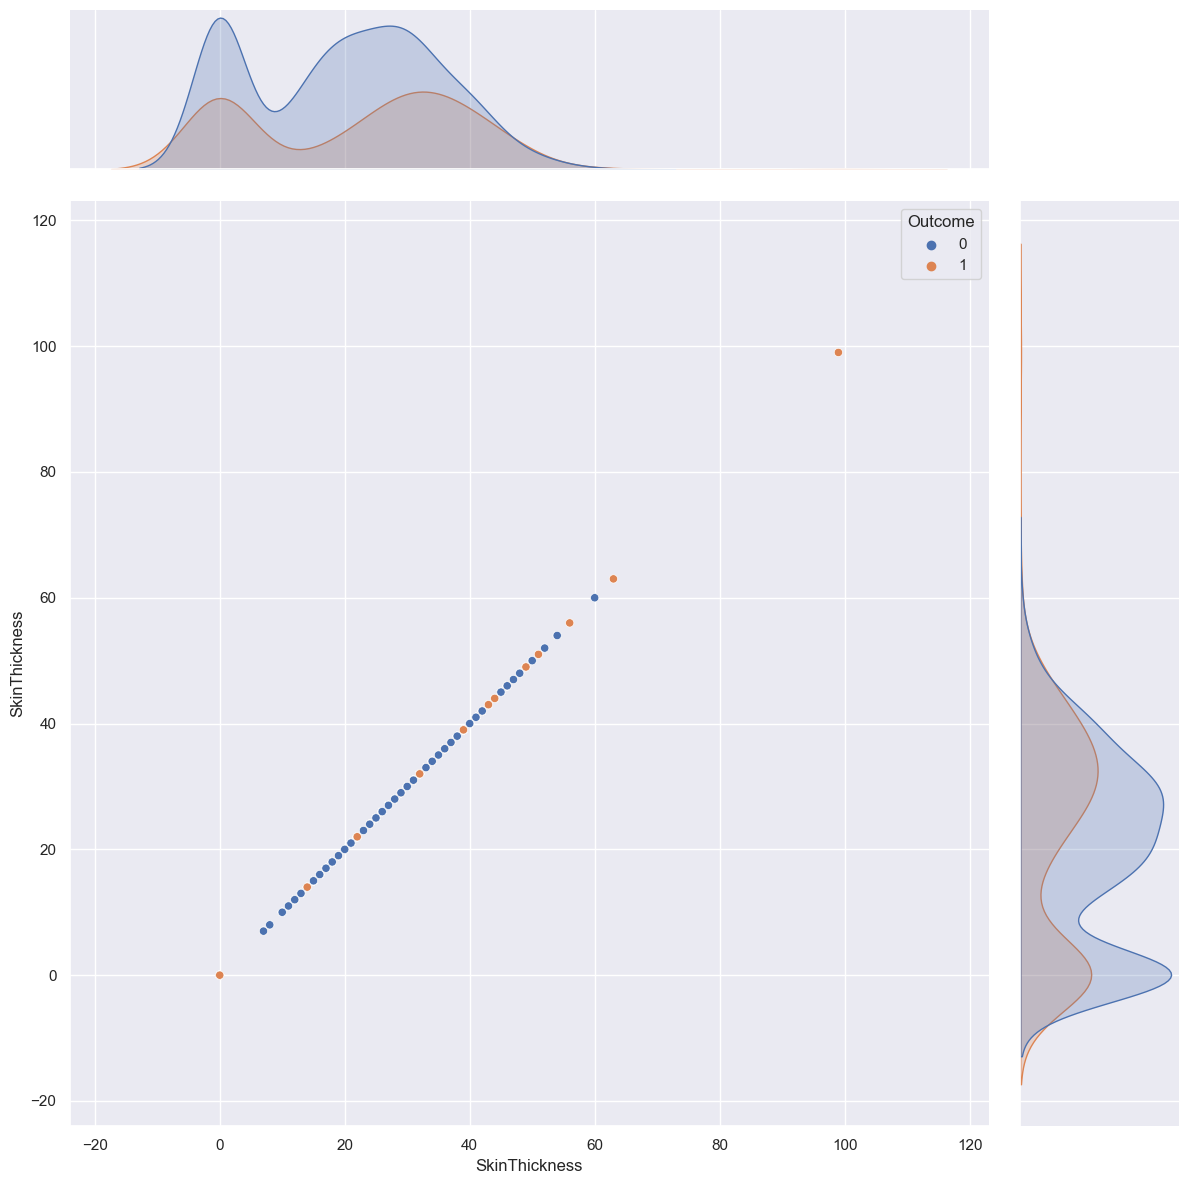

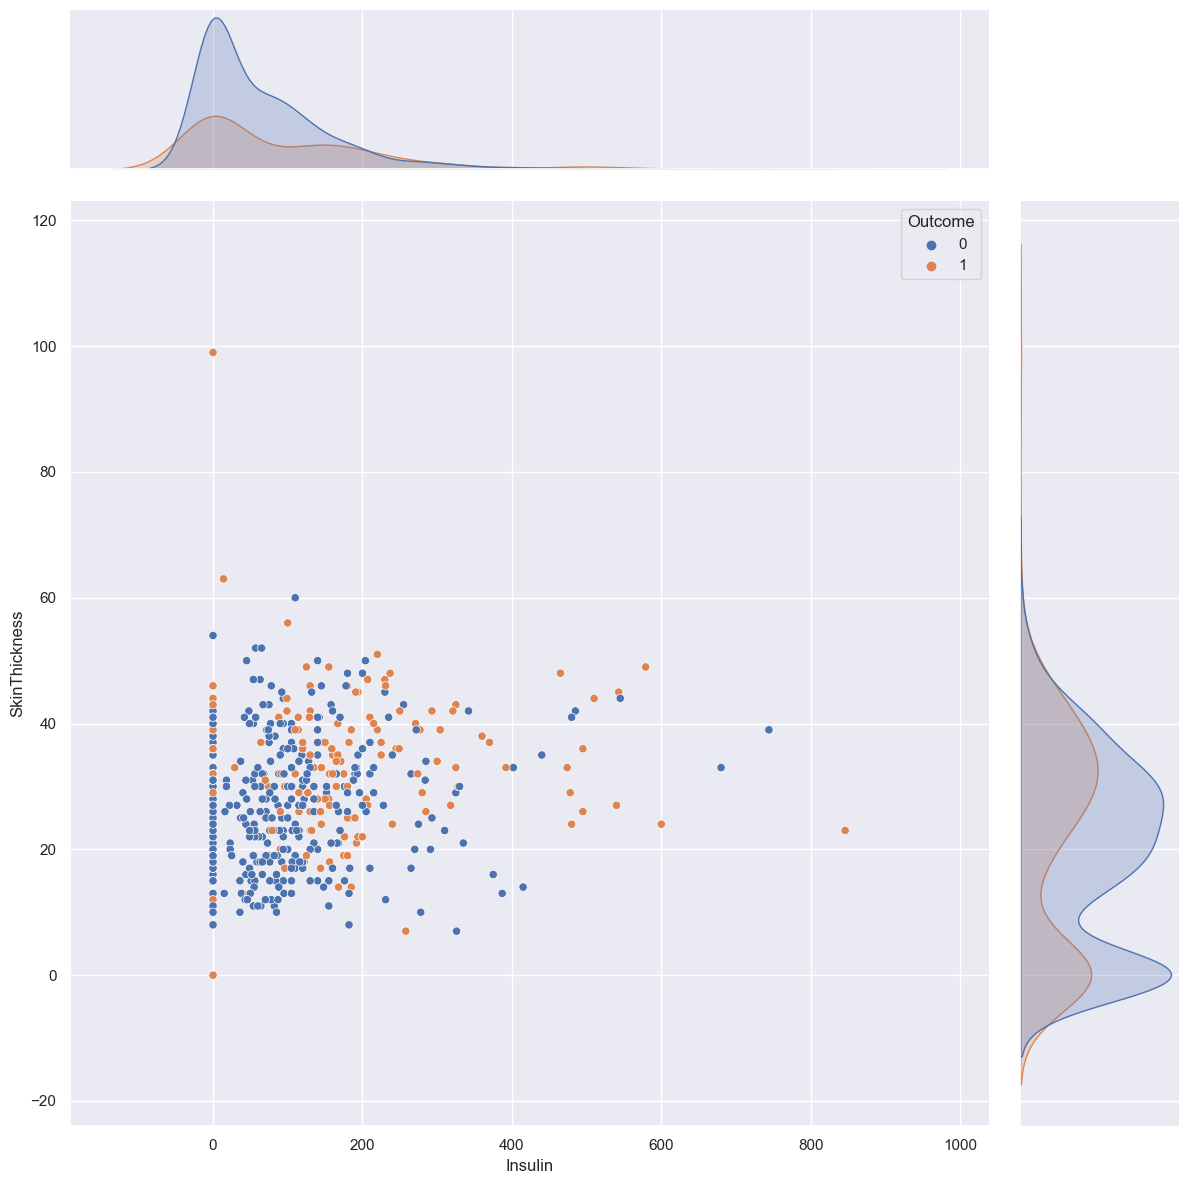

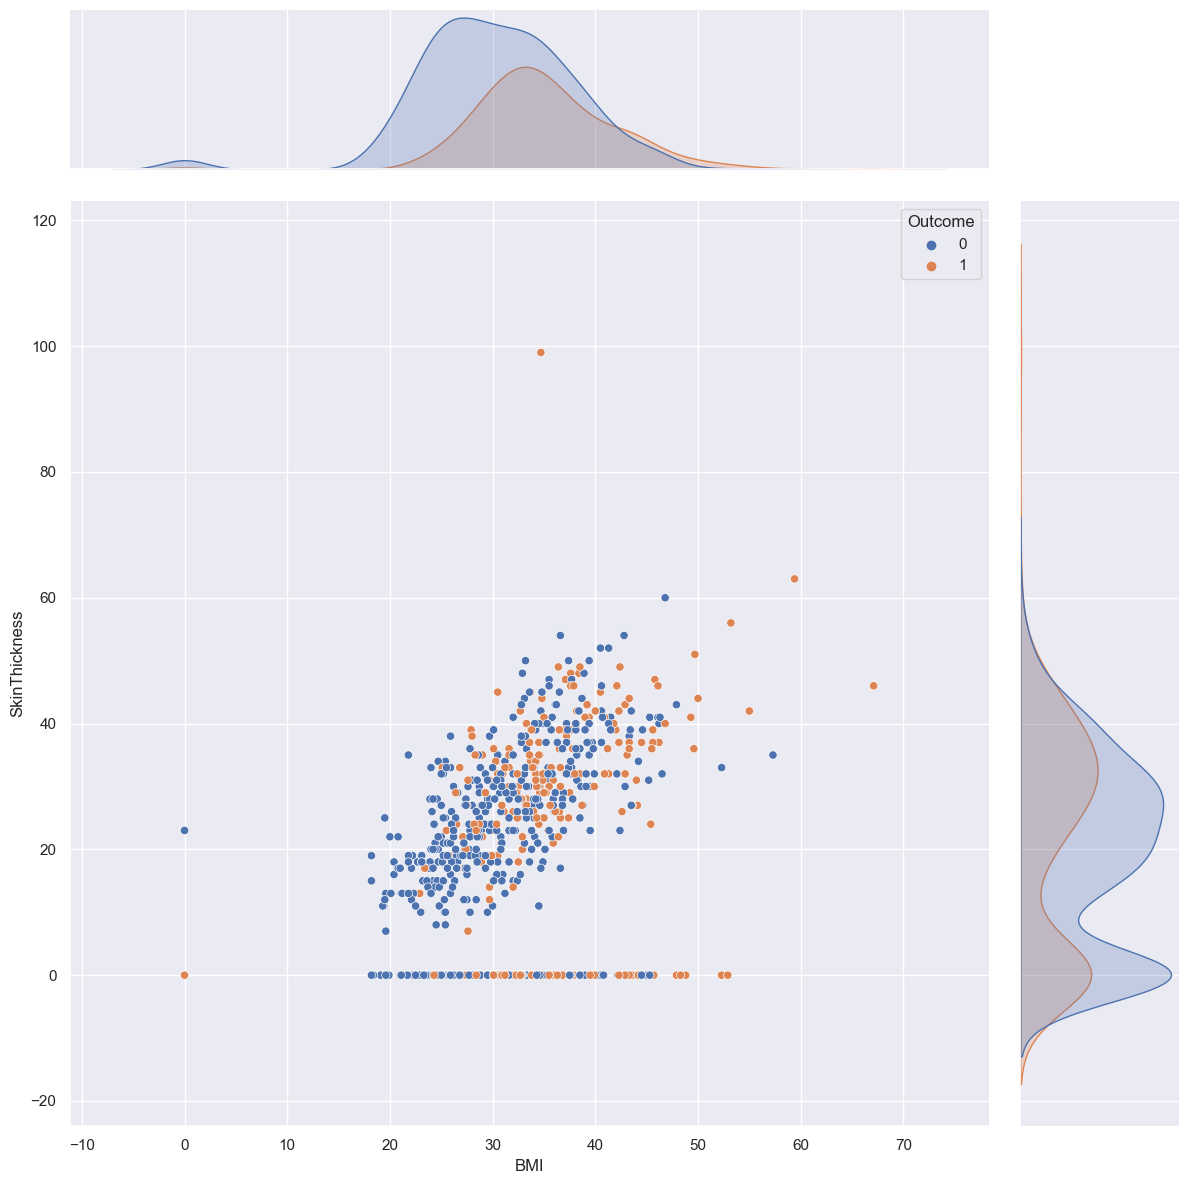

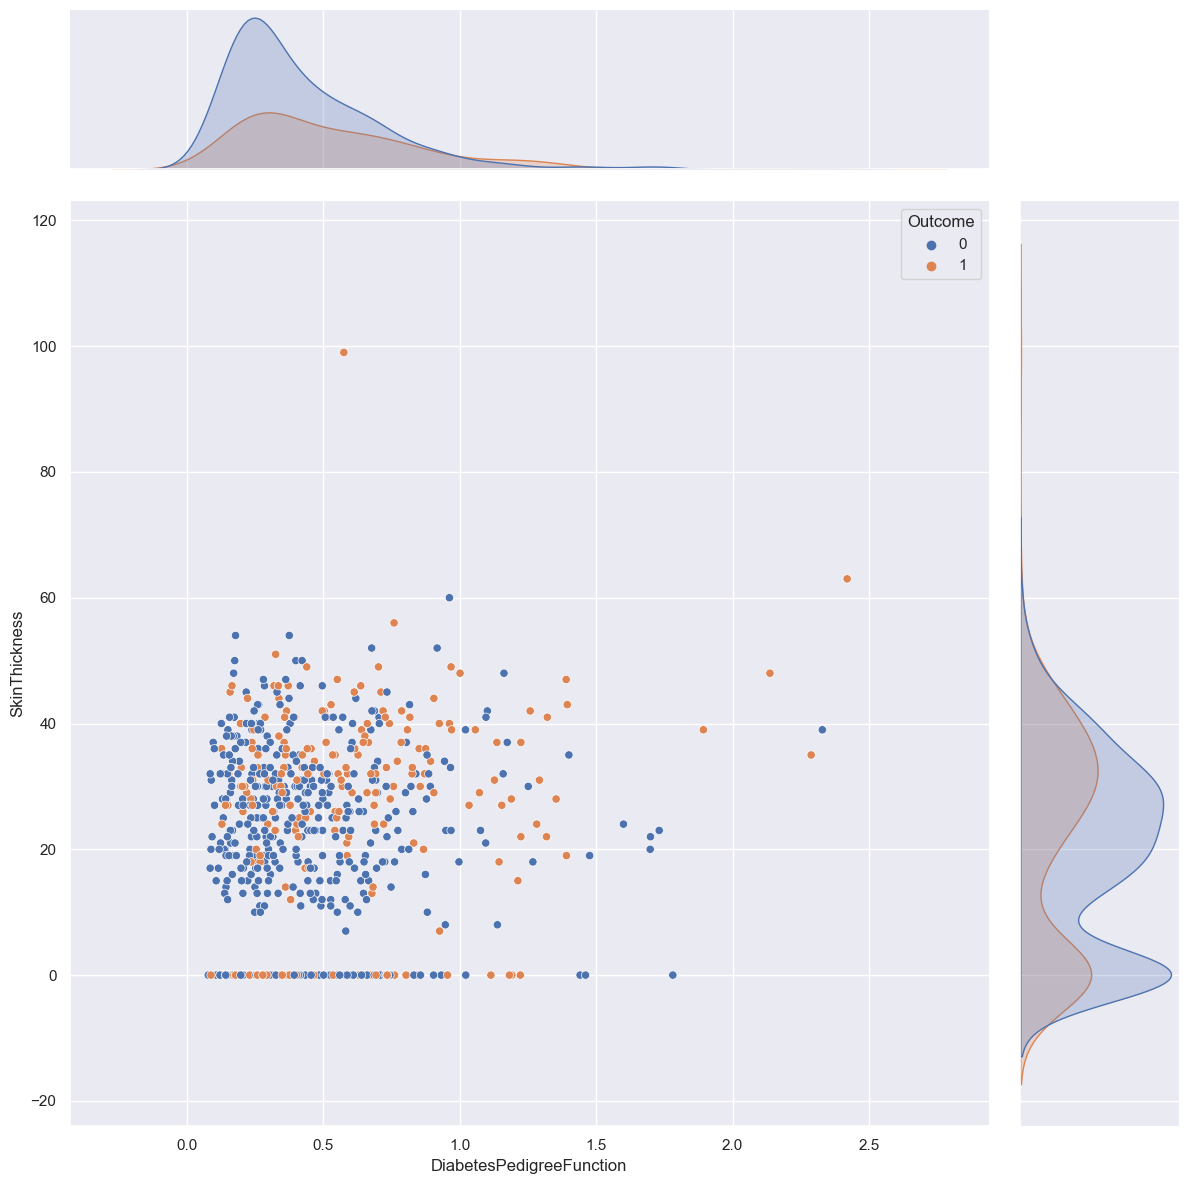

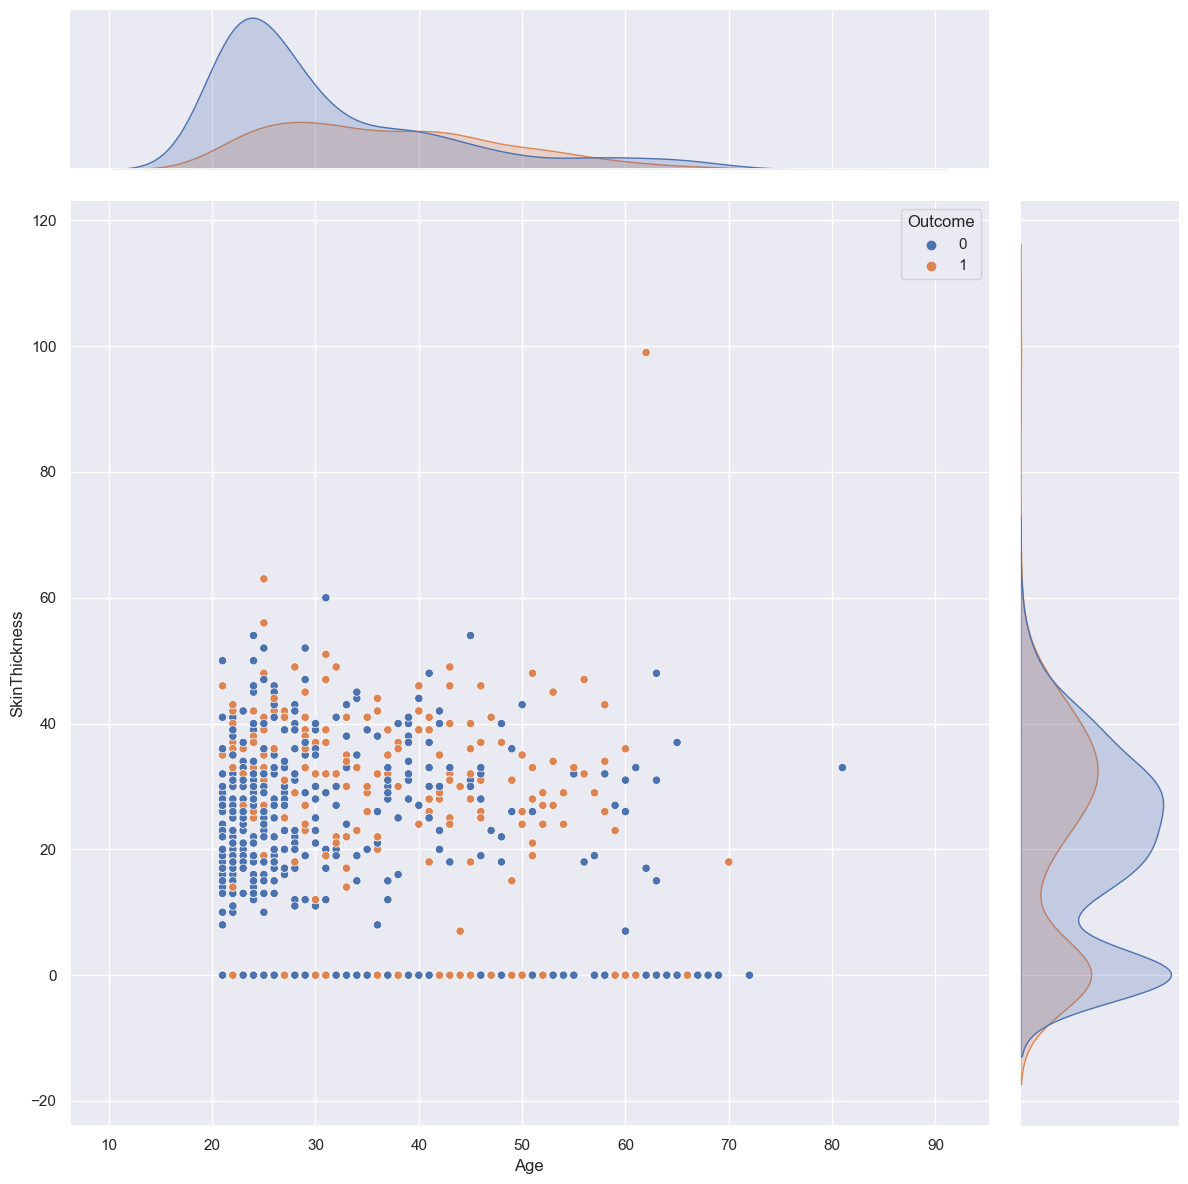

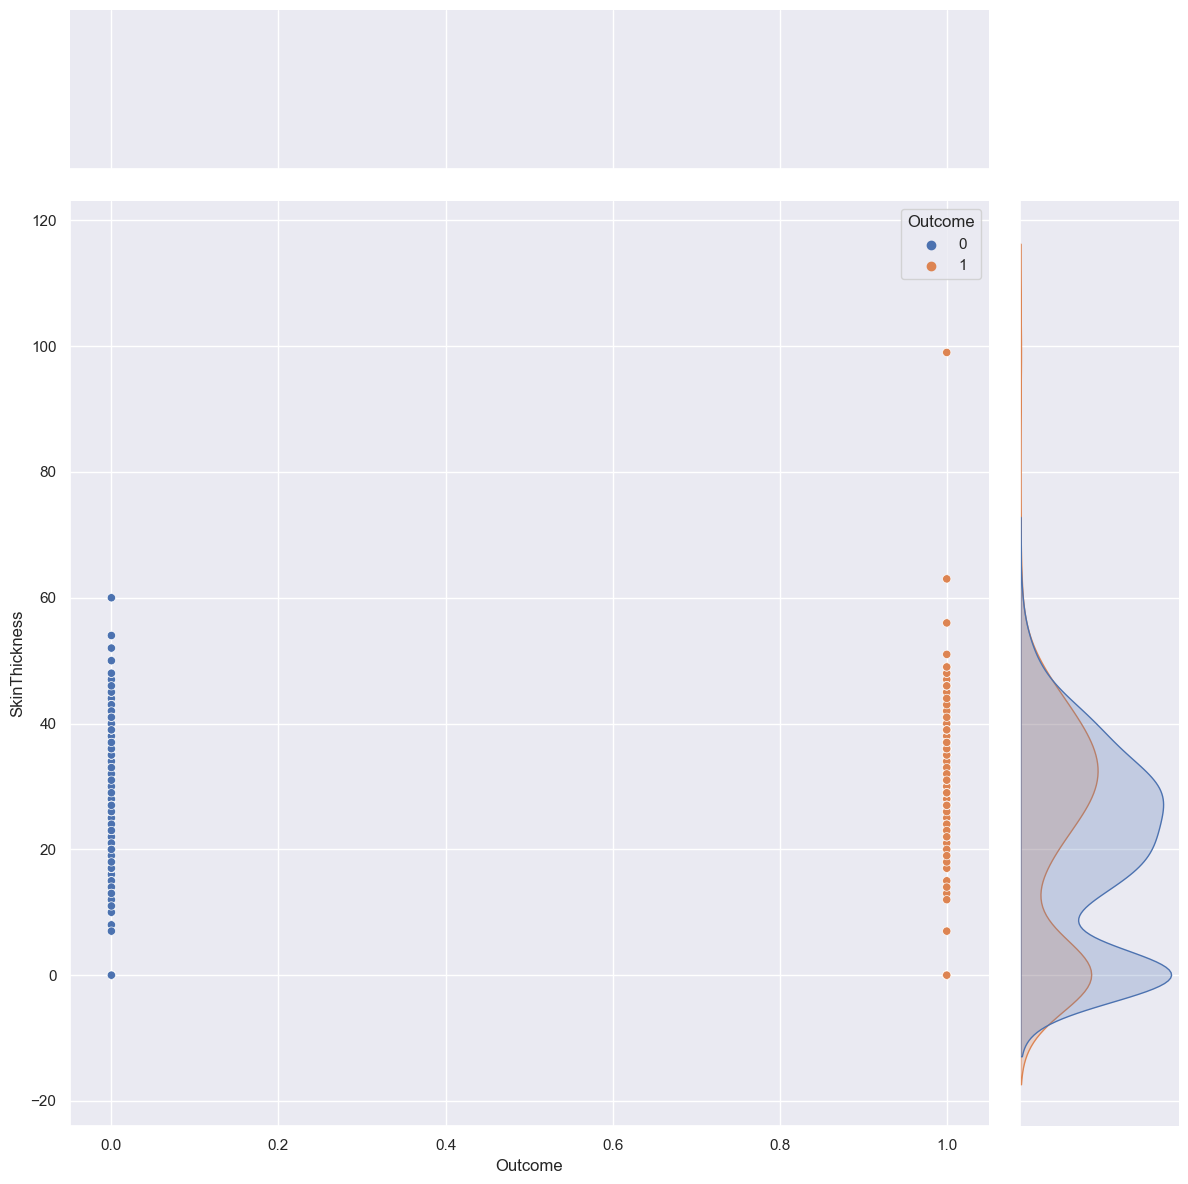

In [12]:
for columns in diabetes_data :
    sb.jointplot(data = diabetes_data, x = columns, y = 'SkinThickness', hue = 'Outcome', height = 12)


- From the joint plots shown, the graphs of SkinThickness against Glucose, BloodPressure, Insulin, BMI, DiabetesPedigreeFunction, Age show that they have some positive correlation to each other which can be seen. Yet, interestingly Outcome and SkinThickness only has a correlation coefficient of 0.07.

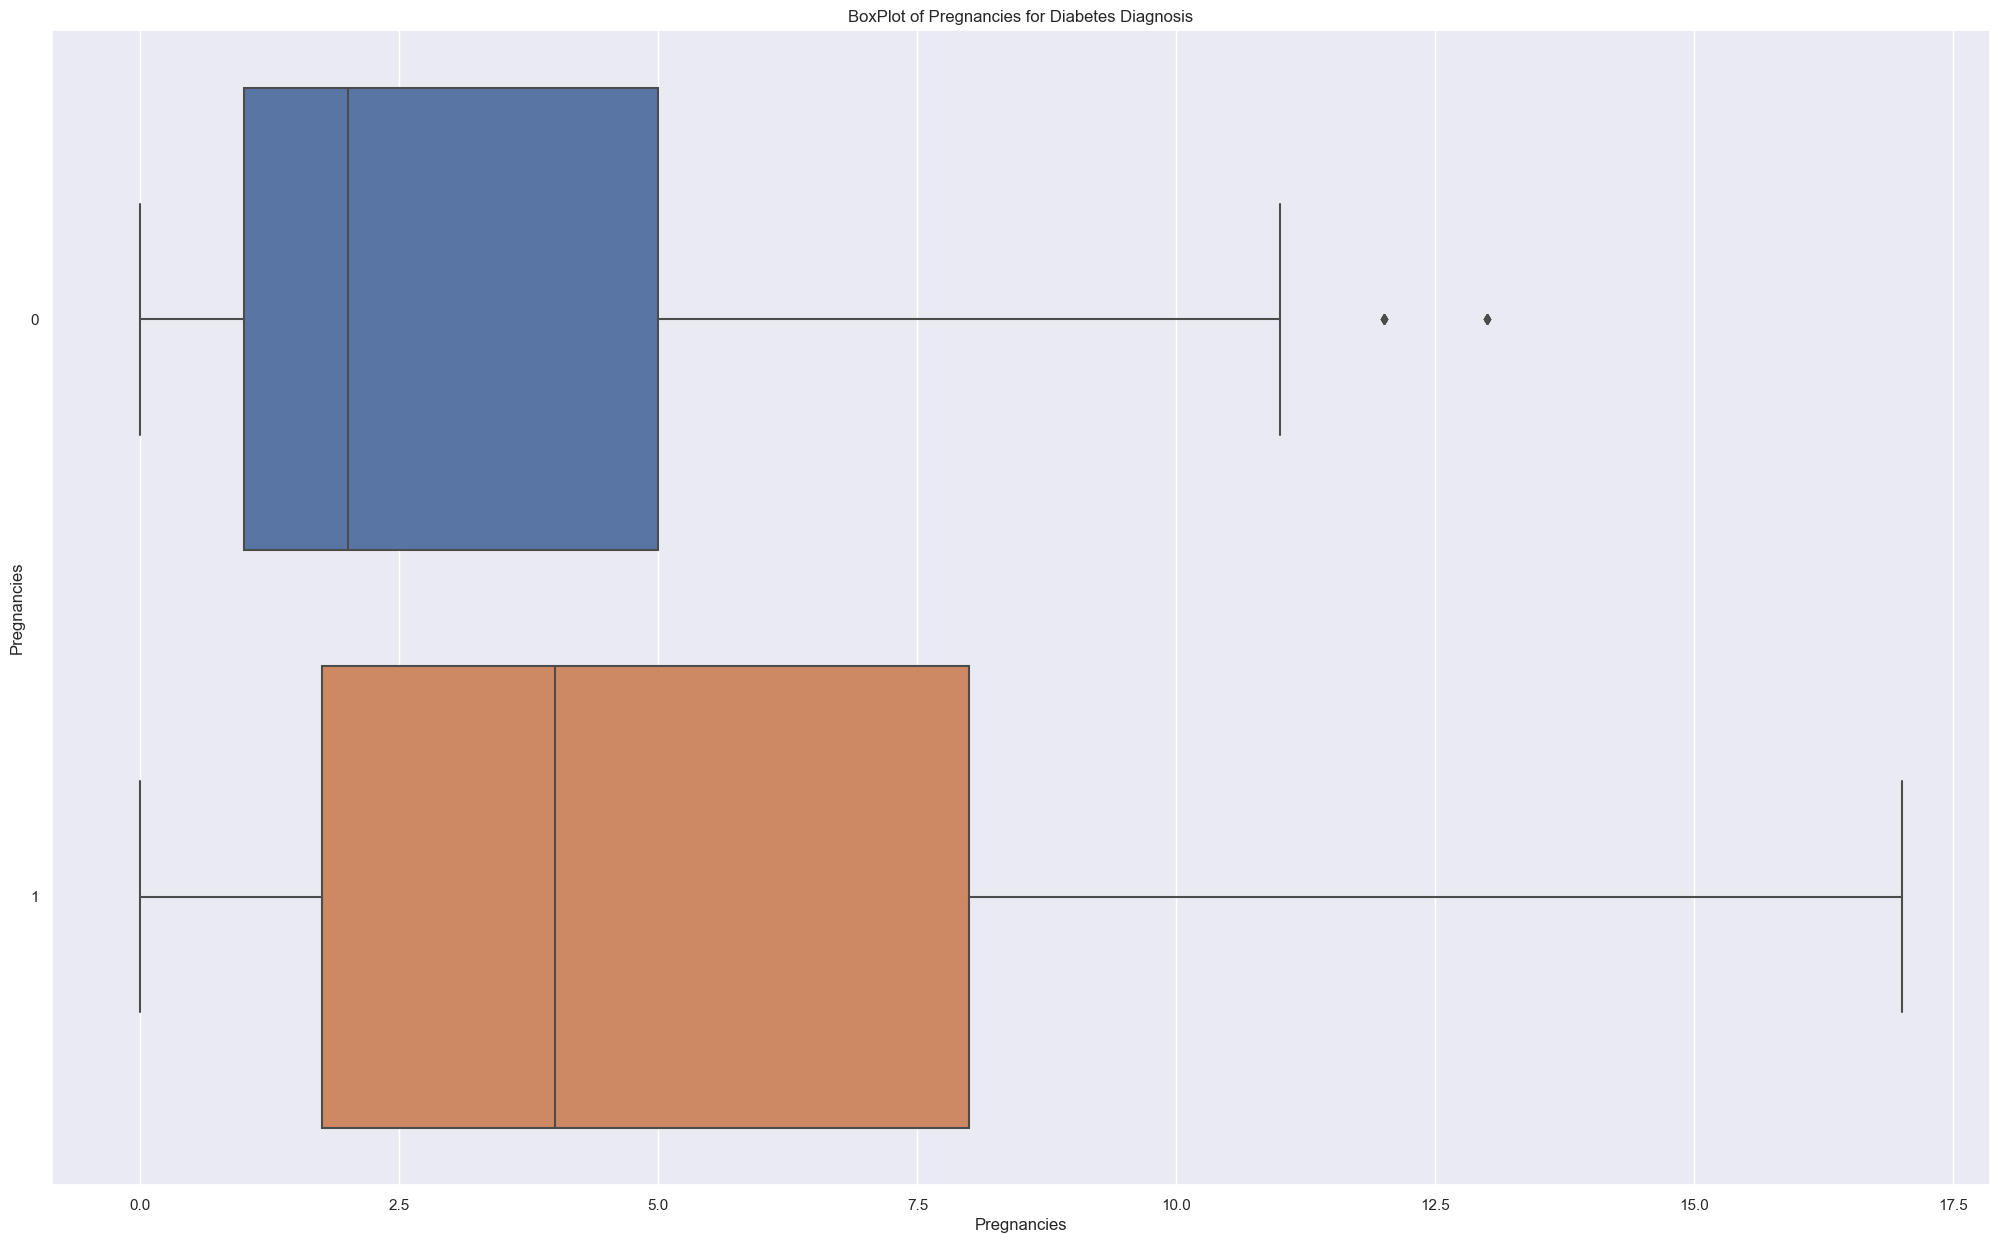

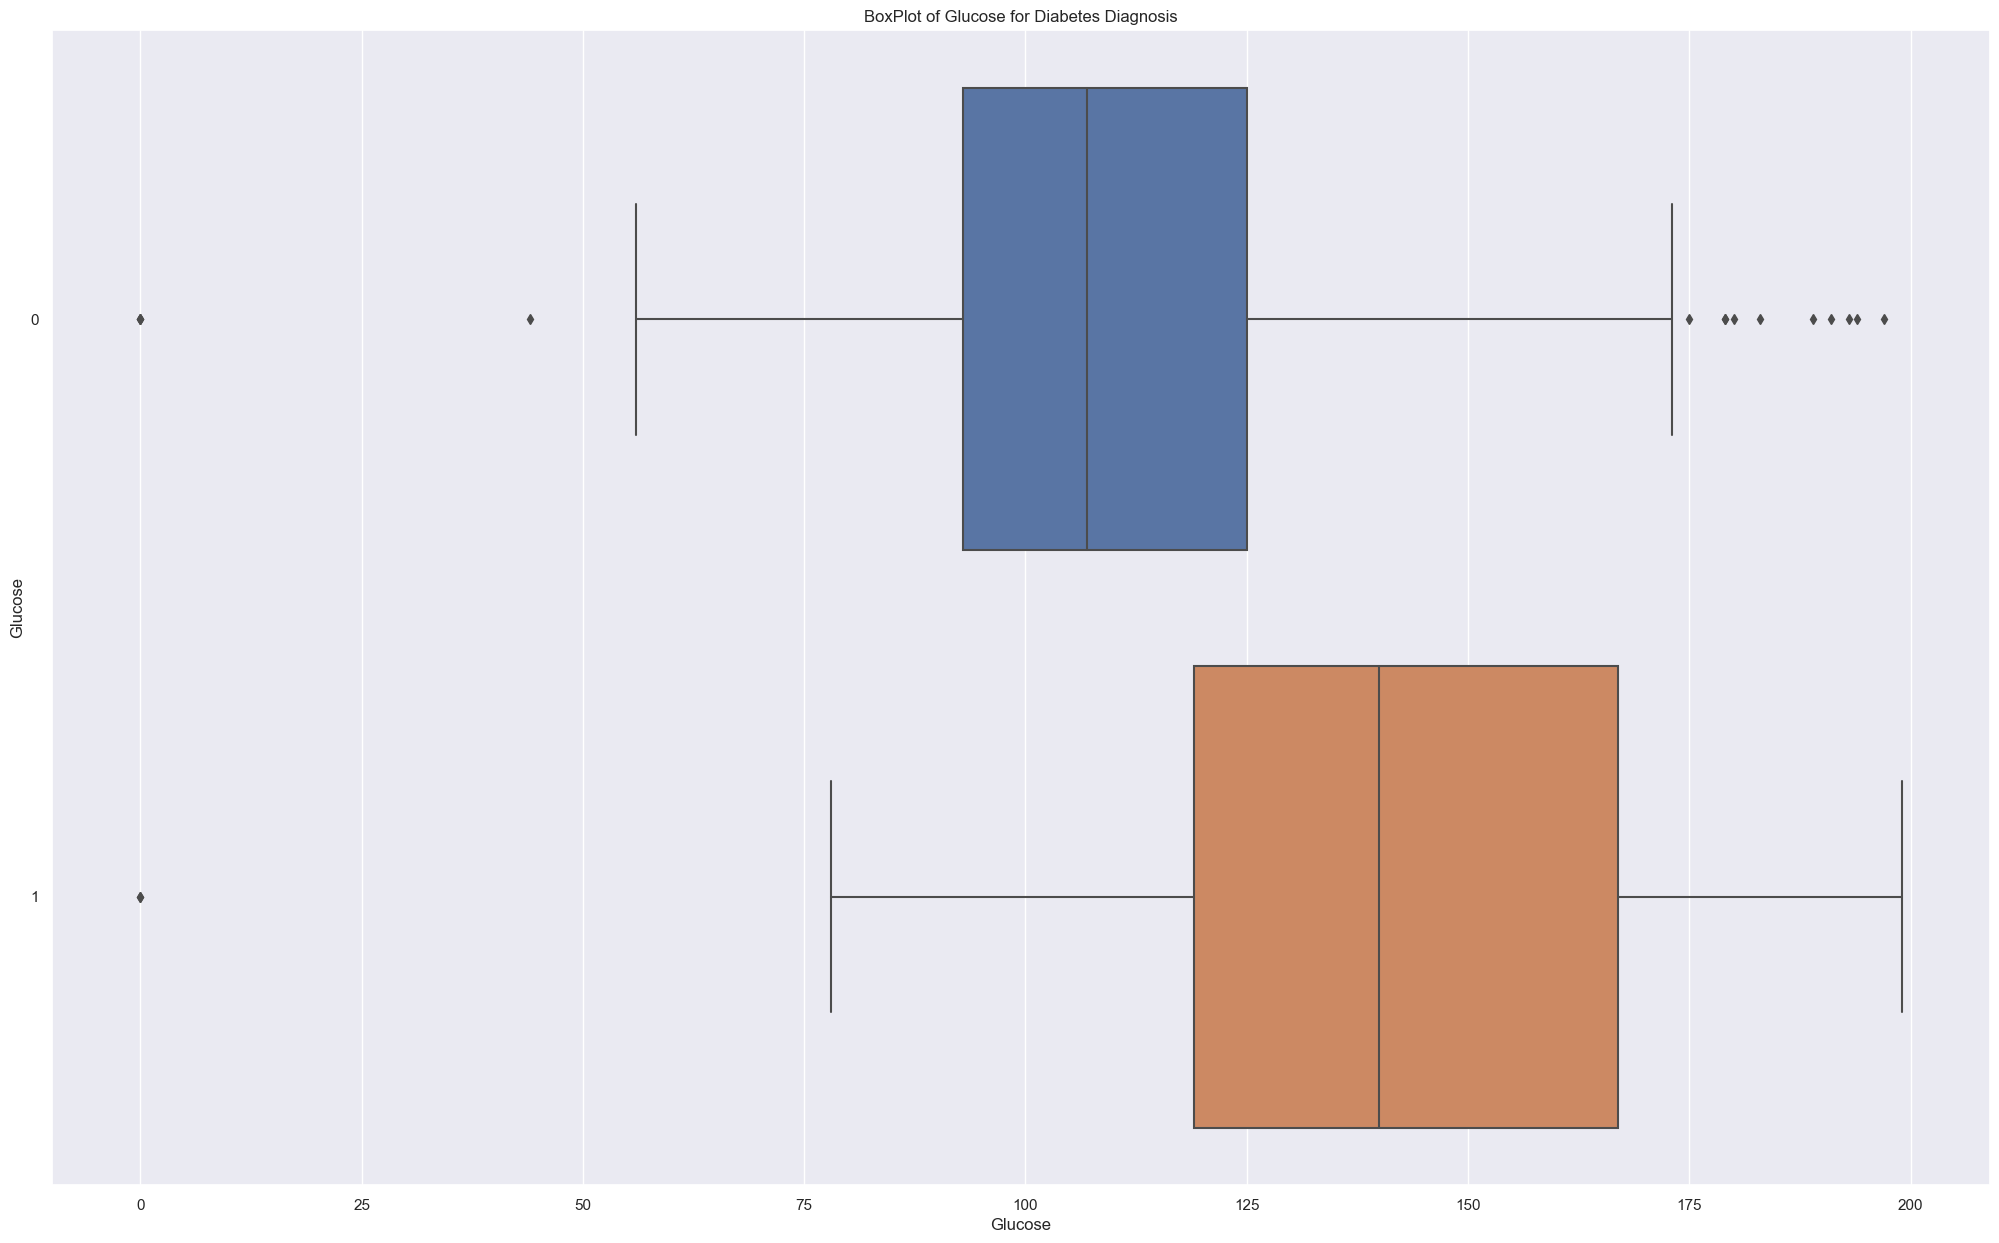

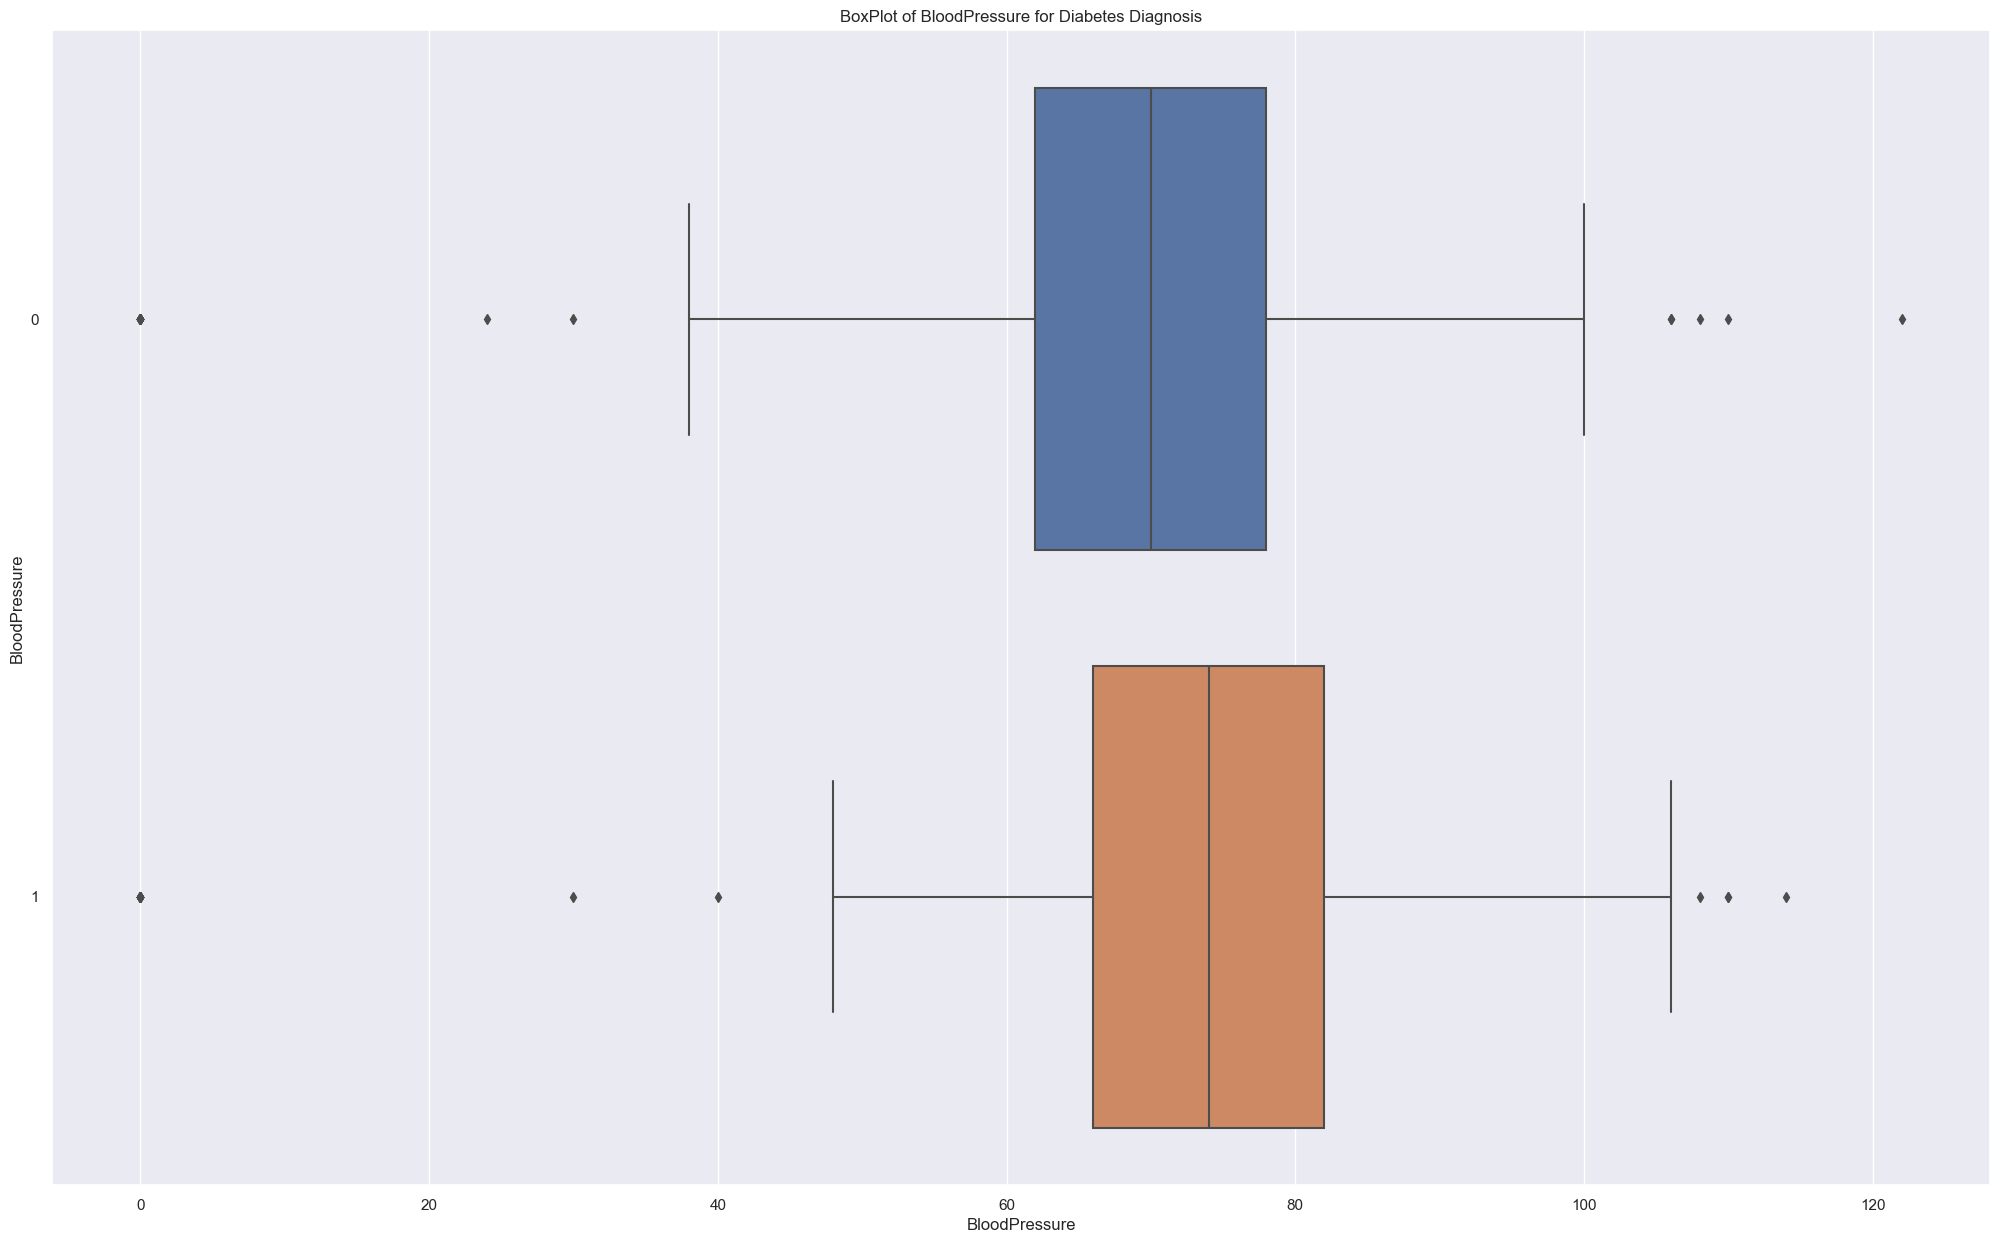

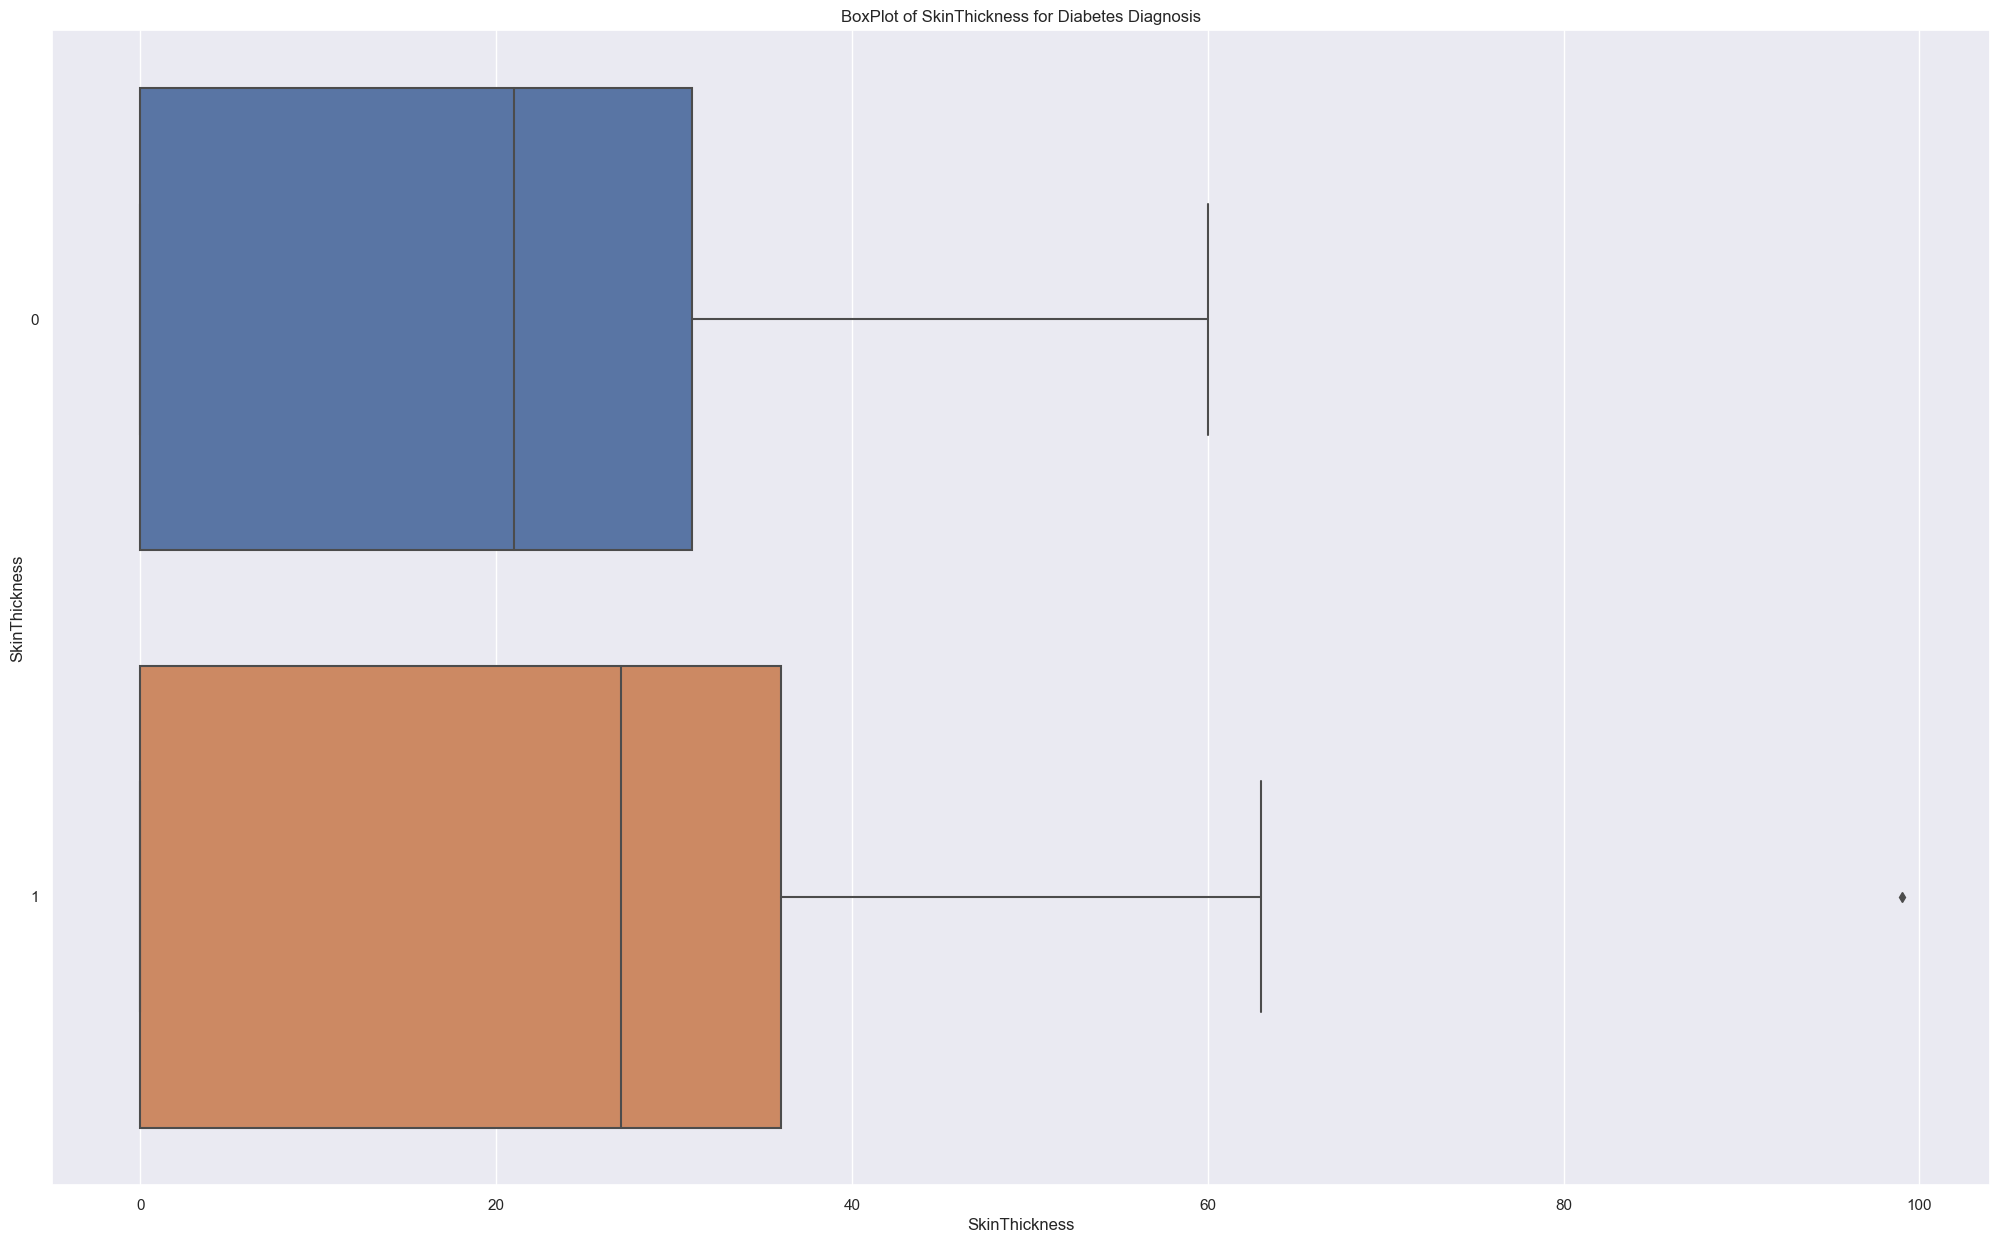

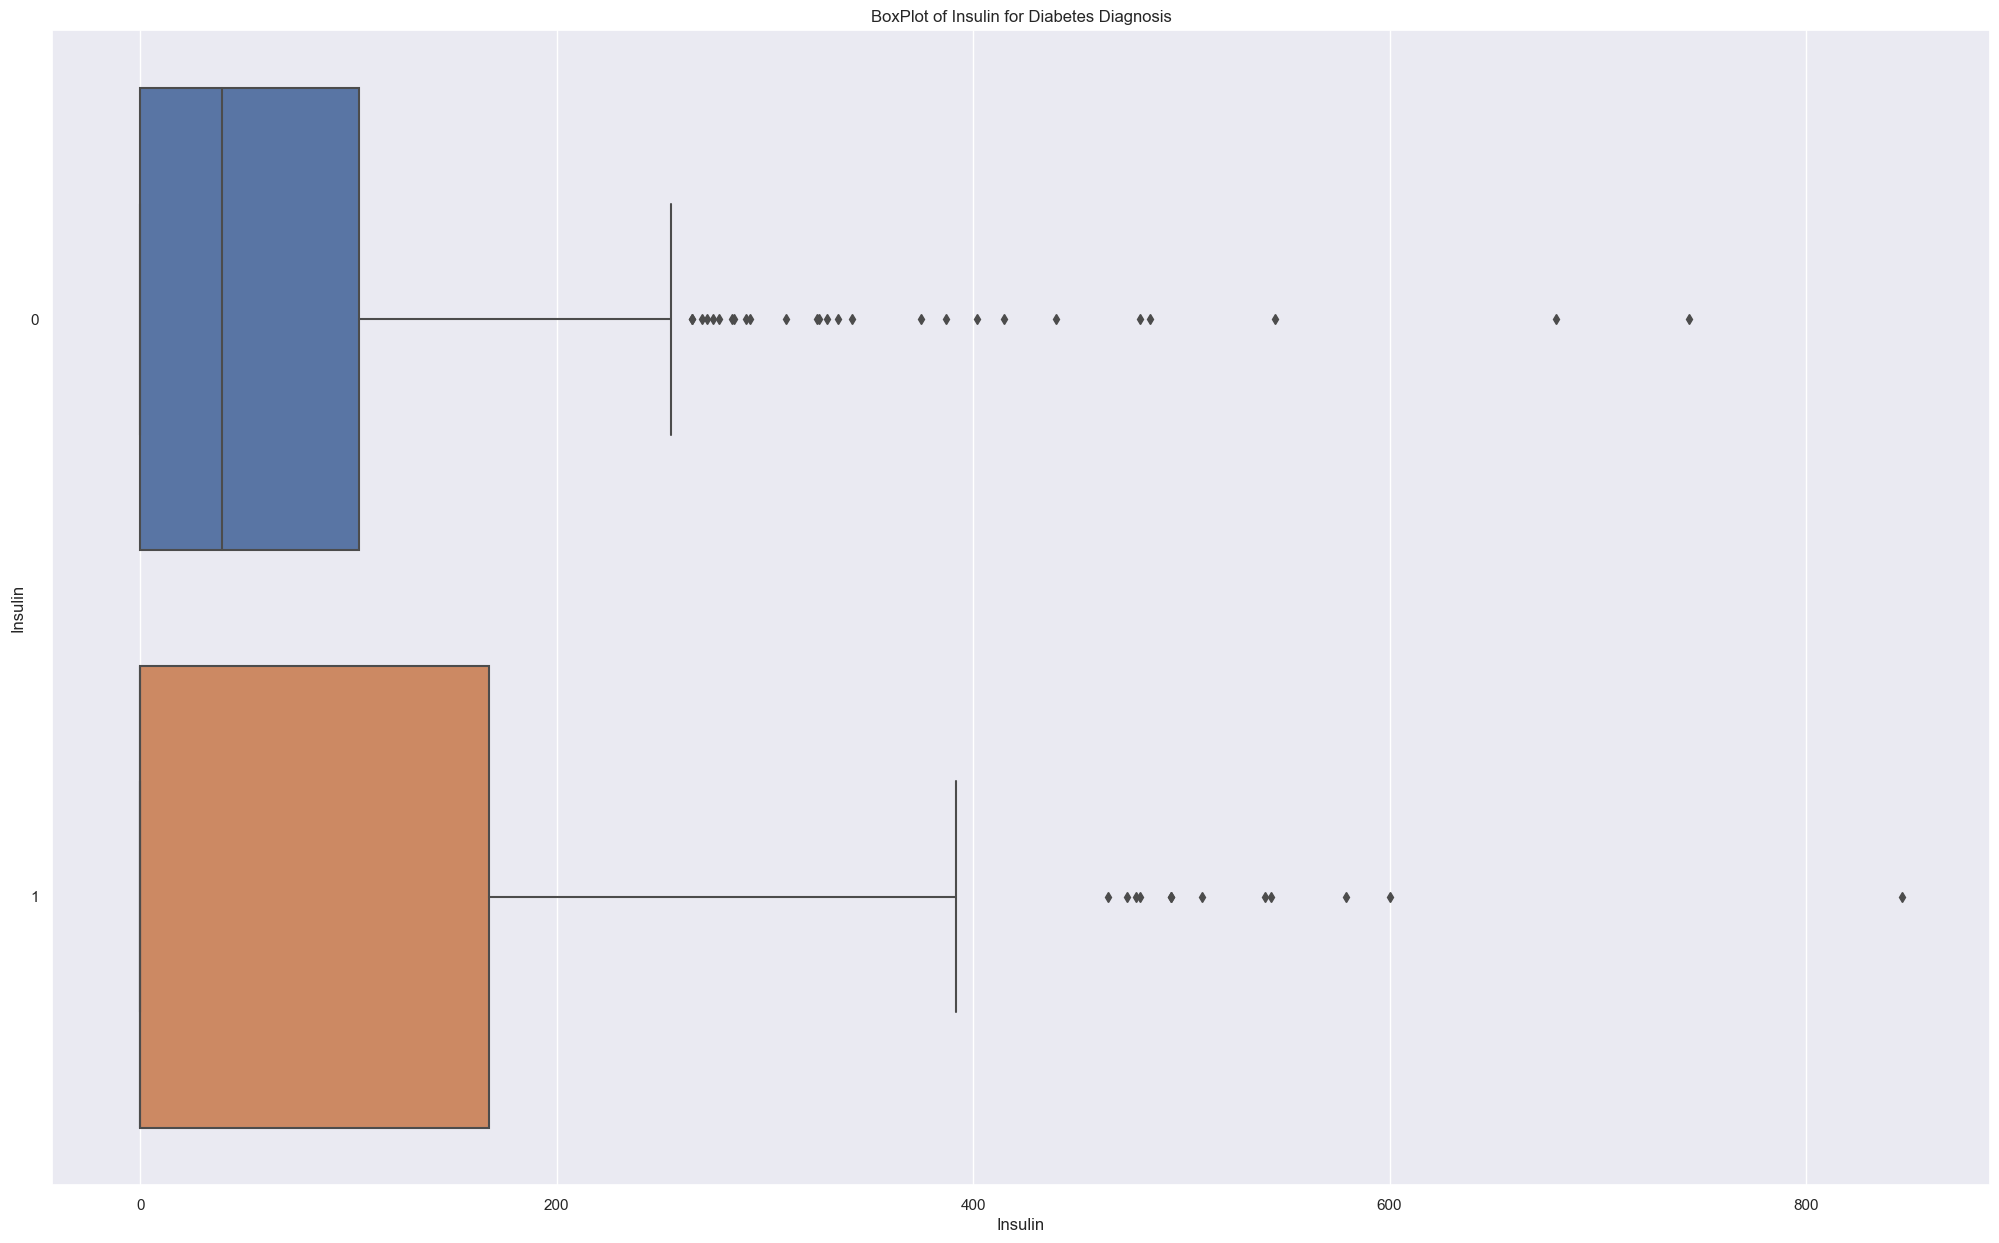

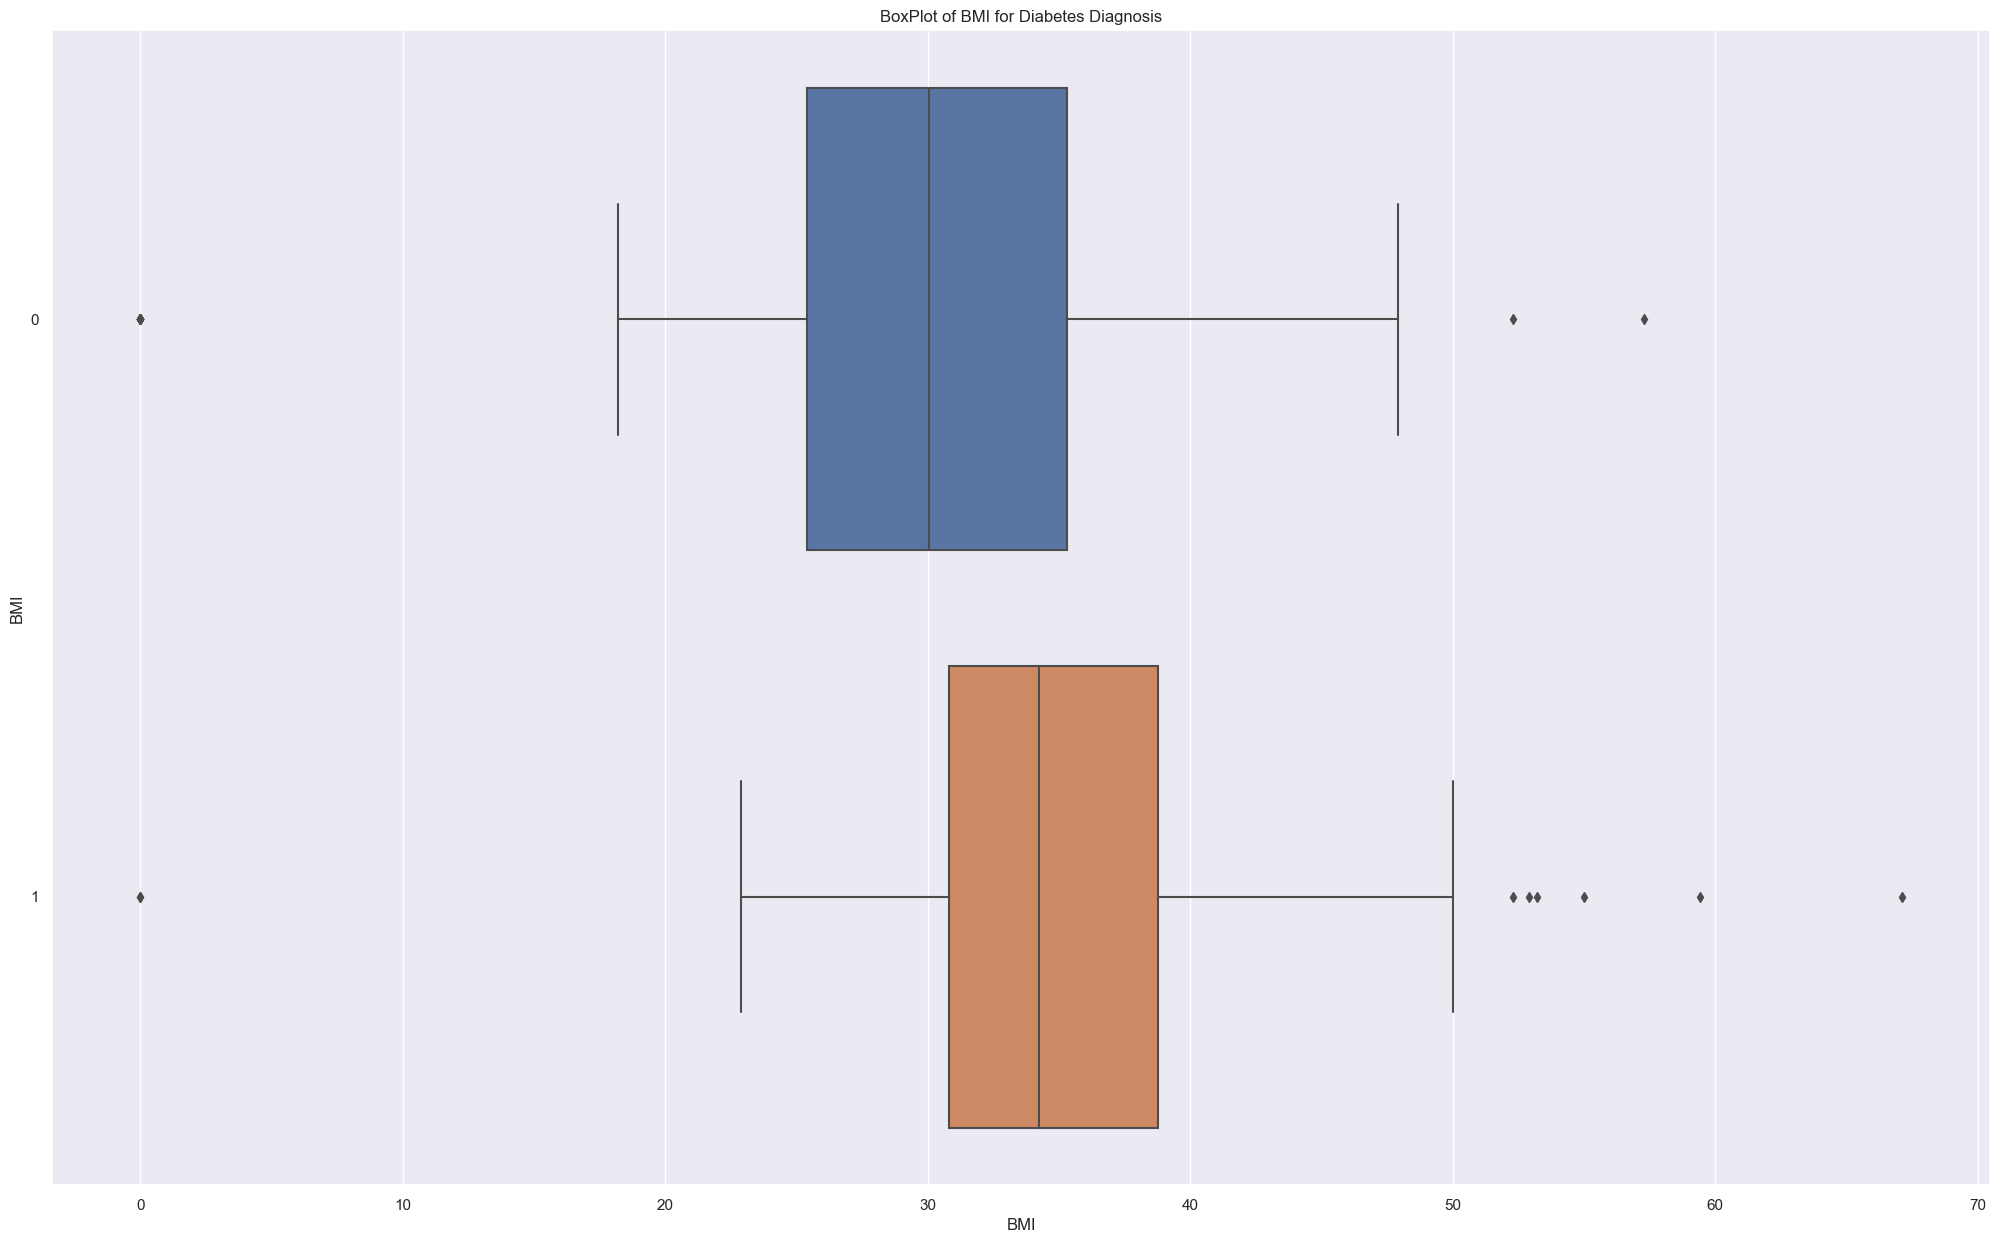

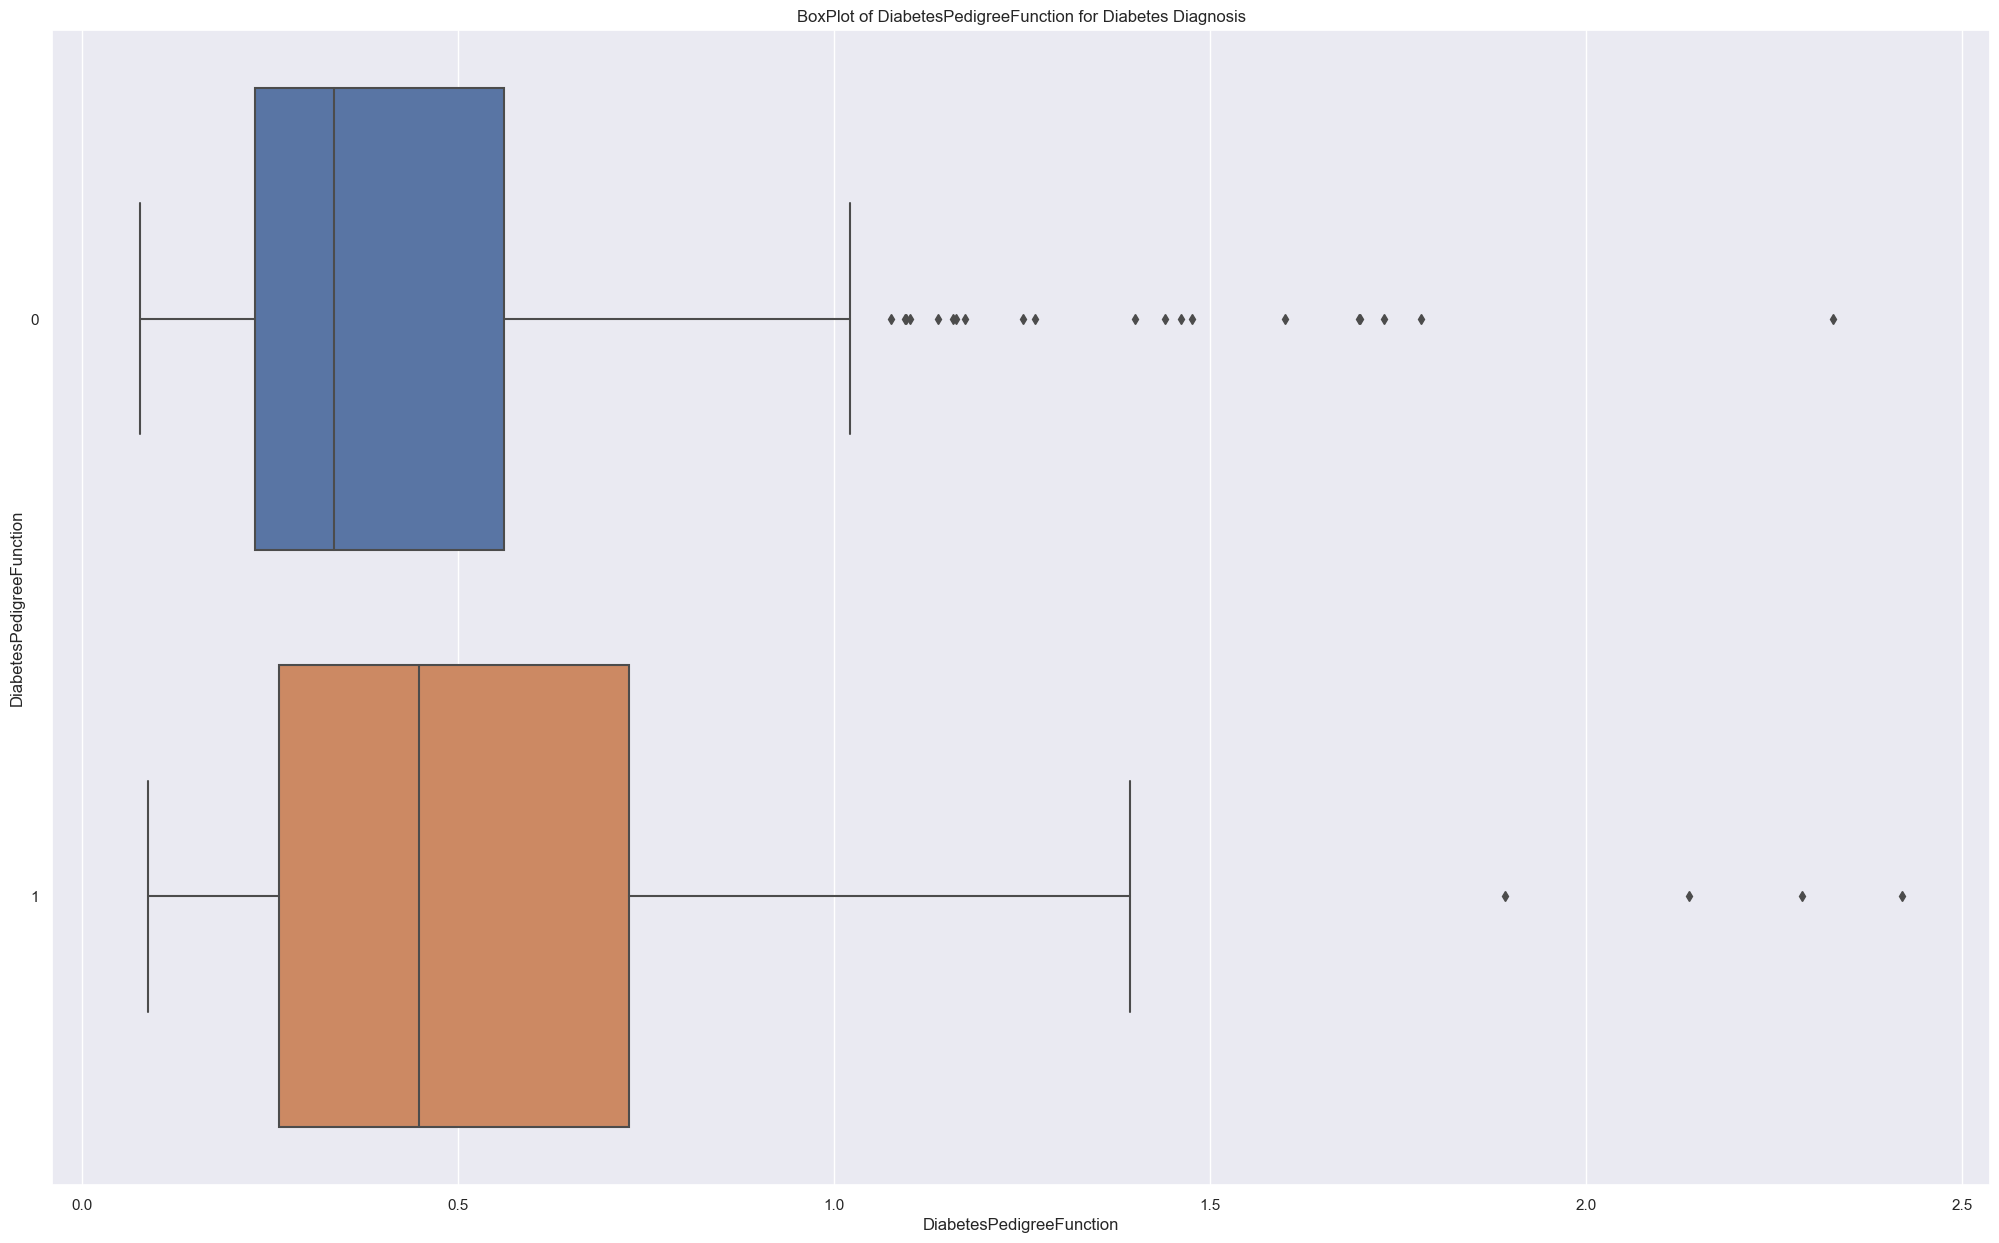

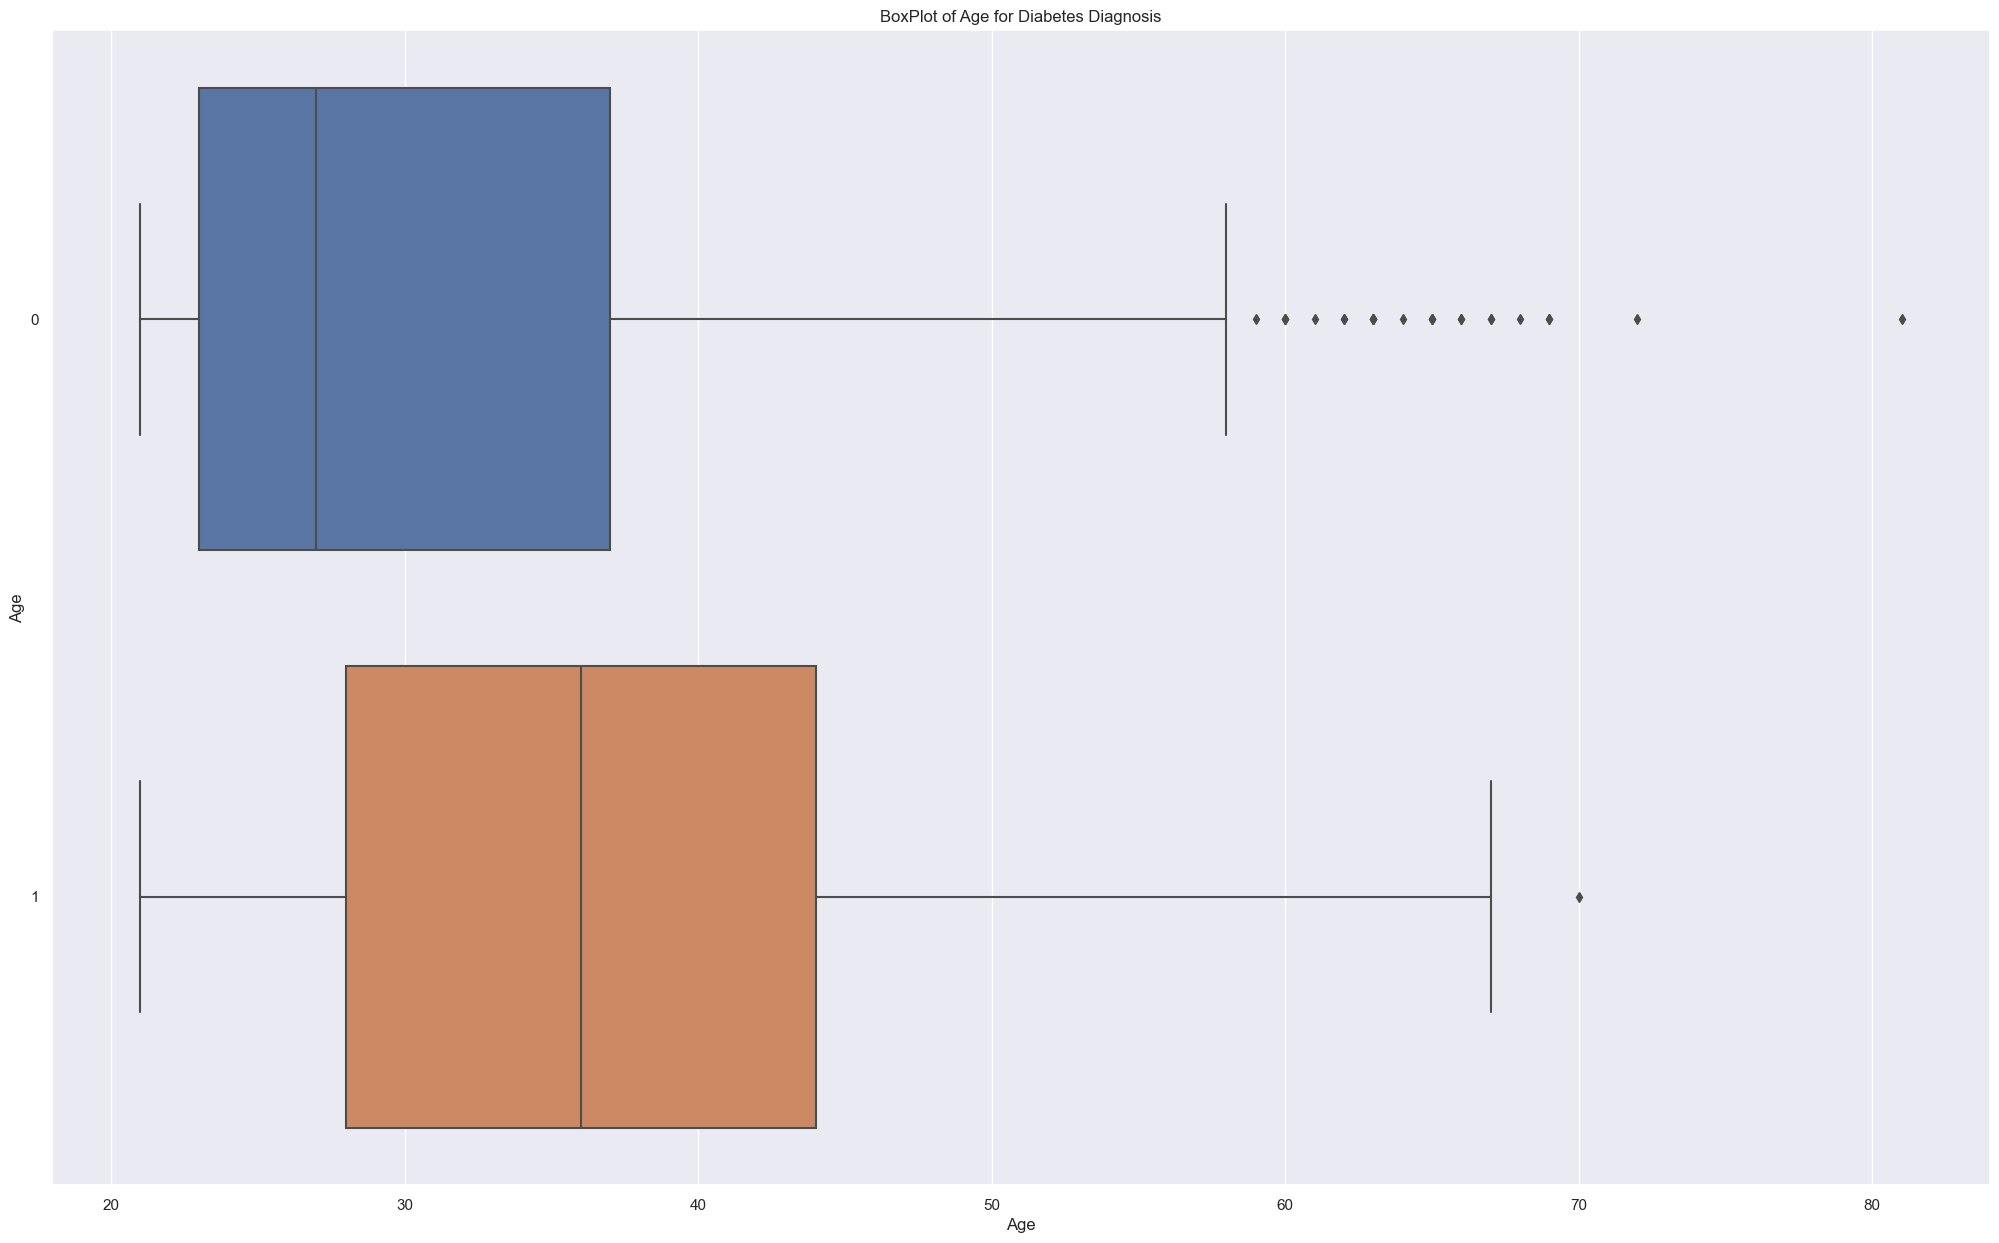

In [13]:
#Relationship of variables
feature_columns = diabetes_data.columns.drop('Outcome')
for column in feature_columns:
    f = plt.figure(figsize=(25, 15))
    sb.boxplot(x=column, y='Outcome', data=diabetes_data, orient="h")
    plt.title(f'BoxPlot of {column} for Diabetes Diagnosis')
    plt.ylabel(f'{column}')
    plt.show()

### Based on the boxplots shown, we can see that :
***
- Outcome of '1'has a higher median of Pregnancies.
- For Outcome of '1' ,the median of Glucose is on the higher side compared to Outcome of '0'.
- The median BMI for those with diabetes is higher compared to those with no diabetes.
- The spread of Glucose, Insulin, Age and DiabetesPedigreeFunction have a wider spread, indicating theres is more variability compared to other variables.

Text(0.5, 1.0, 'Insulin Vs Glucose')

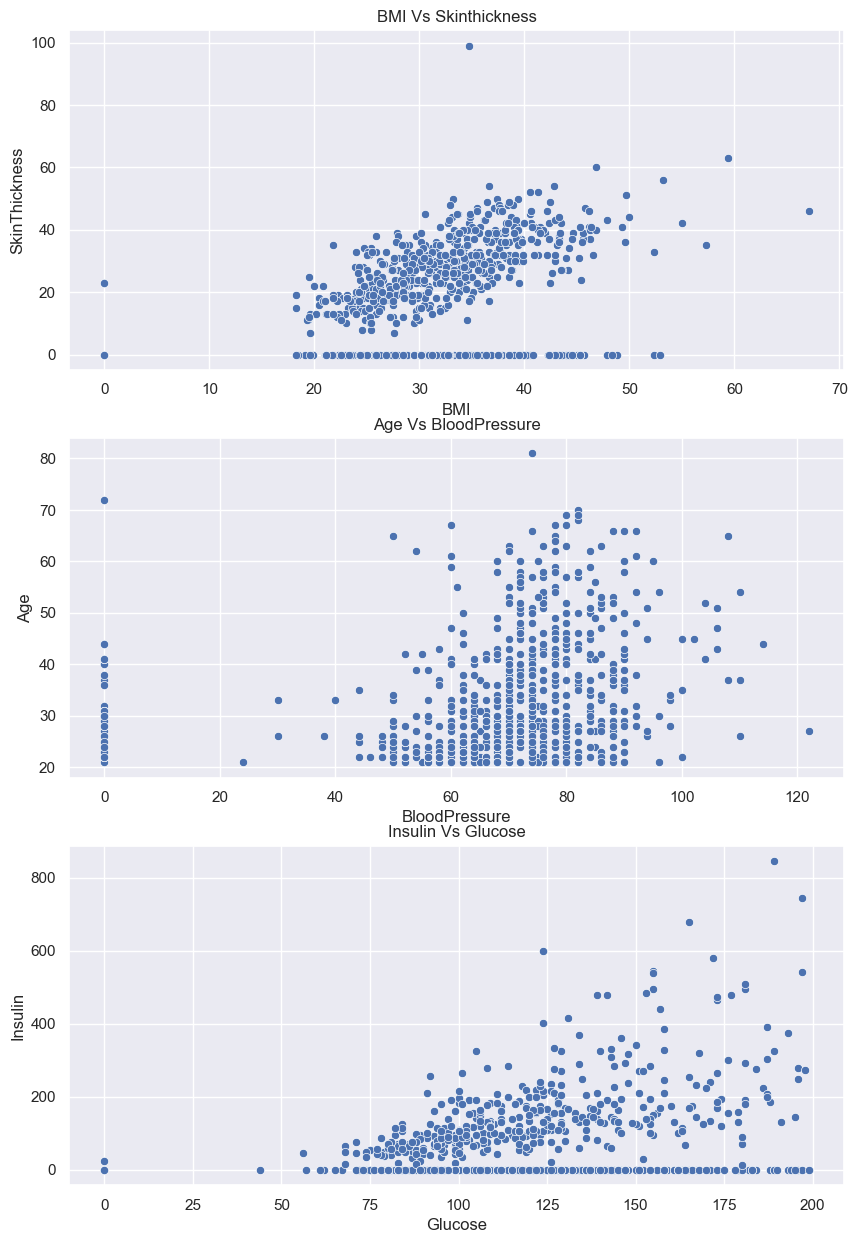

In [14]:
# Lets evaluate some more insights the data relationships
f, axes = plt.subplots(3, 1, figsize=(10, 15))
sb.scatterplot(data=diabetes_data,x="BMI",y="SkinThickness",ax = axes[0])
axes[0].set_title('BMI Vs Skinthickness')
sb.scatterplot(data=diabetes_data,x="BloodPressure",y="Age",ax = axes[1])
axes[1].set_title('Age Vs BloodPressure')
sb.scatterplot(data=diabetes_data,x="Glucose",y="Insulin",ax = axes[2])
axes[2].set_title('Insulin Vs Glucose')

- There is a strong relationship between between two independent variable 'BMI' & 'Skinthickness'. But compare to Skinthickness, BMI has strong relationship with variable 'Outcome'.
- Hence its safe to assume we can drop 'Skinthickness'.

# Cleaning the Data

<div class="alert alert-block alert-info">
We will proceed with cleaning the data by removing the outliers from 'Insulin','BMI' and 'DiabetesPedigreeFunction'
</div>

In [15]:
#Function to determine how many outliers in each of these variables
def Total_Outlier(data,column):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q3-Q1
    lowoutlier=Q1-1.5*IQR
    highoutlier=Q3+1.5*IQR
    totaloutlier=((data[column]<lowoutlier)|(data[column]>highoutlier)).sum()
    print("Total number of Outliers in "+ column + " are : {}".format(totaloutlier))
    
outliers_list = ['Insulin','BMI','DiabetesPedigreeFunction']

for i in outliers_list:
    Total_Outlier(diabetes_data,i)

Total number of Outliers in Insulin are : 34
Total number of Outliers in BMI are : 19
Total number of Outliers in DiabetesPedigreeFunction are : 29


In [16]:
#After removal of Outliers
outliers_list = ['Insulin','BMI','DiabetesPedigreeFunction']
def Outlier_Removal(data,column):
    clean_data = data[(data[column]<highoutlier)&(data[column]>lowoutlier)]
    totaloutlier = ((clean_data[column] < lowoutlier) | (clean_data[column] > highoutlier)).sum()
    print("Total number of Outliers in "+ column + " are : {}".format(totaloutlier))
    return clean_data

for i in outliers_list:
    lowoutlier = diabetes_data[i].quantile(0.25) - 1.5 * (diabetes_data[i].quantile(0.75) - diabetes_data[i].quantile(0.25))
    highoutlier = diabetes_data[i].quantile(0.75) + 1.5 * (diabetes_data[i].quantile(0.75) - diabetes_data[i].quantile(0.25))
    clean_data = Outlier_Removal(diabetes_data,i)

Total number of Outliers in Insulin are : 0
Total number of Outliers in BMI are : 0
Total number of Outliers in DiabetesPedigreeFunction are : 0


In [17]:
clean_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Histoplot for cleaned data

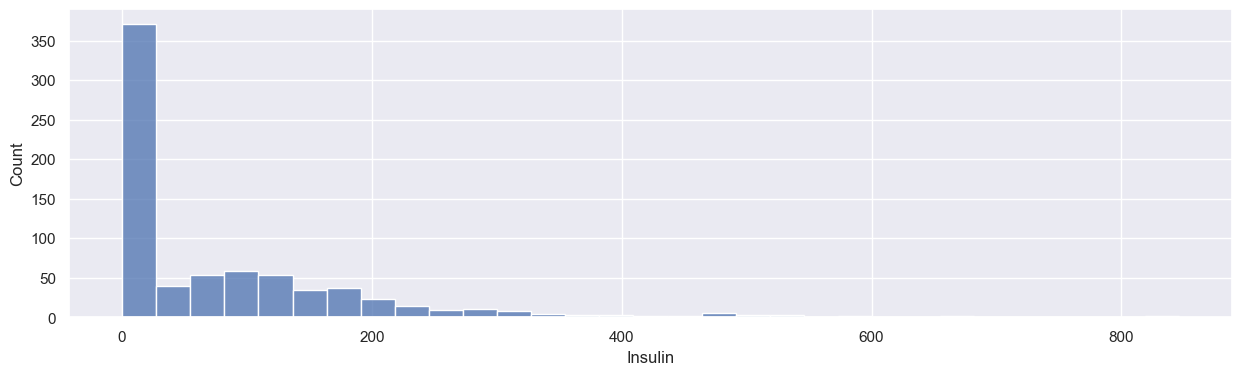

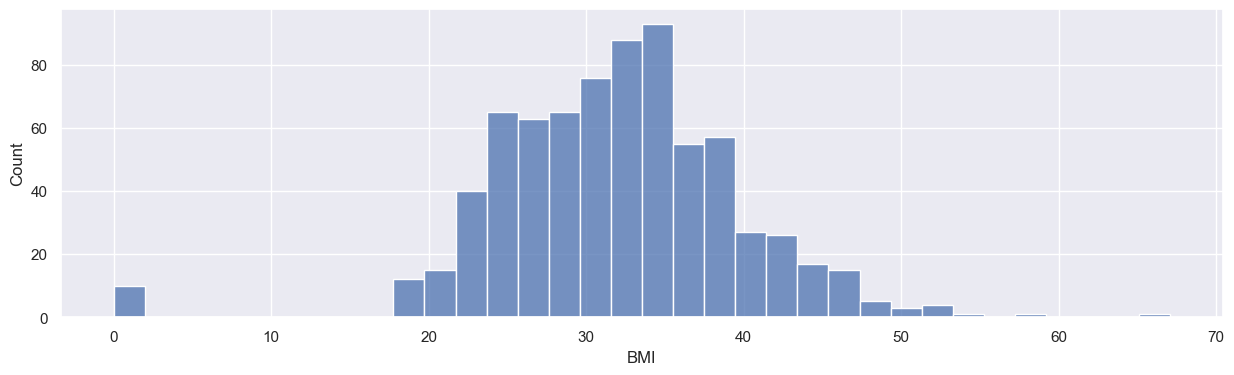

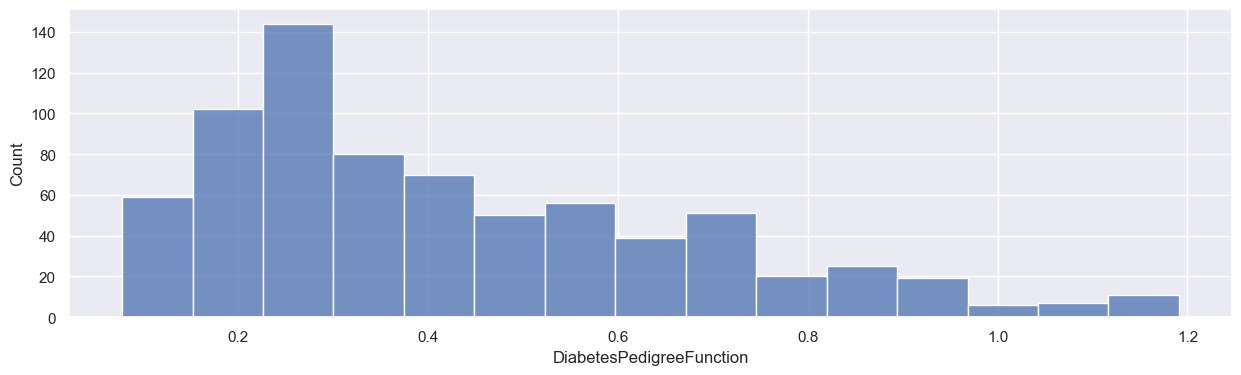

In [18]:
outliers_list = ['Insulin','BMI','DiabetesPedigreeFunction']
def Univariate_boxplot (data,column):
    plt.figure(figsize=(15, 4))
    sb.histplot(data = data,x = column)

for columns in outliers_list :
    Univariate_boxplot (clean_data,columns)
    plt.show()

# Binary Classification

<div class="alert alert-block alert-info">
We will be using all variables to help predict whether a patient had diabetes
Here, we would like to show how relevant each variable is to 'Outcome' using the stripplot.
</div>

### Exploration between Response and Predictor

Text(0.5, 1.0, 'Outcome by Glucose')

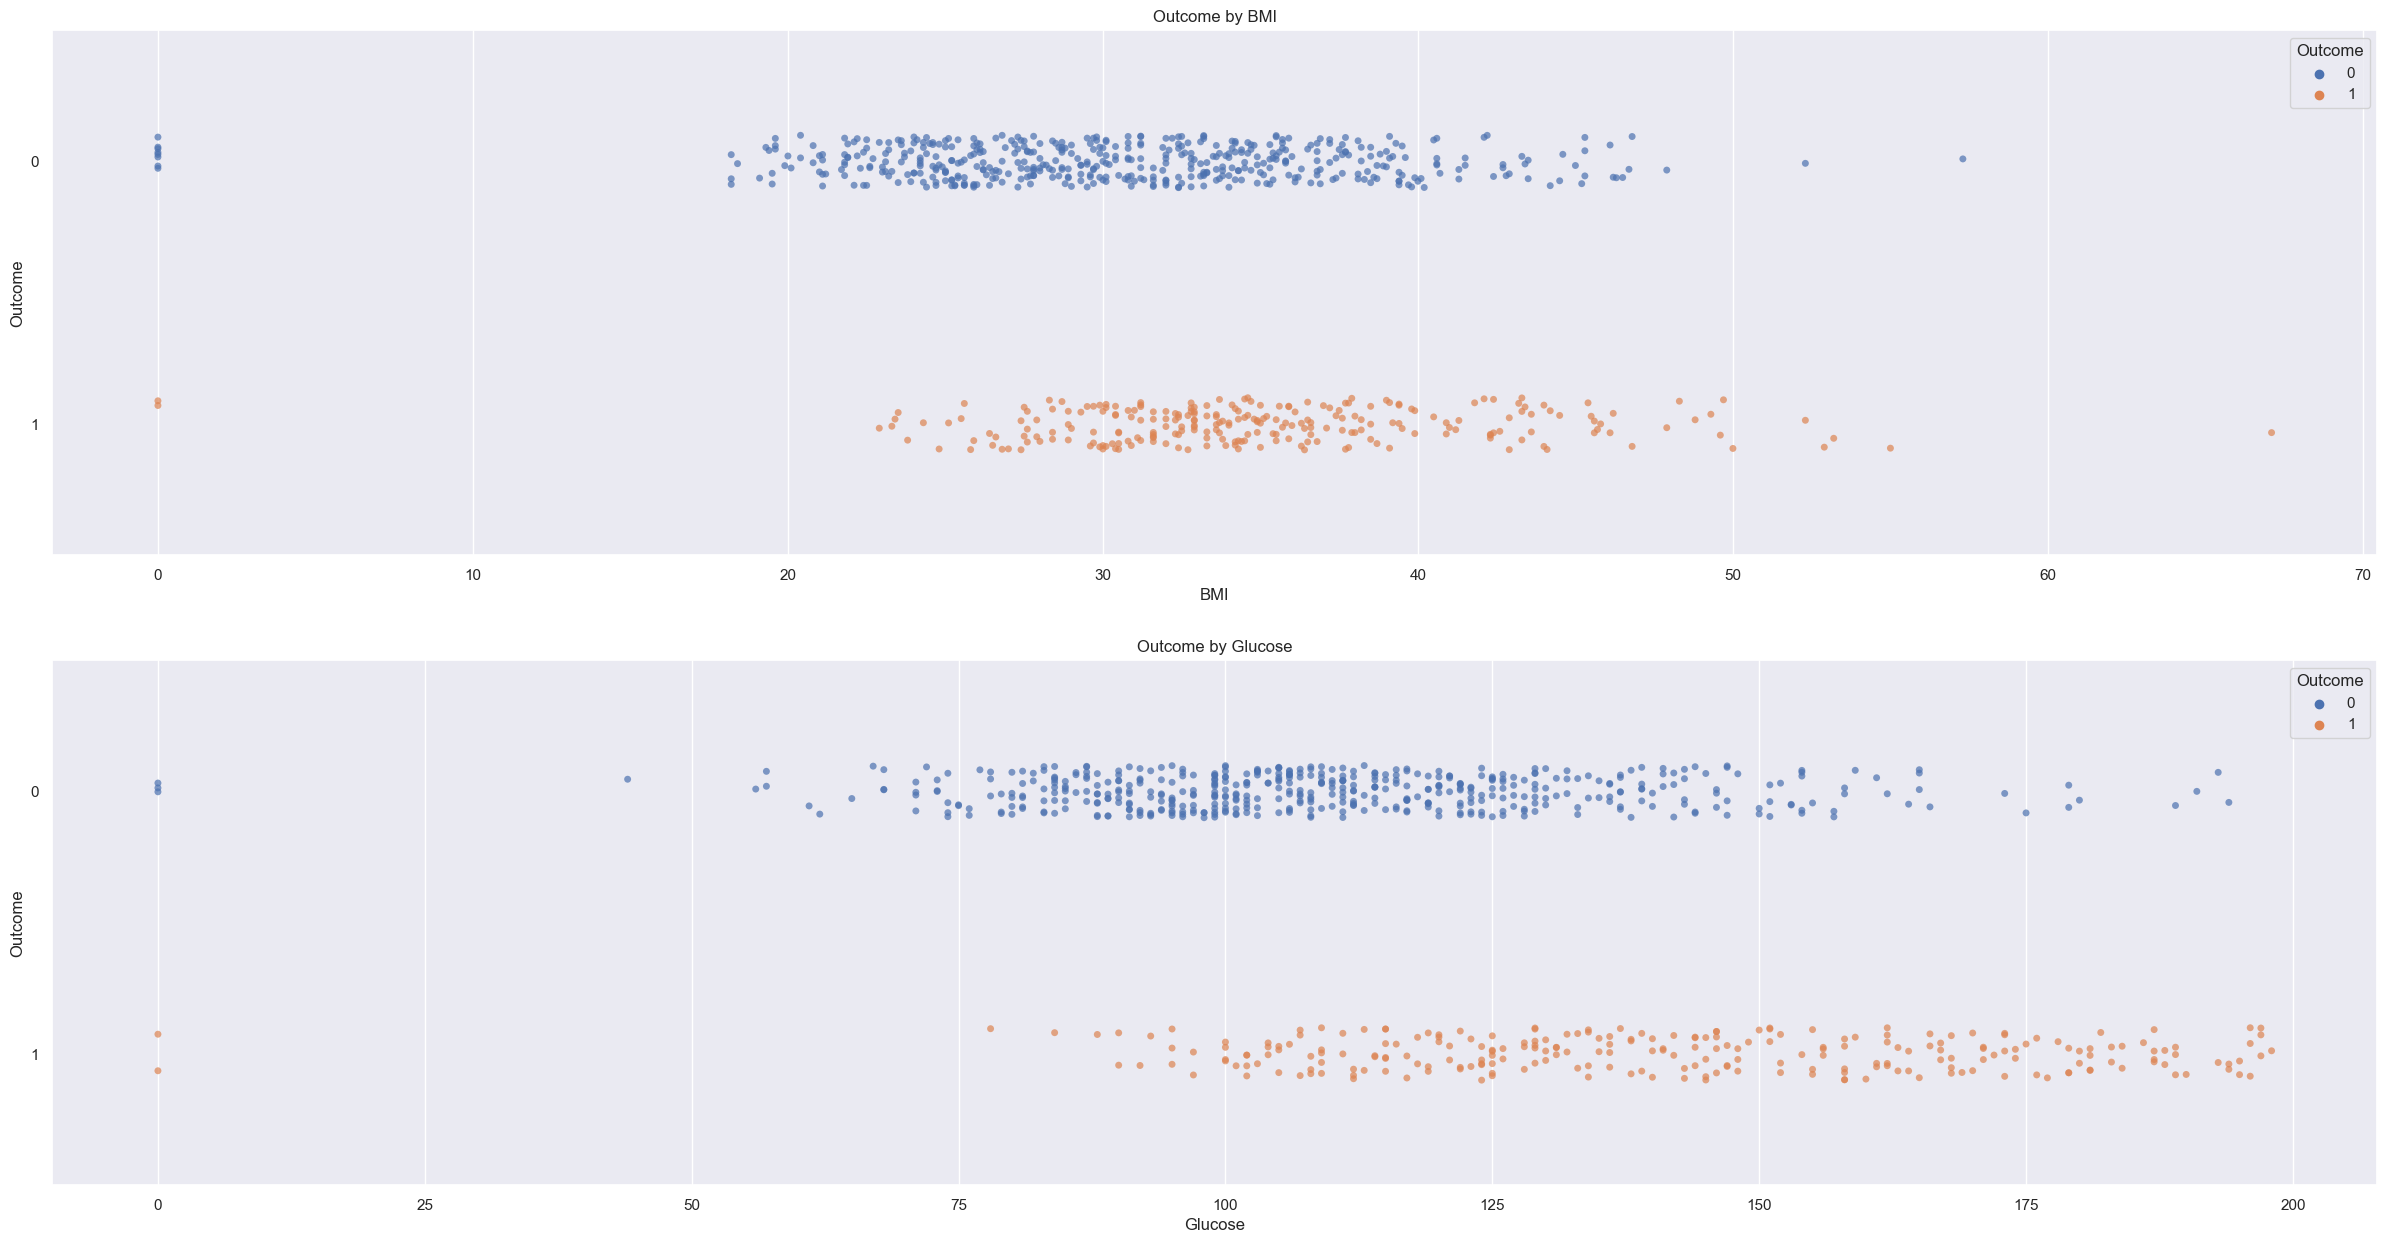

In [20]:
f, axes = plt.subplots(2, 1, figsize=(30, 15))

sb.stripplot(x='BMI', y='Outcome', data=clean_data, orient="h", ax=axes[0], hue ='Outcome',alpha=0.7)
axes[0].set_title('Outcome by BMI')

sb.stripplot(x='Glucose', y='Outcome', data=clean_data, orient="h", ax=axes[1], hue = 'Outcome',alpha=0.7)
axes[1].set_title('Outcome by Glucose')

Text(0.5, 1.0, 'Outcome by Insulin')

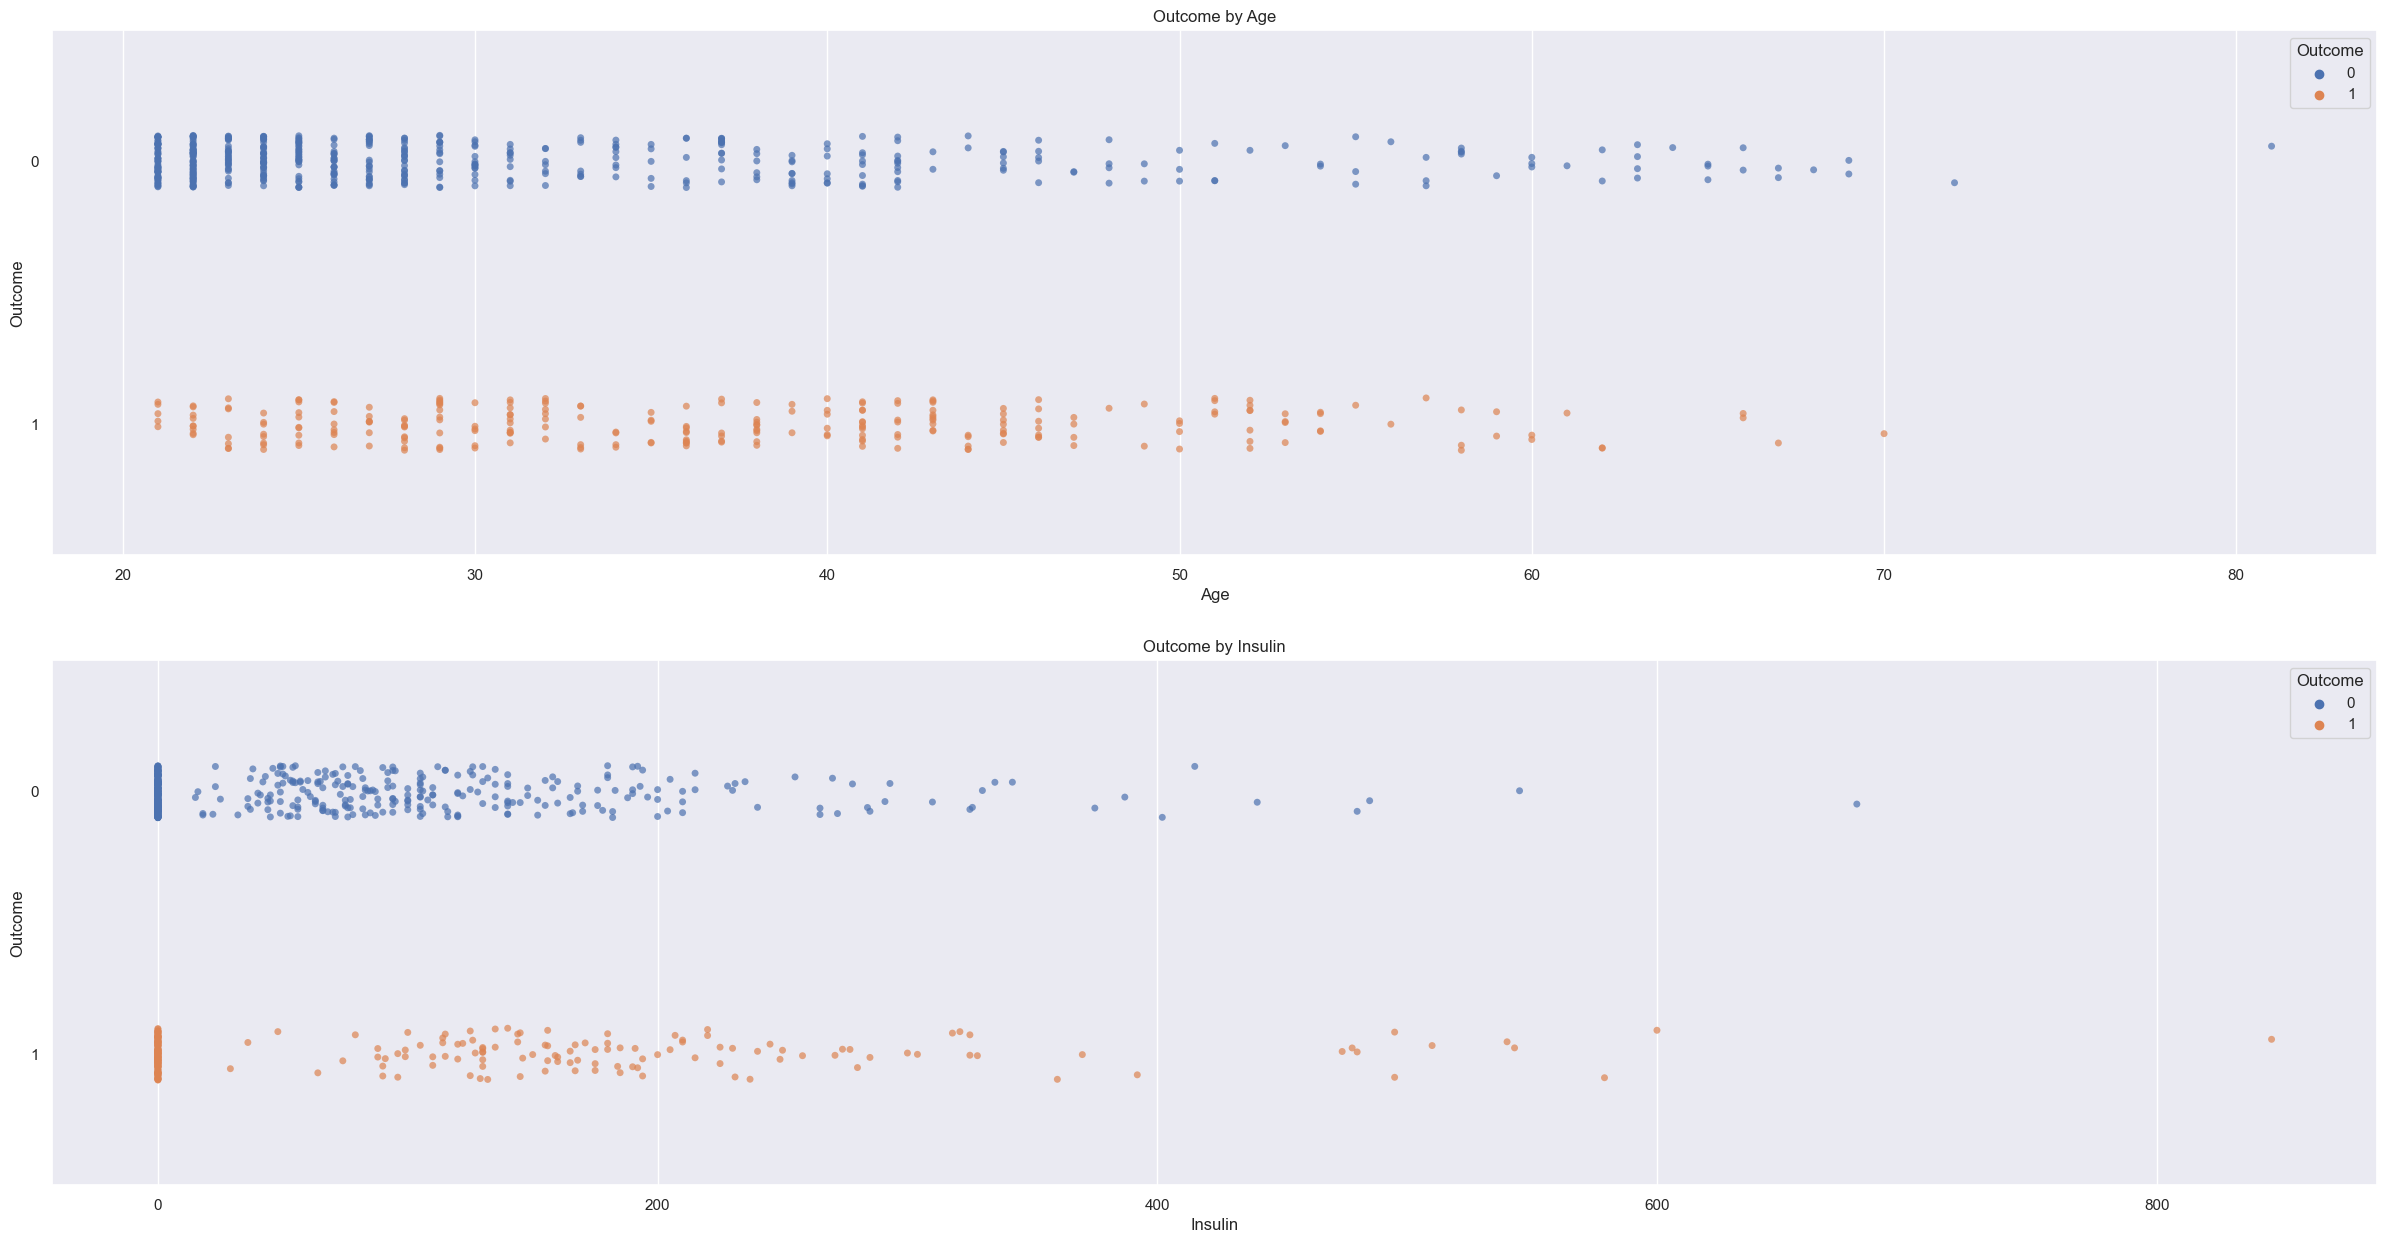

In [21]:
f, axes = plt.subplots(2, 1, figsize=(30, 15))

sb.stripplot(x='Age', y='Outcome', data=clean_data, orient="h", ax=axes[0], hue ='Outcome',alpha=0.7)
axes[0].set_title('Outcome by Age')

sb.stripplot(x='Insulin', y='Outcome', data=clean_data, orient="h", ax=axes[1], hue = 'Outcome',alpha=0.7)
axes[1].set_title('Outcome by Insulin')


Text(0.5, 1.0, 'Outcome by BloodPressure')

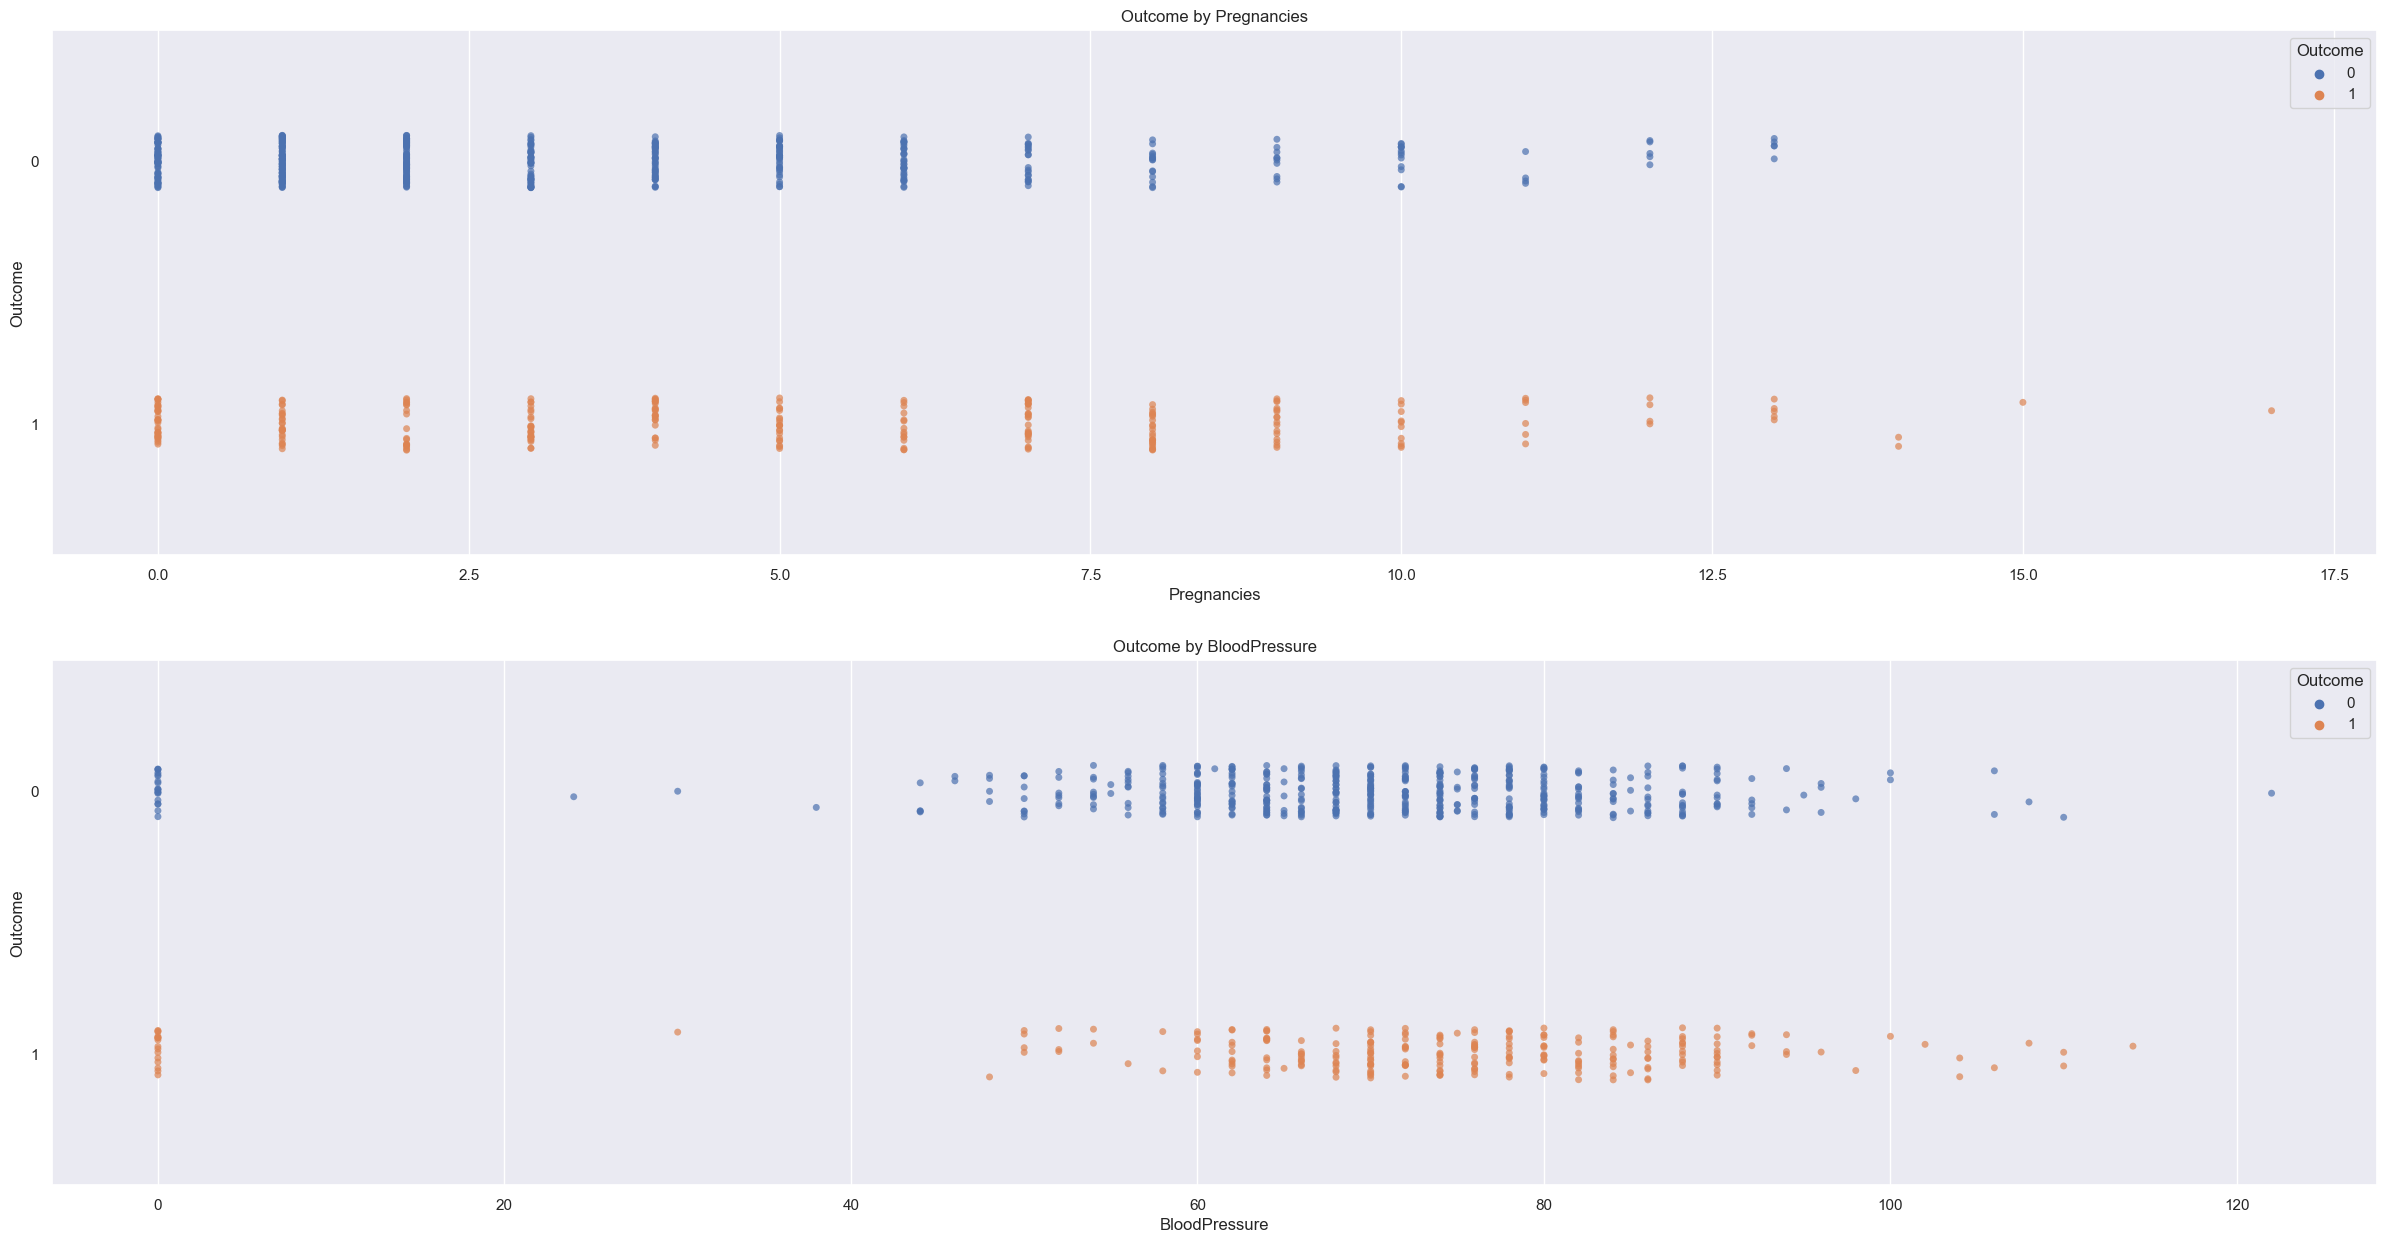

In [22]:
f, axes = plt.subplots(2, 1, figsize=(30, 15))

sb.stripplot(x='Pregnancies', y='Outcome', data=clean_data, orient="h", ax=axes[0], hue ='Outcome',alpha=0.7)
axes[0].set_title('Outcome by Pregnancies')

sb.stripplot(x='BloodPressure', y='Outcome', data=clean_data, orient="h", ax=axes[1], hue = 'Outcome',alpha=0.7)
axes[1].set_title('Outcome by BloodPressure')

Text(0.5, 1.0, 'Outcome by DiabetesPedigreeFunction')

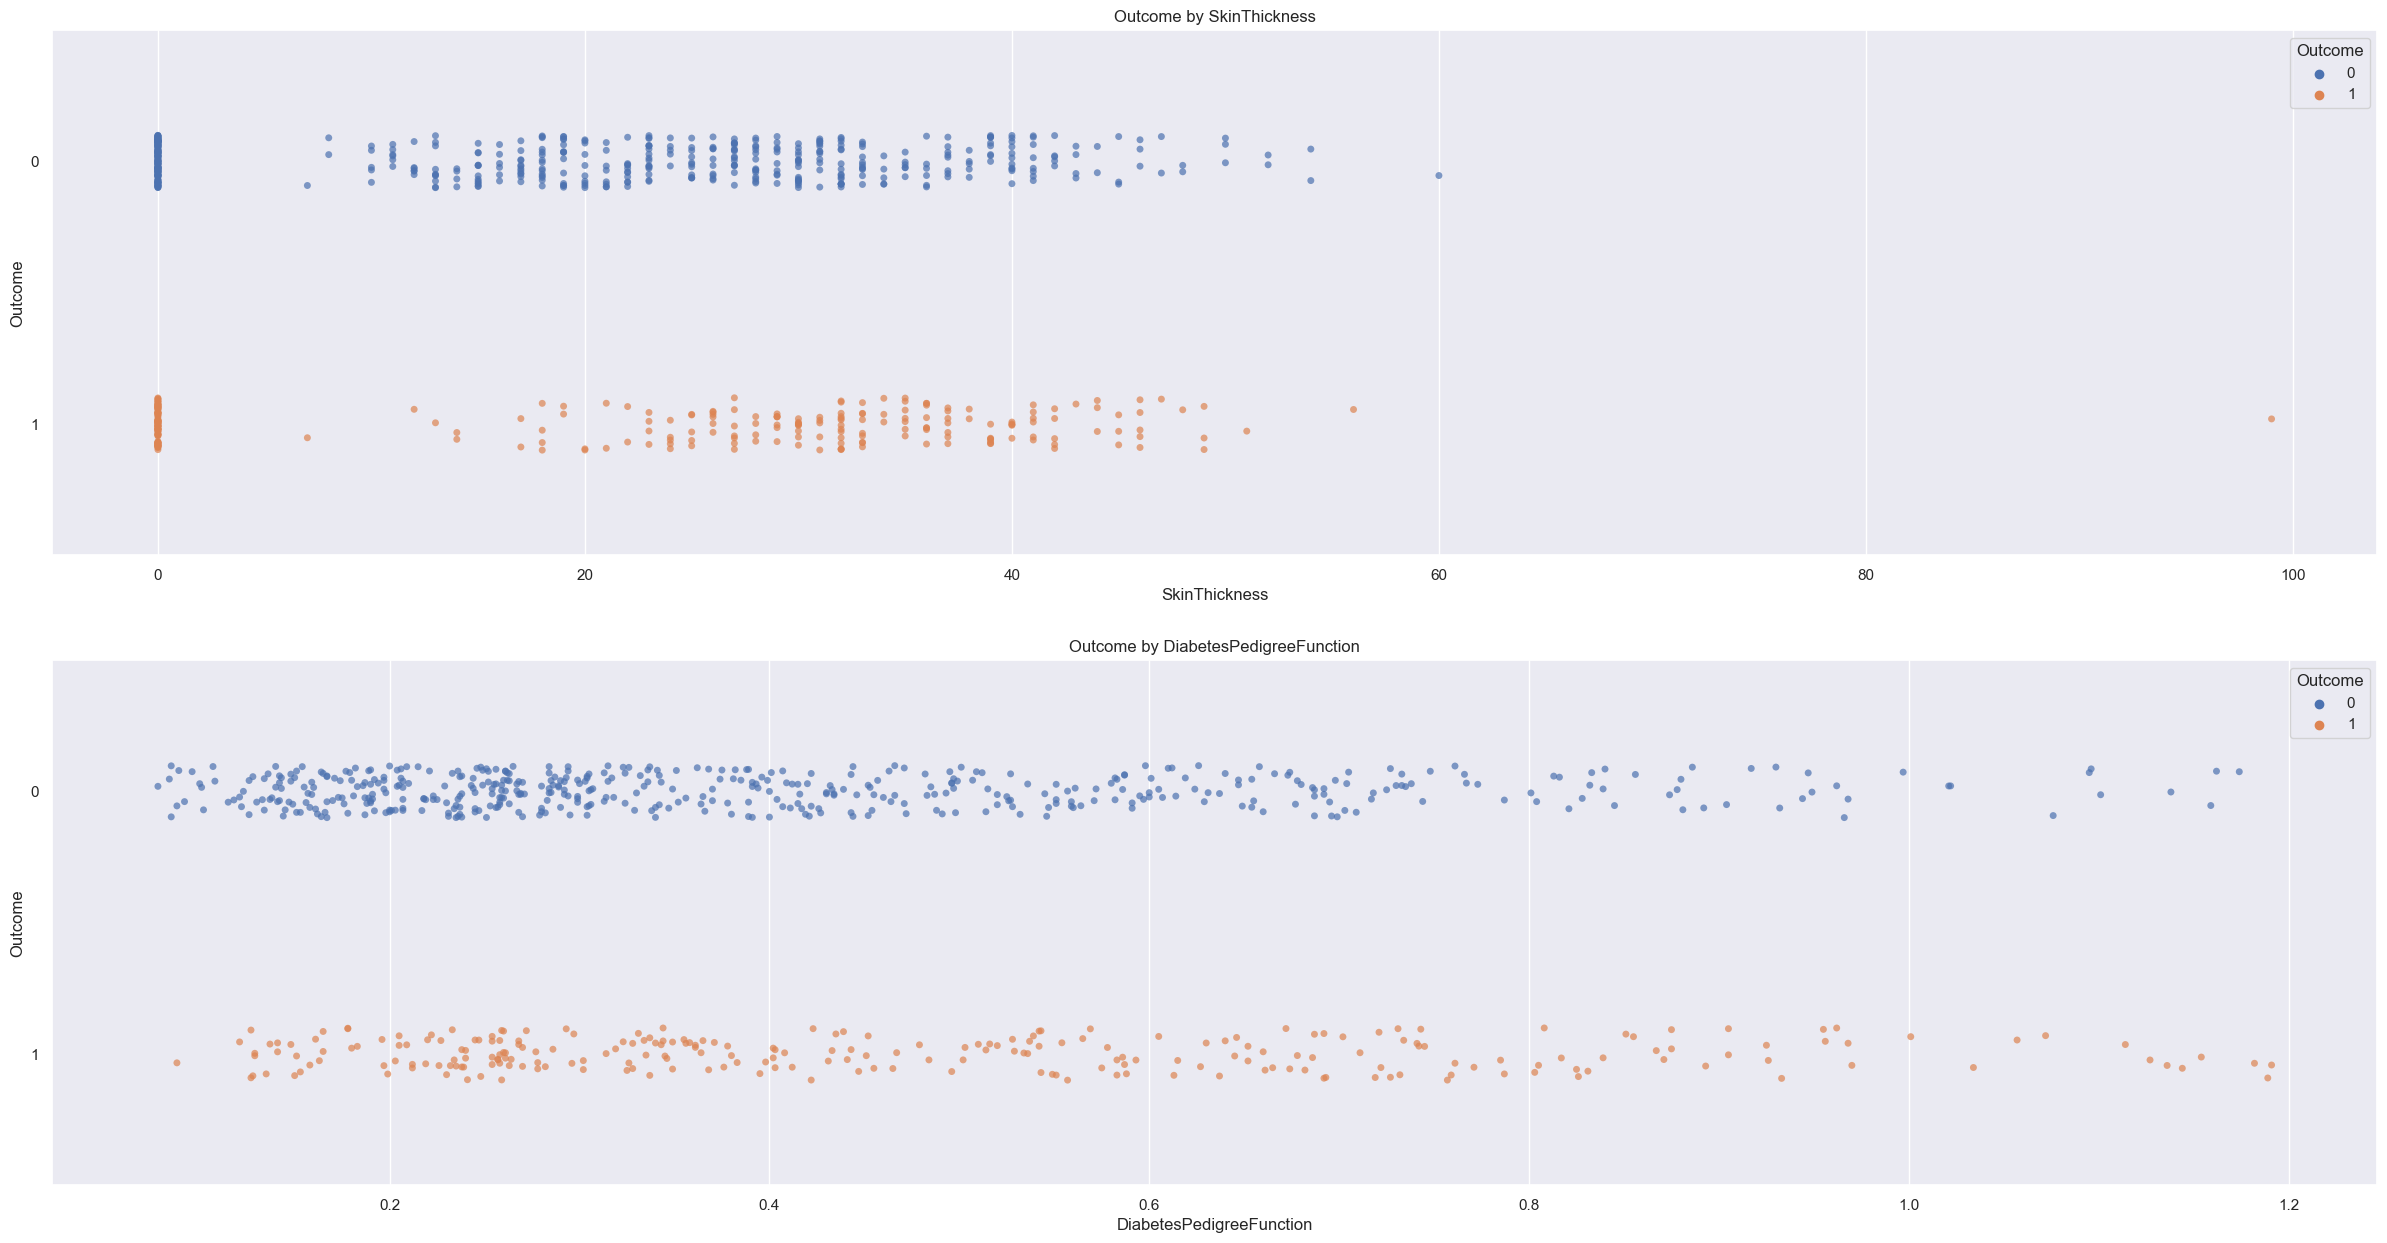

In [23]:
f, axes = plt.subplots(2, 1, figsize=(30, 15))

sb.stripplot(x='SkinThickness', y='Outcome', data=clean_data, orient="h", ax=axes[0], hue ='Outcome',alpha=0.7)
axes[0].set_title('Outcome by SkinThickness')

sb.stripplot(x='DiabetesPedigreeFunction', y='Outcome', data=clean_data, orient="h", ax=axes[1], hue = 'Outcome',alpha=0.7)
axes[1].set_title('Outcome by DiabetesPedigreeFunction')

### It can be seen through the strip plots that :
***
- BMI, Glucose, Insulin and BloodPressure may have a slightly more obvious relation between them and Outcome compared to the other variables.

## Decision Tree

<div class="alert alert-block alert-info">
Since variable Glucose has the highest correlation coefficient to Outcome from previously, lets try using this variable to predict
</div>


In [24]:
#Extracting Data
result = pd.DataFrame(clean_data['Outcome'])  # Response
glucose = pd.DataFrame(clean_data['Glucose']) # Predictor

# Split the Dataset into Train and Test (randomly)
X_train, X_test, y_train, y_test = train_test_split(glucose, result, test_size = 0.35)

# Sample sizes
print("Train set :", X_train.shape, y_train.shape)
print("Test set :", X_test.shape, y_test.shape)

Train set : (480, 1) (480, 1)
Test set : (259, 1) (259, 1)


In [25]:
#Making the decision tree
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.5446428571428571, 0.9, 'Glucose <= 144.5\ngini = 0.462\nsamples = 480\nvalue = [306, 174]\nclass = N'),
 Text(0.2857142857142857, 0.7, 'Glucose <= 99.5\ngini = 0.365\nsamples = 371\nvalue = [282, 89]\nclass = N'),
 Text(0.14285714285714285, 0.5, 'Glucose <= 87.5\ngini = 0.077\nsamples = 124\nvalue = [119, 5]\nclass = N'),
 Text(0.07142857142857142, 0.3, 'Glucose <= 78.5\ngini = 0.037\nsamples = 53\nvalue = [52, 1]\nclass = N'),
 Text(0.03571428571428571, 0.1, 'gini = 0.08\nsamples = 24\nvalue = [23, 1]\nclass = N'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]\nclass = N'),
 Text(0.21428571428571427, 0.3, 'Glucose <= 97.5\ngini = 0.106\nsamples = 71\nvalue = [67, 4]\nclass = N'),
 Text(0.17857142857142858, 0.1, 'gini = 0.135\nsamples = 55\nvalue = [51, 4]\nclass = N'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = N'),
 Text(0.42857142857142855, 0.5, 'Glucose <= 112.5\ngini = 0.449\nsamples = 247\nvalue = [163, 84]\nclass = N

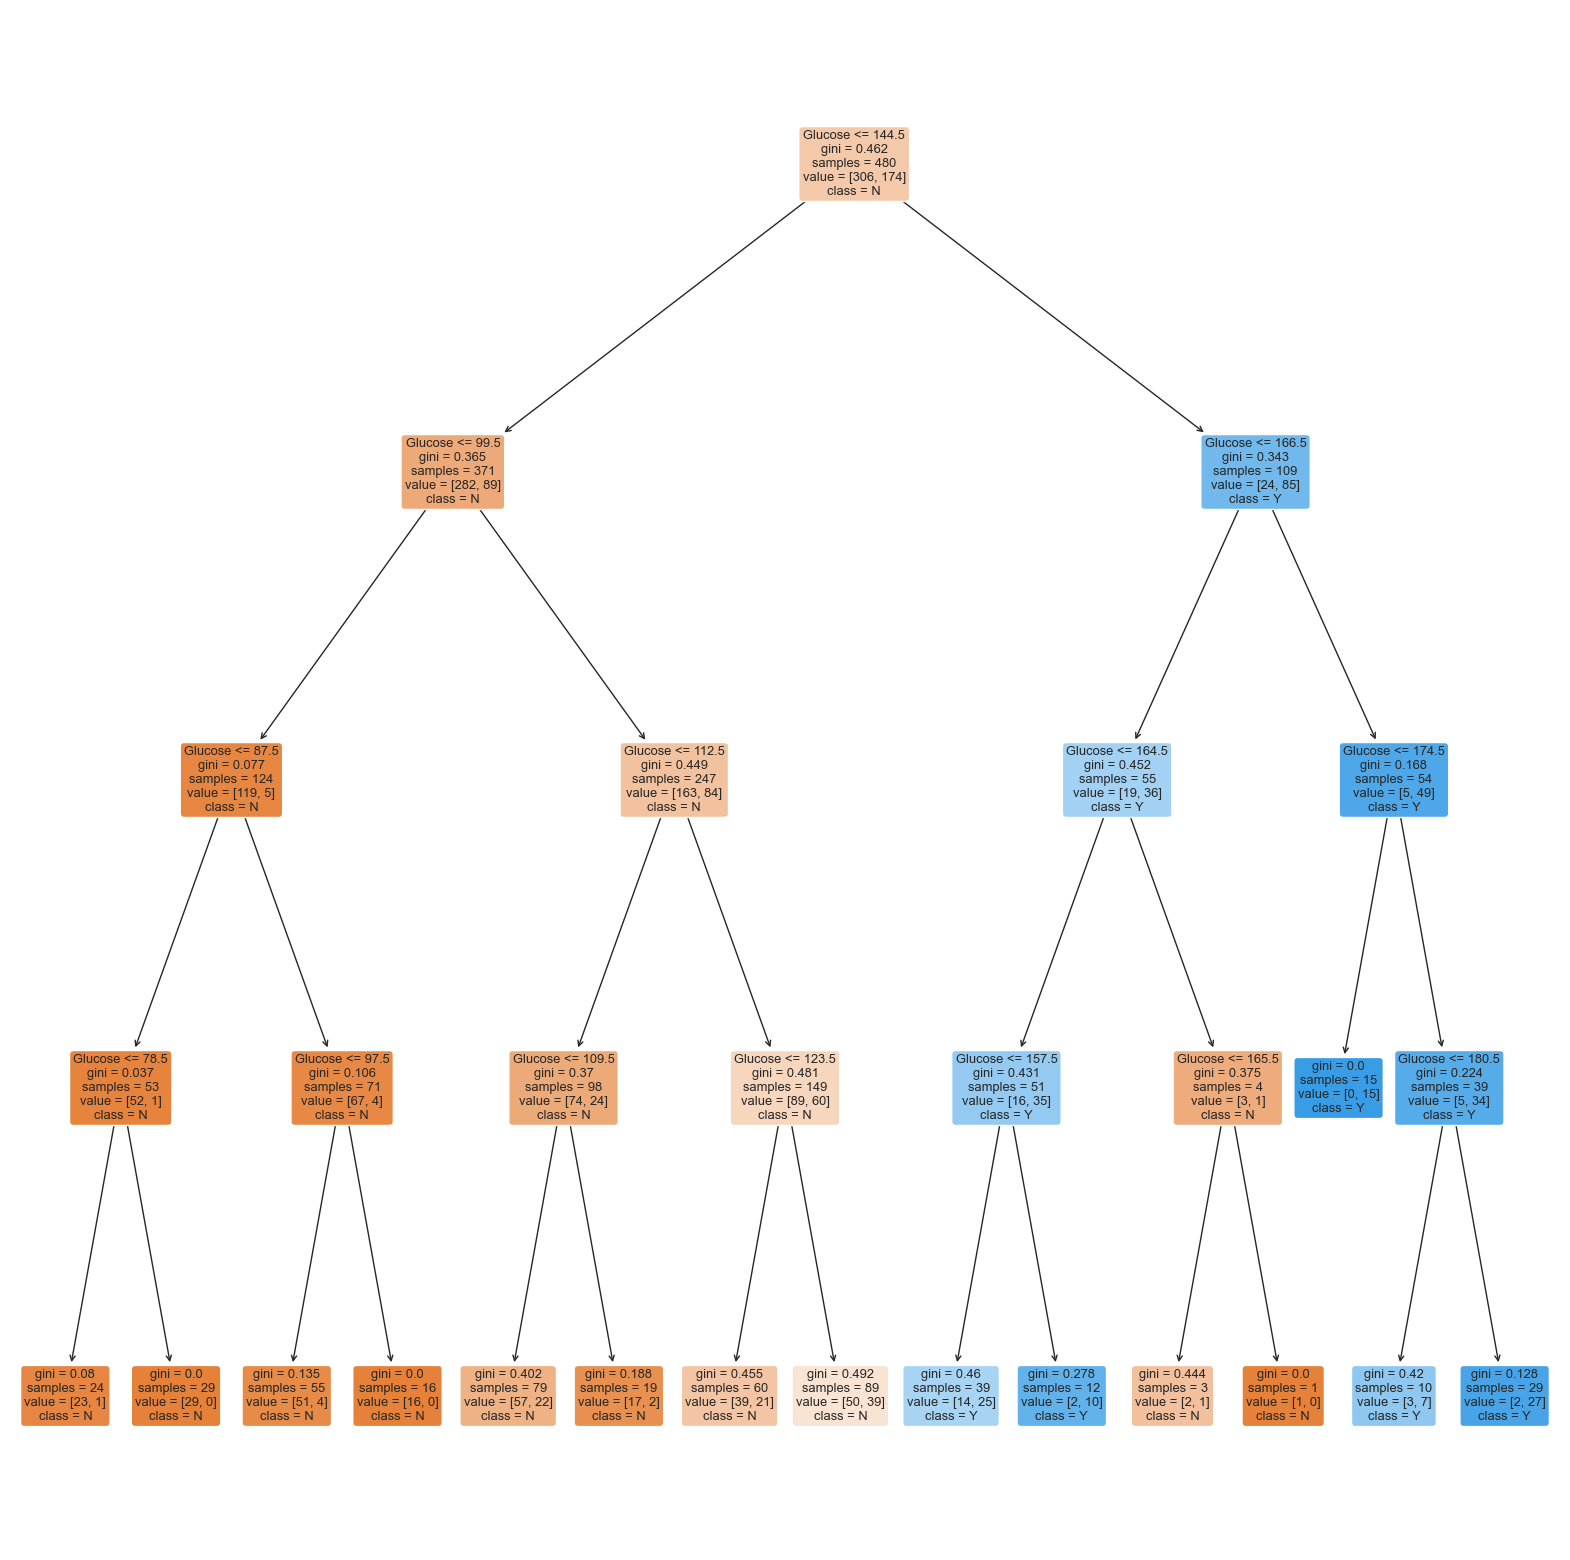

In [26]:
f = plt.figure(figsize=(20,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Glucose"], 
          class_names=["N","Y"])

### Goodness of Fit test ( For first Decision Tree Model)
***

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.76875

True Negative: 285.0
False Positive: 21.0
False Negative: 90.0
True Positive: 84.0

True Positive Rate :  0.4828
False Positive Rate :  0.0686

True Negative Rate :  0.9314
False Negative Rate :  0.5172

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7335907335907336

True Negative: 163.0
False Positive: 19.0
False Negative: 50.0
True Positive: 27.0

True Positive Rate :  0.3506
False Positive Rate :  0.1044

True Negative Rate :  0.8956
False Negative Rate :  0.6494


Text(0.5, 11.249999999999995, 'Predicted')

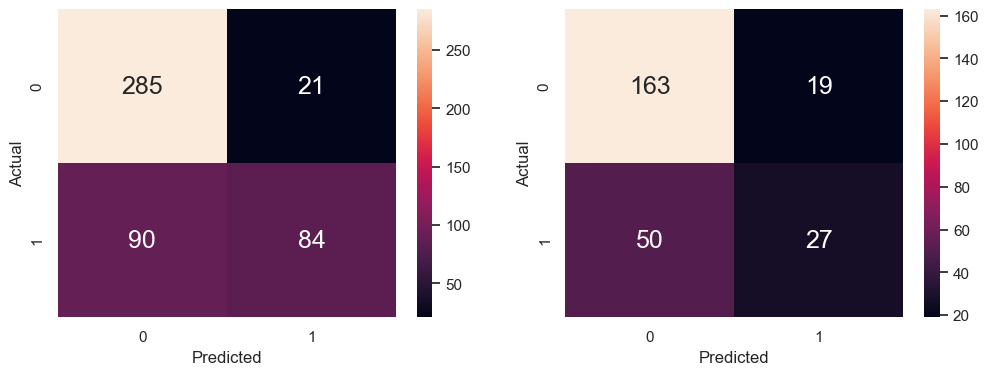

In [27]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()

print("True Negative:", float(tn))
print("False Positive:", float(fp))
print("False Negative:", float(fn))
print("True Positive:", float(tp))
print()

tpr = tp/(tp + fn)
fpr = fp/(tn + fp)
tnr = tn/(tn + fp)
fnr = fn/(tp + fn)

print("True Positive Rate : ", "{:.4f}".format(tpr))
print("False Positive Rate : ", "{:.4f}".format(fpr))
print()
print("True Negative Rate : ", "{:.4f}".format(tnr))
print("False Negative Rate : ", "{:.4f}".format(fnr))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print("True Negative:", float(tn))
print("False Positive:", float(fp))
print("False Negative:", float(fn))
print("True Positive:", float(tp))
print()

tpr = tp/(tp + fn)
fpr = fp/(tn + fp)
tnr = tn/(tn + fp)
fnr = fn/(tp + fn)

print("True Positive Rate : ", "{:.4f}".format(tpr))
print("False Positive Rate : ", "{:.4f}".format(fpr))
print()
print("True Negative Rate : ", "{:.4f}".format(tnr))
print("False Negative Rate : ", "{:.4f}".format(fnr))

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

### Analysis
***
<div class="alert alert-block alert-warning">
By using only a single variable it can be seen that the rate for False Negatives is quite high, hence rendering the prediction model very inaccurate. Lets see what happens if we were to use all other variables instead of just a single one.
</div>


### Second Decision Tree (with all other variables)

In [58]:
#Extracting Data
y=clean_data['Outcome'] # Response
x=clean_data.drop('Outcome',axis=1) # Predictor

# Split the Dataset into Train and Test (randomly)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.35)

# Sample sizes
print("Train set :", X_train.shape, y_train.shape)
print("Test set :", X_test.shape, y_test.shape)

Train set : (480, 8) (480,)
Test set : (259, 8) (259,)


In [59]:
#Making the decision tree
dectree1 = DecisionTreeClassifier(max_depth = 4)
dectree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.5, 0.9, 'Glucose <= 128.5\ngini = 0.454\nsamples = 480\nvalue = [313, 167]\nclass = N'),
 Text(0.25, 0.7, 'Age <= 30.5\ngini = 0.3\nsamples = 310\nvalue = [253, 57]\nclass = N'),
 Text(0.125, 0.5, 'Pregnancies <= 6.5\ngini = 0.17\nsamples = 192\nvalue = [174, 18]\nclass = N'),
 Text(0.0625, 0.3, 'BMI <= 30.95\ngini = 0.147\nsamples = 188\nvalue = [173, 15]\nclass = N'),
 Text(0.03125, 0.1, 'gini = 0.019\nsamples = 106\nvalue = [105, 1]\nclass = N'),
 Text(0.09375, 0.1, 'gini = 0.283\nsamples = 82\nvalue = [68, 14]\nclass = N'),
 Text(0.1875, 0.3, 'DiabetesPedigreeFunction <= 0.301\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = Y'),
 Text(0.15625, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Y'),
 Text(0.21875, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = N'),
 Text(0.375, 0.5, 'BMI <= 27.35\ngini = 0.443\nsamples = 118\nvalue = [79, 39]\nclass = N'),
 Text(0.3125, 0.3, 'BMI <= 9.8\ngini = 0.08\nsamples = 24\nvalue = [23, 1]\nclass = N'),
 Text(0.28125, 

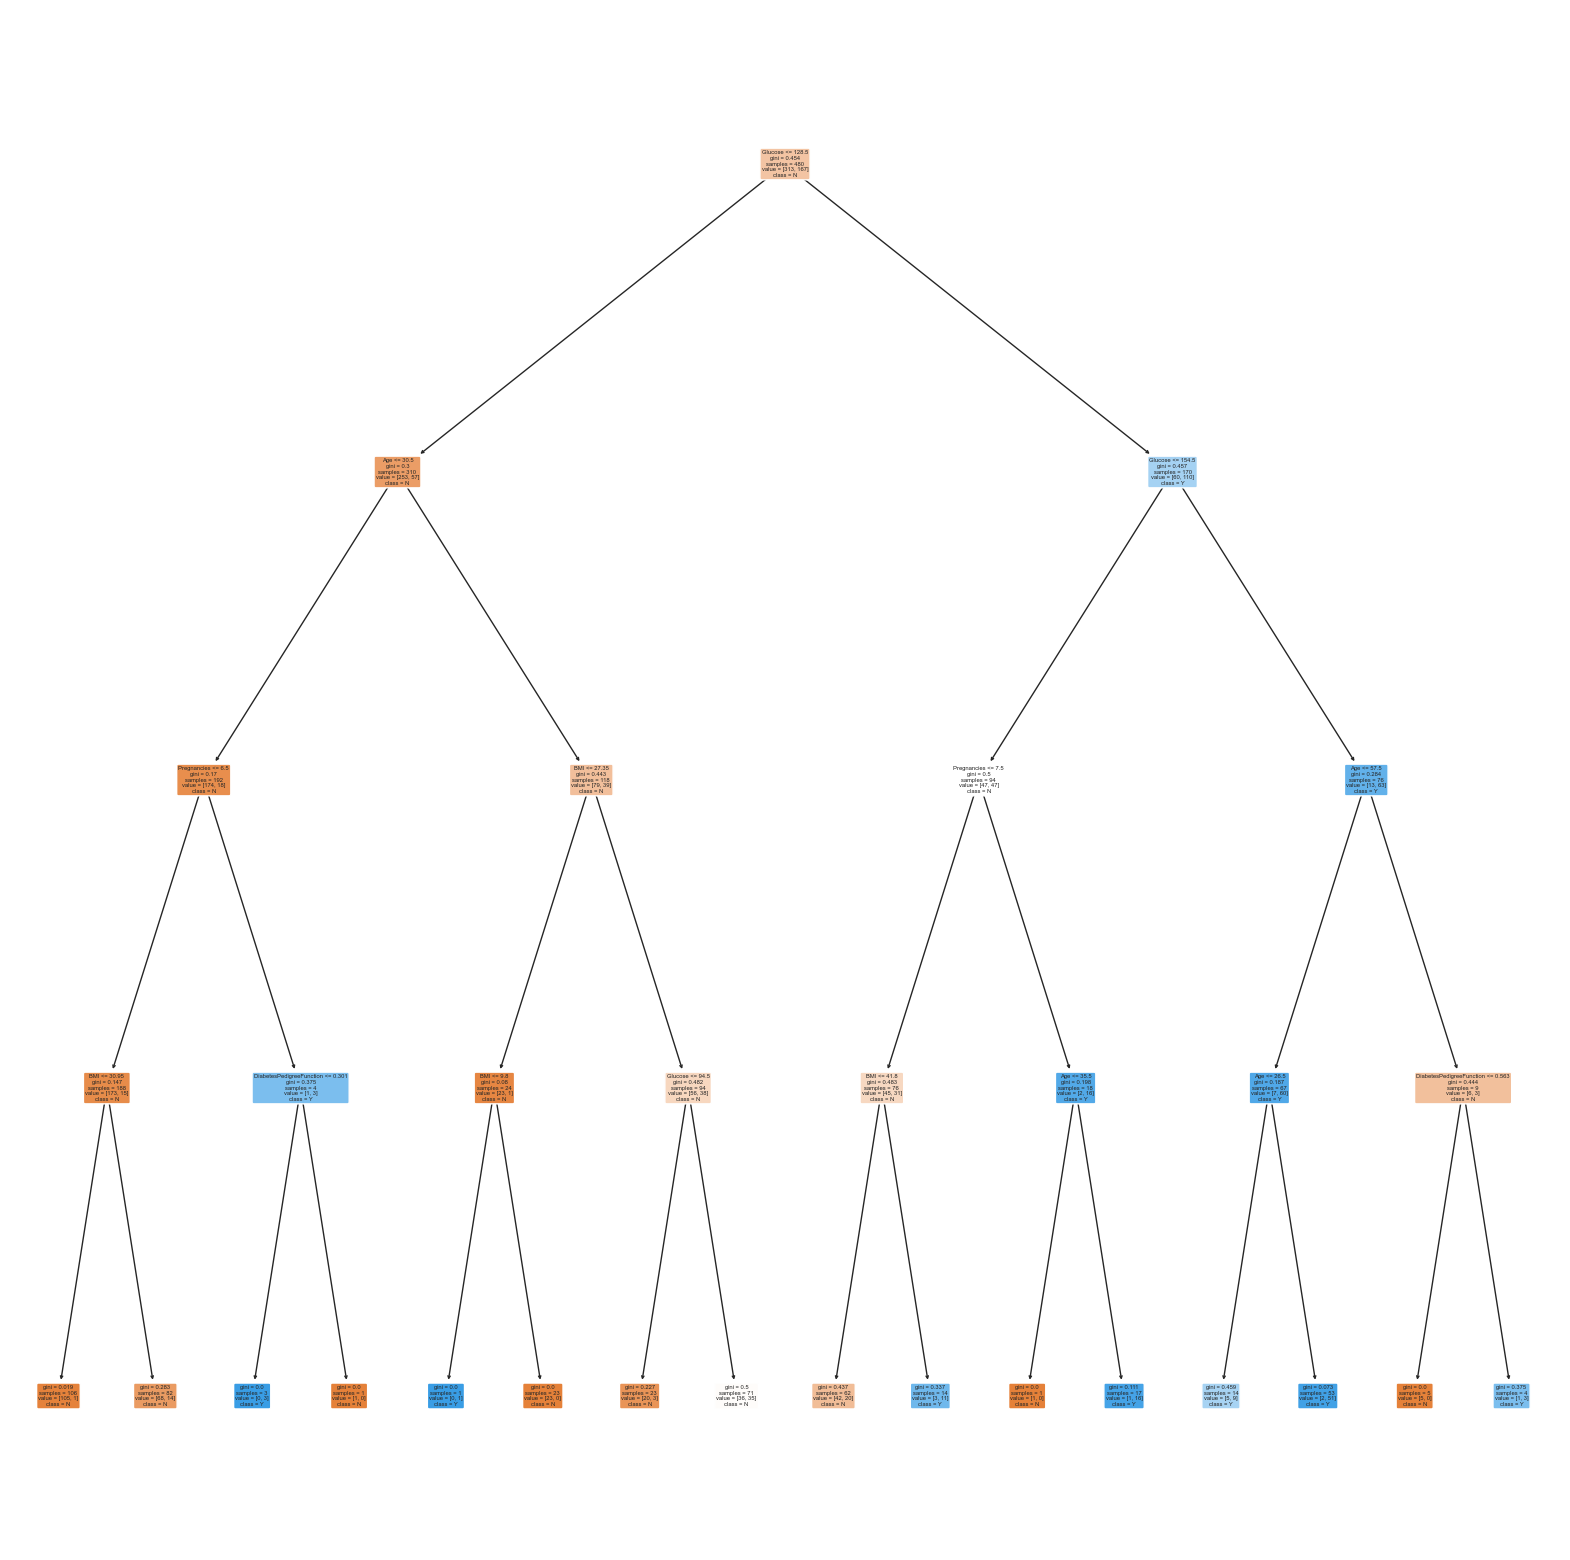

In [60]:
f = plt.figure(figsize=(20,20))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=X_train.columns.tolist(), 
          class_names=["N","Y"])

### Goodness of Fit test ( For improved Decision Tree Model)
***

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7833333333333333

True Negative: 289.0
False Positive: 24.0
False Negative: 80.0
True Positive: 87.0

True Positive Rate :  0.5210
False Positive Rate :  0.0767

True Negative Rate :  0.9233
False Negative Rate :  0.4790

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.752895752895753

True Negative: 160.0
False Positive: 15.0
False Negative: 49.0
True Positive: 35.0

True Positive Rate :  0.4167
False Positive Rate :  0.0857

True Negative Rate :  0.9143
False Negative Rate :  0.5833


Text(0.5, 11.249999999999995, 'Predicted')

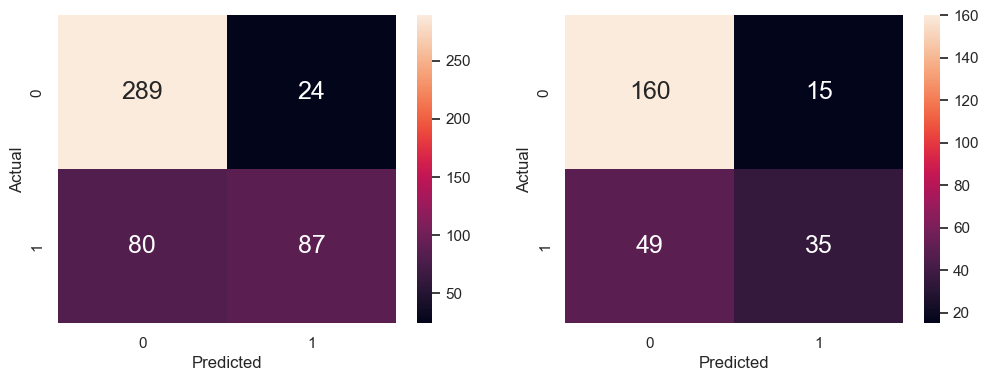

In [61]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()

print("True Negative:", float(tn))
print("False Positive:", float(fp))
print("False Negative:", float(fn))
print("True Positive:", float(tp))
print()

tpr = tp/(tp + fn)
fpr = fp/(tn + fp)
tnr = tn/(tn + fp)
fnr = fn/(tp + fn)

print("True Positive Rate : ", "{:.4f}".format(tpr))
print("False Positive Rate : ", "{:.4f}".format(fpr))
print()
print("True Negative Rate : ", "{:.4f}".format(tnr))
print("False Negative Rate : ", "{:.4f}".format(fnr))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print("True Negative:", float(tn))
print("False Positive:", float(fp))
print("False Negative:", float(fn))
print("True Positive:", float(tp))
print()

tpr = tp/(tp + fn)
fpr = fp/(tn + fp)
tnr = tn/(tn + fp)
fnr = fn/(tp + fn)

print("True Positive Rate : ", "{:.4f}".format(tpr))
print("False Positive Rate : ", "{:.4f}".format(fpr))
print()
print("True Negative Rate : ", "{:.4f}".format(tnr))
print("False Negative Rate : ", "{:.4f}".format(fnr))

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

### ROC curve ( Improved Decision Tree Model )
***
<div class="alert alert-block alert-warning">
The ROC (Receiver Operating Characteristic) Curve displays the percentage of true positives predicted by the model.It can take values from 0 to 1. A perfect model would have an AUC of 1, while a random model would have an AUC of 0.5.Hence, the higher the AUC (area under the curve), the more accurately our model is able to predict outcomes.
</div>


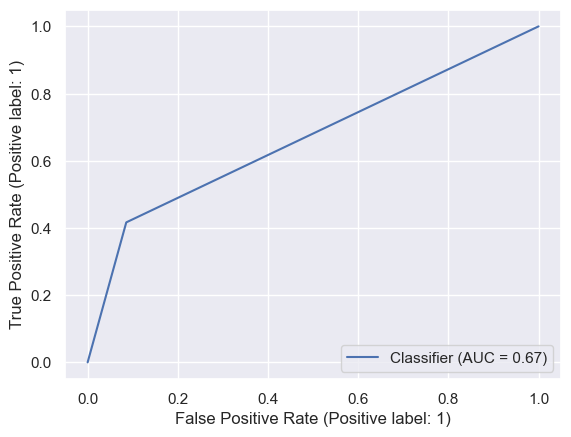

In [62]:
from sklearn.metrics import RocCurveDisplay
# ROC curve & AUC
RocCurveDisplay.from_predictions(y_test, y_test_pred)
plt.show()

- The more that the ROC curve hugs the top left corner of the plot, the better the model does at classifying the data.
- AUC is 0.67, that means 67% of the classifier’s predictions are correct across all classification thresholds.

#### Confusion matrix vs ROC curve
***
A confusion matrix can be used to measure the performance of a particular classifier with a fixed threshold. Given a set of input cases, the classifier scores each one, and score above the threshold are labelled Class 1 and scores below the threshold are labelled Class 2.

The ROC curve, on the other hand, examines the performance of a classifier without fixing the threshold. Given a set of input cases, the classifier scores each one. The ROC curve is then generated by testing every possible threshold and plotting each result as a point on the curve.

Understanding the performance of a classification model involves two key tools: confusion matrices and ROC curves. We can use the confusion matrix to determine how confused our model is between the positives and negatives, and we can get a bunch of summary metrics from this table to quantify the confusion. Then we ask ourselves how much confusion is okay based on our problem at hand.

Next, we use the ROC curve to plot the trade-off between sensitivity and specificity at different thresholds, and we can get an excellent overall summary metric called the AUC, which quantifies the overall performance of the model. We can then pick a threshold with a sensitivity and specificity that is ok for our case (usually based on domain expertise or familiarity with the consequences of misclassification).

Usually, we use the confusion matrix and ROC curve together when evaluating a classification model because either method has a few drawbacks that the other fills in. For example, the confusion matrix is pretty sensitive to imbalanced datasets, while the ROC curve doesn’t provide a detailed enough assessment of model performance.


### Analysis
***
<div class="alert alert-block alert-warning">
We have seen before that the database has a much larger proportion of negetive 'Outcome' than positive 'Outcome', the classifier may be biased towards the majority class (negetive) and thus the accuracy metric in this context may not be meaningful. But still, we would believe that variables BMI, Glucose, Insulin and BloodPressure may have contributed more compared to the other variables. Nevertheless, it is important for all of the variables to come together in order for the prediction variable 'Outcome' rather than just a single variable.
</div>



## Logistic Regression

***
<div class="alert alert-block alert-info">
<b> Logistic regression is a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation. The model delivers a binary or dichotomous outcome limited to two possible outcomes which is true/false.</b> 
</div>



For this case, we would like to introduce to multivariate Logistic Regression as it is  a formula used to predict the relationships between various dependent and independent variables. It calculates the probability of something happening depending on multiple sets of variables. This is a common classification algorithm used in data science and machine learning.

In [35]:
from sklearn.linear_model import LogisticRegression
y=clean_data['Outcome']
x=clean_data.drop('Outcome',axis=1)

#New split of data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.35)

print("Train set :", X_train.shape, y_train.shape)
print("Test set :", X_test.shape, y_test.shape)

Train set : (480, 8) (480,)
Test set : (259, 8) (259,)


In [36]:
#Traning the Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

Text(0.5, 11.249999999999995, 'Predicted')

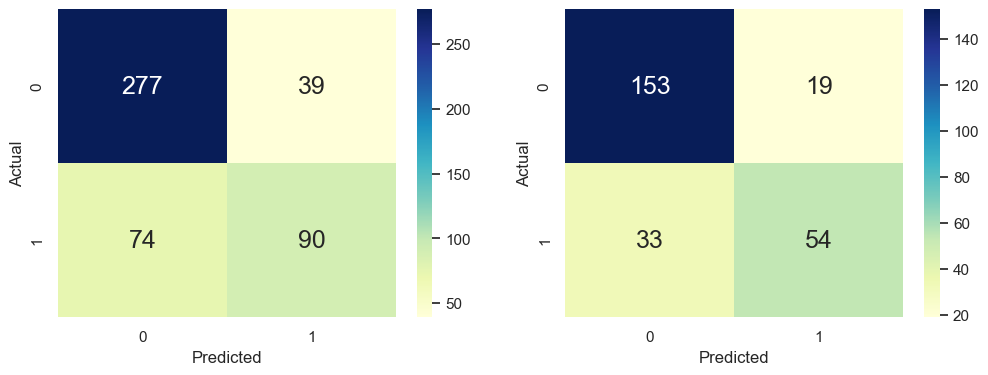

In [37]:
# Save the prediction
y_train_pred1=logistic_model.predict(X_train)
y_test_pred1=logistic_model.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18},cmap="YlGnBu", ax = axes[0])
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')
sb.heatmap(confusion_matrix(y_test, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18},cmap="YlGnBu", ax = axes[1])
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

### Goodness of Fit test ( For Logistic Regression Model)
***

In [38]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", logistic_model.score(X_train, y_train))
print()

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred1).ravel()

print("True Negative:", float(tn))
print("False Positive:", float(fp))
print("False Negative:", float(fn))
print("True Positive:", float(tp))
print()

tpr = tp/(tp + fn)
fpr = fp/(tn + fp)
tnr = tn/(tn + fp)
fnr = fn/(tp + fn)

print("True Positive Rate : ", "{:.4f}".format(tpr))
print("False Positive Rate : ", "{:.4f}".format(fpr))
print()
print("True Negative Rate : ", "{:.4f}".format(tnr))
print("False Negative Rate : ", "{:.4f}".format(fnr))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", logistic_model.score(X_test, y_test))
print()

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred1).ravel()

print("True Negative:", float(tn))
print("False Positive:", float(fp))
print("False Negative:", float(fn))
print("True Positive:", float(tp))
print()

tpr = tp/(tp + fn)
fpr = fp/(tn + fp)
tnr = tn/(tn + fp)
fnr = fn/(tp + fn)

print("True Positive Rate : ", "{:.4f}".format(tpr))
print("False Positive Rate : ", "{:.4f}".format(fpr))
print()
print("True Negative Rate : ", "{:.4f}".format(tnr))
print("False Negative Rate : ", "{:.4f}".format(fnr))


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7645833333333333

True Negative: 277.0
False Positive: 39.0
False Negative: 74.0
True Positive: 90.0

True Positive Rate :  0.5488
False Positive Rate :  0.1234

True Negative Rate :  0.8766
False Negative Rate :  0.4512

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7992277992277992

True Negative: 153.0
False Positive: 19.0
False Negative: 33.0
True Positive: 54.0

True Positive Rate :  0.6207
False Positive Rate :  0.1105

True Negative Rate :  0.8895
False Negative Rate :  0.3793


### ROC curve ( Logistic Regression Model )
***

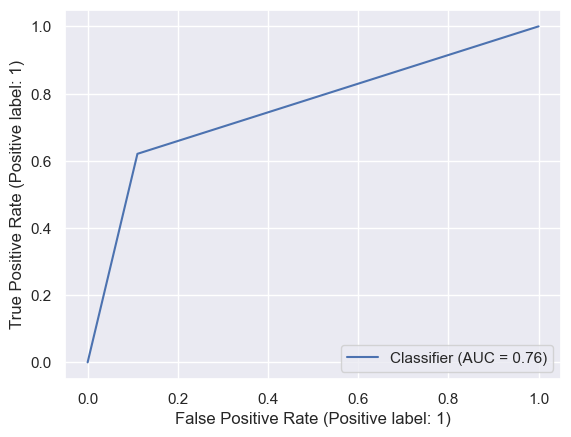

In [39]:
# ROC curve & AUC
RocCurveDisplay.from_predictions(y_test, y_test_pred1)
plt.show()

- AUC is 0.72, that means 72% of the classifier’s predictions are correct across all classification thresholds.

**The main difference between logistic regression and decision trees is that logistic regression models the relationship between the predictor variables and the outcome variable as a linear function, while decision trees create a hierarchical tree structure to model the relationships between the variables.**
***
But since this is the case where the result is binary (meaning its either 0 or 1), Logistic Regression is specifically designed for binary classification problems, where the goal is to predict one of two possible outcomes. It estimates the probability of a binary outcome based on one or more predictor variables. Logistic regression is simple to interpret and it doesn’t require much computational resources. This makes it a good choice when the target variable is binary and the relationship between the predictors and the response is linear. 

### Analysis of the 2 models :
***
<div class="alert alert-block alert-warning">
 <ul>   
<li> AUC of Logistic Regression mode is higher than that of the Decision Tree model.
<li> Using the confusion matrix, the accuracy for the Decision Tree model from the train dataset is higher compared to the Logistic Regression model BUT the accuracy for the Decision Tree model         from the test dataset is lower compared to the Logistic Regression model.
<li> From the confusion matrix model. the difference between accuracy from the train dataset and test dataset is minimised in the Logistic Regression model compared to the Decision Tree model.
<ul> 
</div>


### Prediction for diabetes

In [66]:
#Lets select some random rows to test out the prediction

In [68]:
sample_data = clean_data.sample(n=30)
X_pred = sample_data.drop('Outcome',axis =1)
X_pred

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
151,4,114,65,0,0,21.9,0.432,37
740,11,120,80,37,150,42.3,0.785,48
429,1,95,82,25,180,35.0,0.233,43
602,1,124,74,36,0,27.8,0.100,30
302,5,77,82,41,42,35.8,0.156,35
326,1,122,64,32,156,35.1,0.692,30
167,4,120,68,0,0,29.6,0.709,34
301,2,144,58,33,135,31.6,0.422,25
46,1,146,56,0,0,29.7,0.564,29
666,4,145,82,18,0,32.5,0.235,70


#### Prediction using Decision Tree

In [69]:
# Predict Response corresponding to Predictors
y_pred1 = dectree1.predict(X_pred)
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [70]:
# Predict Probabilities corresponding to Predictors
y_prob1 = dectree1.predict_proba(X_pred)
y_prob1

array([[1.        , 0.        ],
       [0.50704225, 0.49295775],
       [0.50704225, 0.49295775],
       [0.99056604, 0.00943396],
       [0.86956522, 0.13043478],
       [0.82926829, 0.17073171],
       [0.50704225, 0.49295775],
       [0.67741935, 0.32258065],
       [0.67741935, 0.32258065],
       [0.67741935, 0.32258065],
       [0.50704225, 0.49295775],
       [0.05882353, 0.94117647],
       [0.67741935, 0.32258065],
       [1.        , 0.        ],
       [0.99056604, 0.00943396],
       [0.99056604, 0.00943396],
       [0.35714286, 0.64285714],
       [0.82926829, 0.17073171],
       [0.21428571, 0.78571429],
       [0.03773585, 0.96226415],
       [0.50704225, 0.49295775],
       [0.67741935, 0.32258065],
       [0.99056604, 0.00943396],
       [0.67741935, 0.32258065],
       [0.99056604, 0.00943396],
       [0.05882353, 0.94117647],
       [0.67741935, 0.32258065],
       [0.35714286, 0.64285714],
       [0.99056604, 0.00943396],
       [0.67741935, 0.32258065]])

In [71]:
# Summarize the Actuals and Predictions
y_pred1 = pd.DataFrame(y_pred1, columns = ["PredOutcome"], index = sample_data.index)
diabetes_acc1 = pd.concat([sample_data, y_pred1], axis = 1)

diabetes_acc1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PredOutcome
151,4,114,65,0,0,21.9,0.432,37,0,0
740,11,120,80,37,150,42.3,0.785,48,1,0
429,1,95,82,25,180,35.0,0.233,43,1,0
602,1,124,74,36,0,27.8,0.100,30,0,0
302,5,77,82,41,42,35.8,0.156,35,0,0
326,1,122,64,32,156,35.1,0.692,30,1,0
167,4,120,68,0,0,29.6,0.709,34,0,0
301,2,144,58,33,135,31.6,0.422,25,1,0
46,1,146,56,0,0,29.7,0.564,29,0,0
666,4,145,82,18,0,32.5,0.235,70,1,0


#### Prediction using Logistic Regression

In [72]:
y_pred2 = logistic_model.predict(X_pred)
y_pred2

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [73]:
y_prob2 = logistic_model.predict_proba(X_pred)
y_prob2

array([[0.8495094 , 0.1504906 ],
       [0.30787468, 0.69212532],
       [0.86950389, 0.13049611],
       [0.84849441, 0.15150559],
       [0.91057654, 0.08942346],
       [0.6773071 , 0.3226929 ],
       [0.69194015, 0.30805985],
       [0.58524437, 0.41475563],
       [0.54487943, 0.45512057],
       [0.40645534, 0.59354466],
       [0.40342603, 0.59657397],
       [0.12642504, 0.87357496],
       [0.54907807, 0.45092193],
       [0.84935758, 0.15064242],
       [0.86204656, 0.13795344],
       [0.90003509, 0.09996491],
       [0.18261454, 0.81738546],
       [0.72182523, 0.27817477],
       [0.32804121, 0.67195879],
       [0.21975664, 0.78024336],
       [0.52334187, 0.47665813],
       [0.74598272, 0.25401728],
       [0.86863815, 0.13136185],
       [0.63545082, 0.36454918],
       [0.74980345, 0.25019655],
       [0.29564006, 0.70435994],
       [0.67873951, 0.32126049],
       [0.18253082, 0.81746918],
       [0.87815048, 0.12184952],
       [0.59308749, 0.40691251]])

In [74]:
y_pred2 = pd.DataFrame(y_pred2, columns = ["PredOutcome"], index = sample_data.index)
diabetes_acc2 = pd.concat([sample_data, y_pred2], axis = 1)

diabetes_acc2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PredOutcome
151,4,114,65,0,0,21.9,0.432,37,0,0
740,11,120,80,37,150,42.3,0.785,48,1,1
429,1,95,82,25,180,35.0,0.233,43,1,0
602,1,124,74,36,0,27.8,0.100,30,0,0
302,5,77,82,41,42,35.8,0.156,35,0,0
326,1,122,64,32,156,35.1,0.692,30,1,0
167,4,120,68,0,0,29.6,0.709,34,0,0
301,2,144,58,33,135,31.6,0.422,25,1,0
46,1,146,56,0,0,29.7,0.564,29,0,0
666,4,145,82,18,0,32.5,0.235,70,1,1


# Conclusion:
***
<div class="alert alert-block alert-success">
<b>xxx</b> TBC
</div
